In [1]:
import pandas as pd
import numpy as np
import re
import datetime
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

# Cases in U.S.

### Extract Files 

In [2]:
confirmed = pd.read_csv('files/time_series_covid19_confirmed_US.csv')
death = pd.read_csv('files/time_series_covid19_deaths_US.csv')

In [3]:
confirmed

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0     84001001   US  USA    840   1001.0     Autauga        Alabama   
1     84001003   US  USA    840   1003.0     Baldwin        Alabama   
2     84001005   US  USA    840   1005.0     Barbour        Alabama   
3     84001007   US  USA    840   1007.0        Bibb        Alabama   
4     84001009   US  USA    840   1009.0      Blount        Alabama   
...        ...  ...  ...    ...      ...         ...            ...   
3335  84056039   US  USA    840  56039.0       Teton        Wyoming   
3336  84056041   US  USA    840  56041.0       Uinta        Wyoming   
3337  84090056   US  USA    840  90056.0  Unassigned        Wyoming   
3338  84056043   US  USA    840  56043.0    Washakie        Wyoming   
3339  84056045   US  USA    840  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_  ... 8/6/20  8/7/20  8/8/20  \
0                US  32.539527  -86.644082  ...   1050    1065    1086   
1                US  30.727750  -87.722071  ...   3380    3443    3502   
2                US  31.868263  -85.387129  ...    565     569     573   
3                US  32.996421  -87.125115  ...    413     416     426   
4                US  33.982109  -86.567906  ...    759     774     788   
...             ...        ...         ...  ...    ...     ...     ...   
3335             US  43.935225 -110.589080  ...    367     371     370   
3336             US  41.287818 -110.547578  ...    272     274     274   
3337             US   0.000000    0.000000  ...      0       0       0   
3338             US  43.904516 -107.680187  ...     59      69      70   
3339             US  43.839612 -104.567488  ...      5       5       5   

      8/9/20  8/10/20  8/11/20  8/12/20  8/13/20  8/14/20  8/15/20  
0       1169     1174     1162     1188     1196     1196     1206  
1       3544     3651     3670     3710     3744     3791     3839  
2        575      576      579      581      586      590      598  
3        438      442      444      453      457      465      469  
4        800      812      816      825      835      848      854  
...      ...      ...      ...      ...      ...      ...      ...  
3335     374      370      372      373      375      383      385  
3336     278      277      279      278      278      277      276  
3337       0        0        0        0        0        0        0  
3338      77       77       79       82       86       96       97  
3339       5        6        5        5        5        5        7  

[3340 rows x 218 columns]

### Data Wrangling

In [4]:
dates = [x for x in list(confirmed.columns) if re.search('/',x)]

In [5]:
confirmed_clean = confirmed.melt(id_vars=['Admin2','Province_State','Country_Region','Lat','Long_','Combined_Key'], value_vars= dates).rename(columns={'Admin2':'County','variable':'Date','value':'Total Cases'})
confirmed_clean['Date'] = pd.to_datetime(confirmed_clean['Date'], errors ='coerce')
confirmed_clean.set_index('Date',inplace = True)
confirmed_clean

County Province_State Country_Region        Lat       Long_  \
Date                                                                          
2020-01-22     Autauga        Alabama             US  32.539527  -86.644082   
2020-01-22     Baldwin        Alabama             US  30.727750  -87.722071   
2020-01-22     Barbour        Alabama             US  31.868263  -85.387129   
2020-01-22        Bibb        Alabama             US  32.996421  -87.125115   
2020-01-22      Blount        Alabama             US  33.982109  -86.567906   
...                ...            ...            ...        ...         ...   
2020-08-15       Teton        Wyoming             US  43.935225 -110.589080   
2020-08-15       Uinta        Wyoming             US  41.287818 -110.547578   
2020-08-15  Unassigned        Wyoming             US   0.000000    0.000000   
2020-08-15    Washakie        Wyoming             US  43.904516 -107.680187   
2020-08-15      Weston        Wyoming             US  43.839612 -104.567488   

                       Combined_Key  Total Cases  
Date                                              
2020-01-22     Autauga, Alabama, US            0  
2020-01-22     Baldwin, Alabama, US            0  
2020-01-22     Barbour, Alabama, US            0  
2020-01-22        Bibb, Alabama, US            0  
2020-01-22      Blount, Alabama, US            0  
...                             ...          ...  
2020-08-15       Teton, Wyoming, US          385  
2020-08-15       Uinta, Wyoming, US          276  
2020-08-15  Unassigned, Wyoming, US            0  
2020-08-15    Washakie, Wyoming, US           97  
2020-08-15      Weston, Wyoming, US            7  

[691380 rows x 7 columns]

In [6]:
death_clean = death.melt(id_vars=['Admin2','Province_State','Country_Region','Lat','Long_','Combined_Key'], value_vars= dates).rename(columns={'Admin2':'County','variable':'Date','value':'Total Death'})
death_clean['Date'] = pd.to_datetime(death_clean['Date'])
death_clean.set_index('Date',inplace = True)
death_clean

County Province_State Country_Region        Lat       Long_  \
Date                                                                          
2020-01-22     Autauga        Alabama             US  32.539527  -86.644082   
2020-01-22     Baldwin        Alabama             US  30.727750  -87.722071   
2020-01-22     Barbour        Alabama             US  31.868263  -85.387129   
2020-01-22        Bibb        Alabama             US  32.996421  -87.125115   
2020-01-22      Blount        Alabama             US  33.982109  -86.567906   
...                ...            ...            ...        ...         ...   
2020-08-15       Teton        Wyoming             US  43.935225 -110.589080   
2020-08-15       Uinta        Wyoming             US  41.287818 -110.547578   
2020-08-15  Unassigned        Wyoming             US   0.000000    0.000000   
2020-08-15    Washakie        Wyoming             US  43.904516 -107.680187   
2020-08-15      Weston        Wyoming             US  43.839612 -104.567488   

                       Combined_Key  Total Death  
Date                                              
2020-01-22     Autauga, Alabama, US            0  
2020-01-22     Baldwin, Alabama, US            0  
2020-01-22     Barbour, Alabama, US            0  
2020-01-22        Bibb, Alabama, US            0  
2020-01-22      Blount, Alabama, US            0  
...                             ...          ...  
2020-08-15       Teton, Wyoming, US            0  
2020-08-15       Uinta, Wyoming, US            0  
2020-08-15  Unassigned, Wyoming, US           29  
2020-08-15    Washakie, Wyoming, US            0  
2020-08-15      Weston, Wyoming, US            0  

[691380 rows x 7 columns]

### U.S. Overall Trend

In [7]:
confirmed_all = confirmed_clean.reset_index().groupby('Date')[['Total Cases']].sum()
confirmed_all['New Cases'] = [confirmed_all['Total Cases'][0]] + \
                 [y-x if y>x else 0 for x,y in zip(confirmed_all['Total Cases'],confirmed_all['Total Cases'][1:])]

In [8]:
death_all = death_clean.reset_index().groupby('Date')[['Total Death']].sum()
death_all['New Death'] = [death_all['Total Death'][0]] + \
                 [y-x if y>x else 0 for x,y in zip(death_all['Total Death'],death_all['Total Death'][1:])]

In [9]:
US = pd.merge(confirmed_all, death_all,left_index = True, right_index = True)
US

Total Cases  New Cases  Total Death  New Death
Date                                                      
2020-01-22            1          1            0          0
2020-01-23            1          0            0          0
2020-01-24            2          1            0          0
2020-01-25            2          0            0          0
2020-01-26            5          3            0          0
...                 ...        ...          ...        ...
2020-08-11      5141208      46808       164527       1064
2020-08-12      5197411      56203       166034       1507
2020-08-13      5248958      51547       167110       1076
2020-08-14      5313252      64294       168452       1342
2020-08-15      5361165      47913       169481       1029

[207 rows x 4 columns]

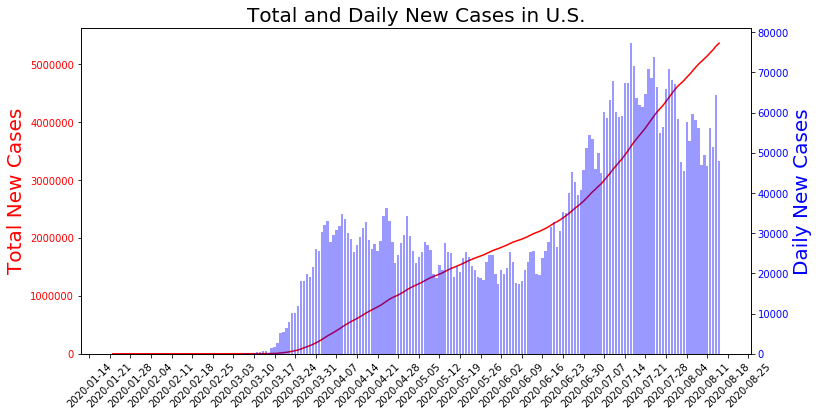

In [10]:
fig,ax1 = plt.subplots(figsize = (12,6))
ax2 = ax1.twinx()
ax1.plot(US.index, US['Total Cases'],'r-')
ax1.tick_params(axis = 'y',labelcolor = 'r')
ax1.tick_params(axis = 'x',labelrotation = 45)
ax1.set_ylim(0)
ax1.set_ylabel('Total New Cases', color = 'r',fontsize = 20)
ax1.set_title('Total and Daily New Cases in U.S.', fontsize = 20)

ax2.bar(US.index, US['New Cases'],color = 'b',alpha = 0.4)
ax2.tick_params(axis = 'y',labelcolor = 'b')
ax2.set_ylabel('Daily New Cases', color = 'b',fontsize = 20)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval = 1))
plt.show();

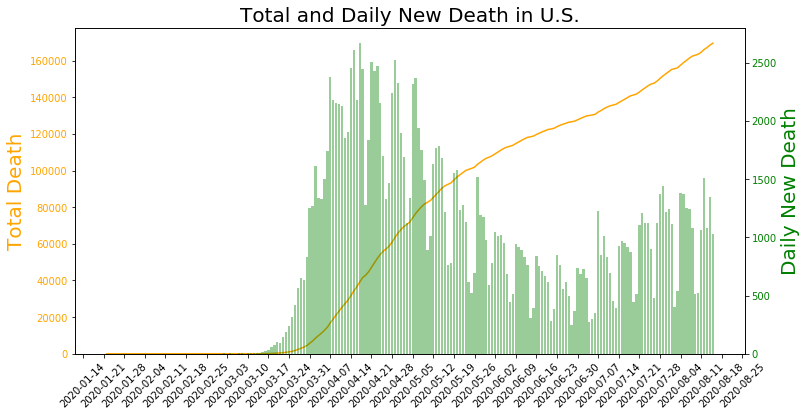

In [11]:
fig,ax1 = plt.subplots(figsize = (12,6))
ax2 = ax1.twinx()
ax1.plot(US.index, US['Total Death'],'-',color = 'orange')
ax1.tick_params(axis = 'y',labelcolor = 'orange')
ax1.tick_params(axis = 'x',labelrotation = 45)
ax1.set_ylim(0)
ax1.set_ylabel('Total Death', color = 'orange',fontsize = 20)
ax1.set_title('Total and Daily New Death in U.S.', fontsize = 20)

ax2.bar(US.index, US['New Death'],color = 'g',alpha = 0.4)
ax2.tick_params(axis = 'y',labelcolor = 'g')
ax2.set_ylabel('Daily New Death', color = 'g',fontsize = 20)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval = 1))
plt.show();

### States Analysis

In [12]:
states = list(confirmed_clean['Province_State'].unique())

In [13]:
data = {}

for state in states:
    
    ### New cases
    state_new = confirmed_clean.loc[confirmed_clean['Province_State'] == state]
    state_new_agg = state_new.groupby('Date')[['Total Cases']].sum().reset_index()
    state_new_agg['New Cases'] = [state_new_agg['Total Cases'][0]] + \
                 [y-x if y>x else 0 for x,y in zip(state_new_agg['Total Cases'],state_new_agg['Total Cases'][1:])]
    state_new_agg.set_index('Date',inplace = True)
    
    ### Death
    state_death = death_clean.loc[death_clean['Province_State']== state]
    state_death_agg = state_death.groupby('Date')[['Total Death']].sum().reset_index()
    state_death_agg['New Death'] =[state_death_agg['Total Death'][0]]+ \
                   [y-x if y>x else 0 for x,y in zip(state_death_agg['Total Death'],state_death_agg['Total Death'][1:])]
    state_death_agg.set_index('Date',inplace = True)
    
    data['%s' % state] = state_new_agg.merge(state_death_agg, left_index = True, right_index = True)
    data['%s' % state]['Fatality'] = (data['%s' % state]['Total Death']/data['%s' % state]['Total Cases']*100).fillna(0)
    data['%s' % state]['State'] = state
    data['%s' % state].reset_index(inplace = True)

### Trends of Daily New Cases and Death for Each State

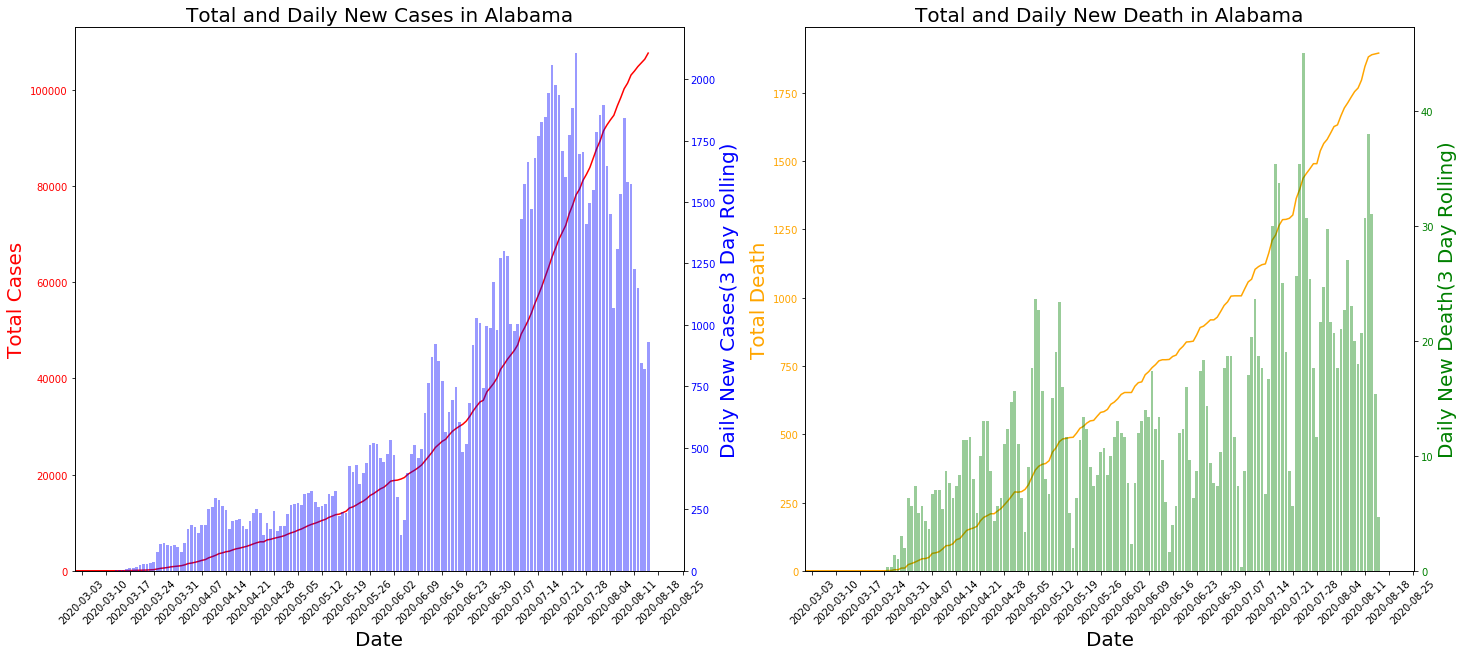

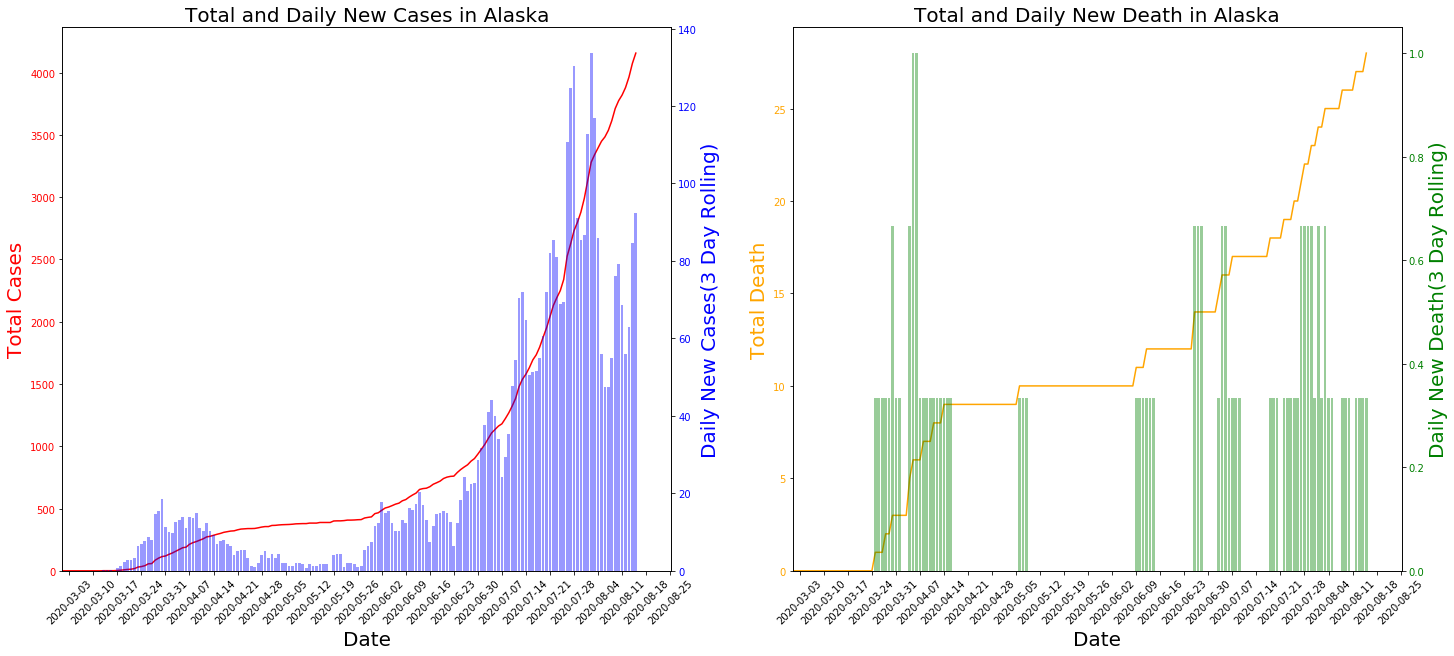

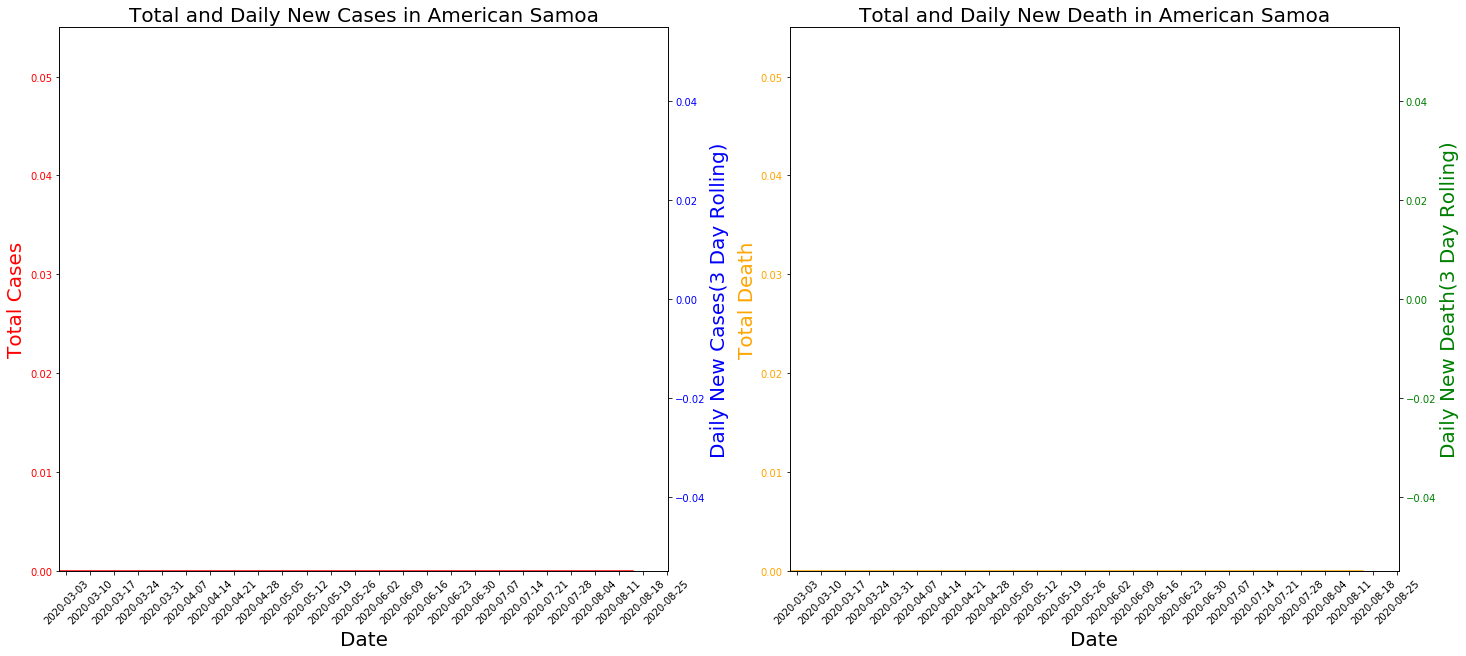

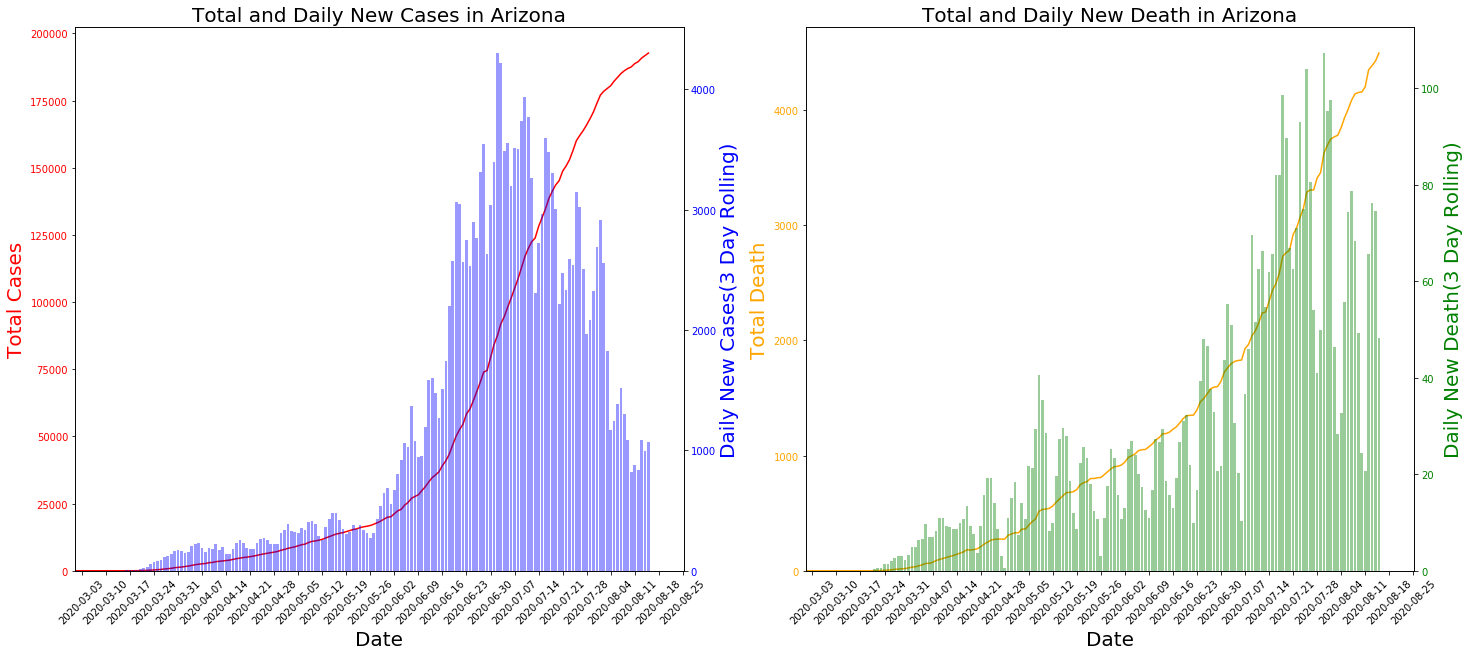

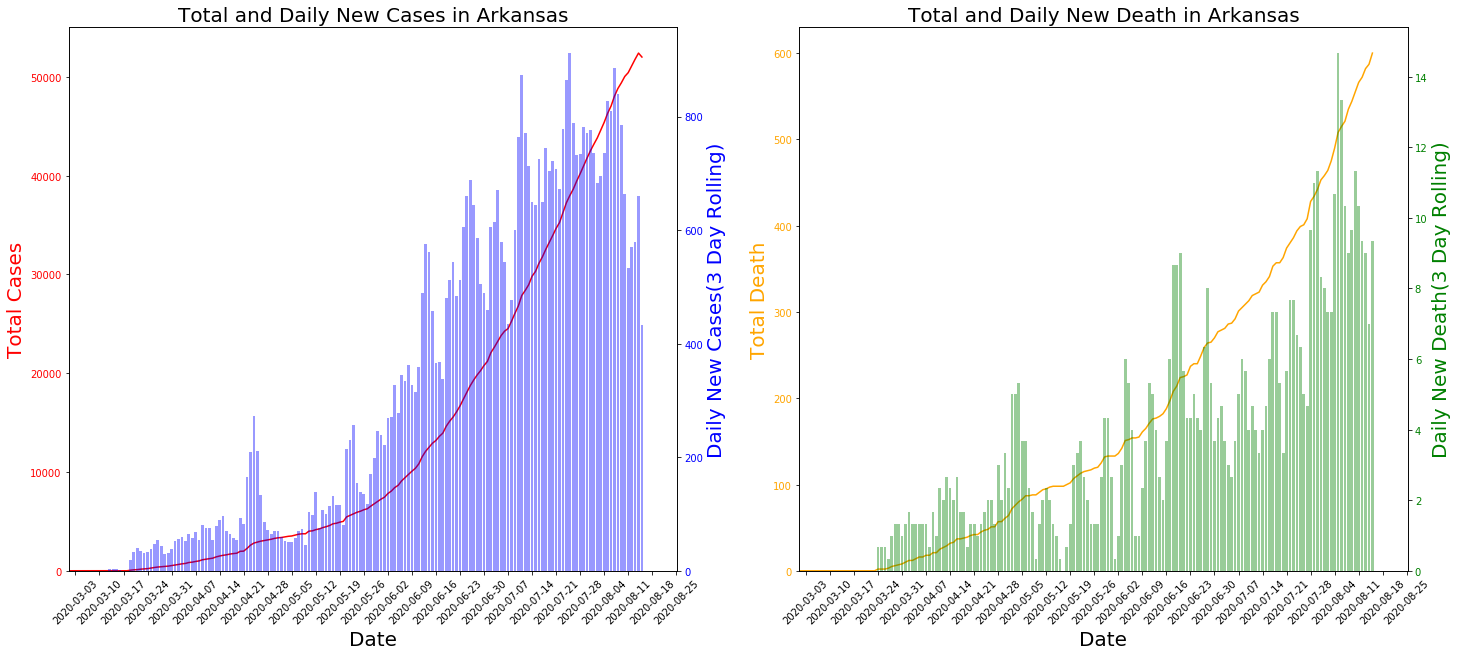

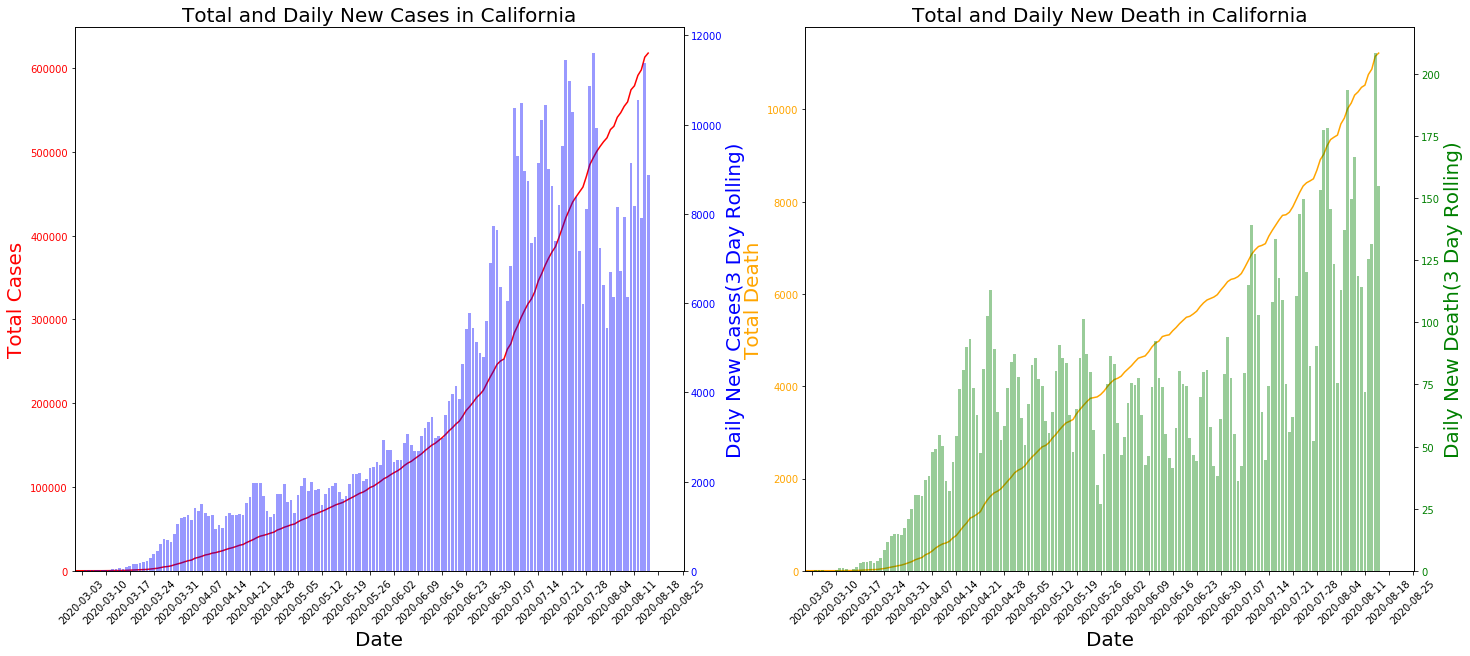

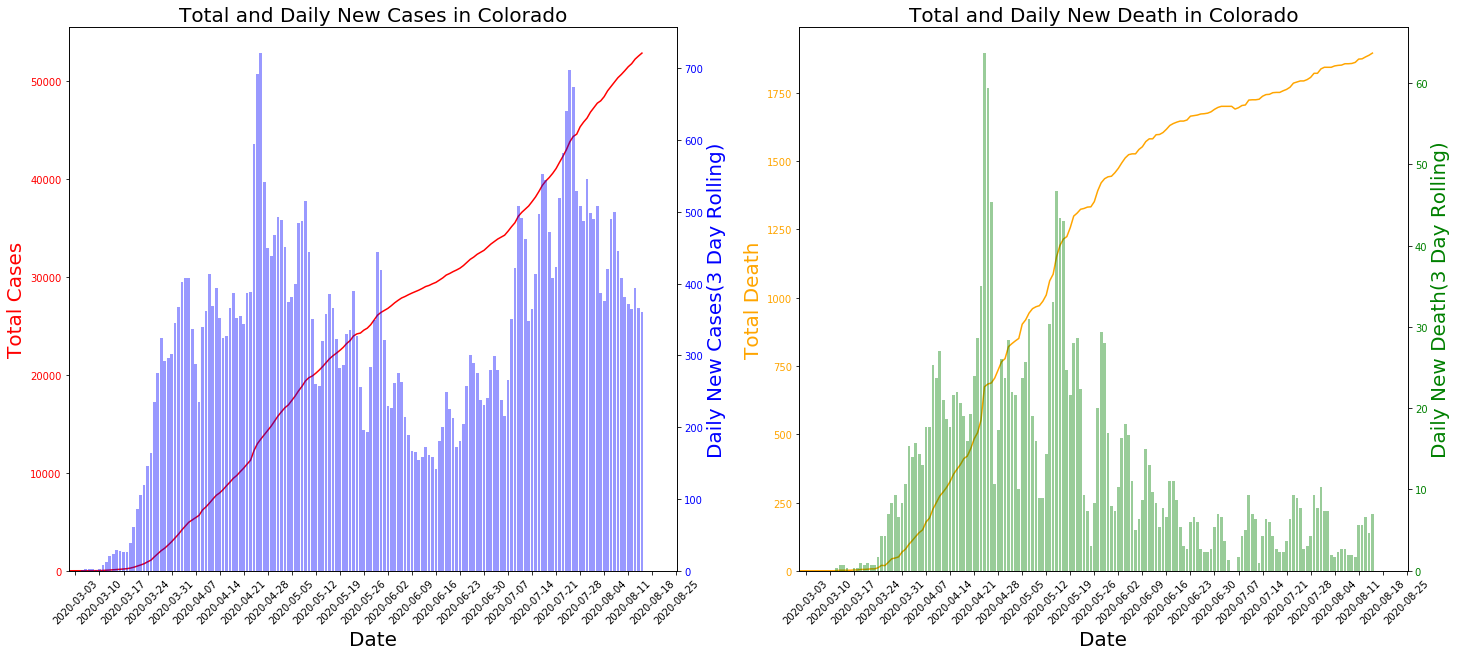

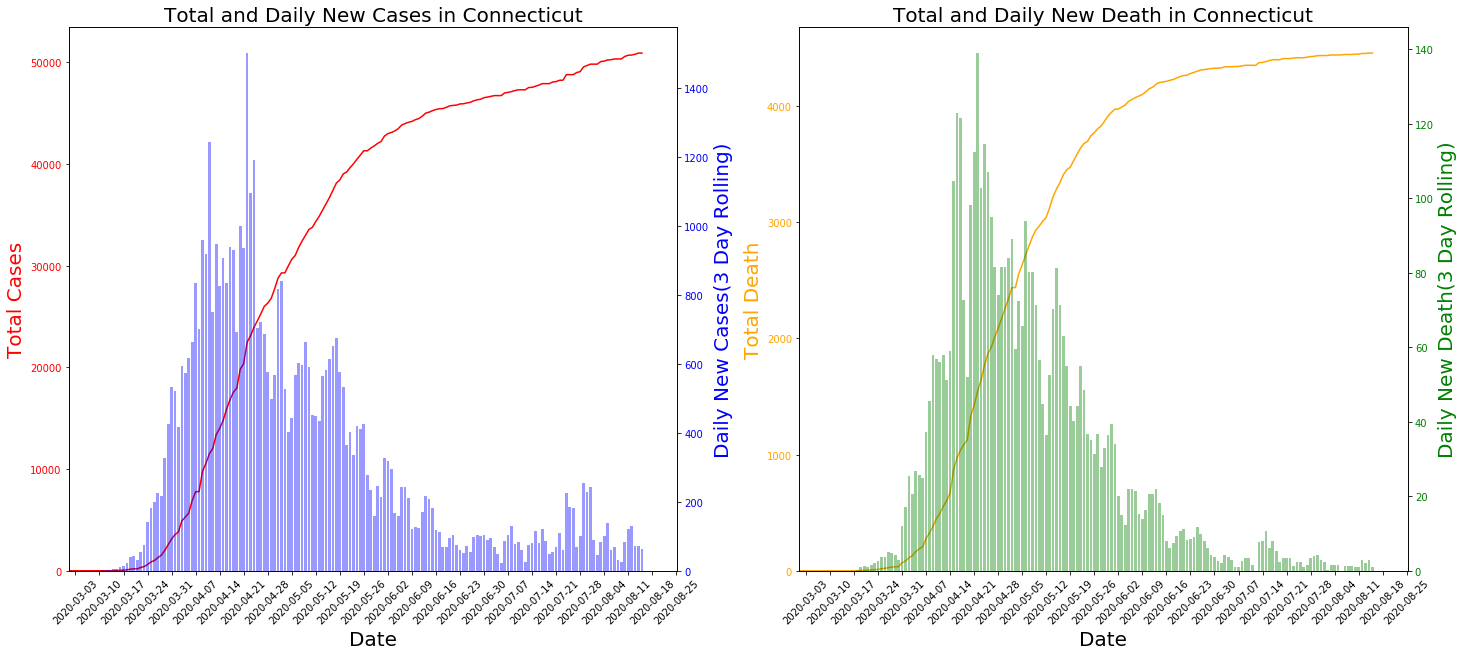

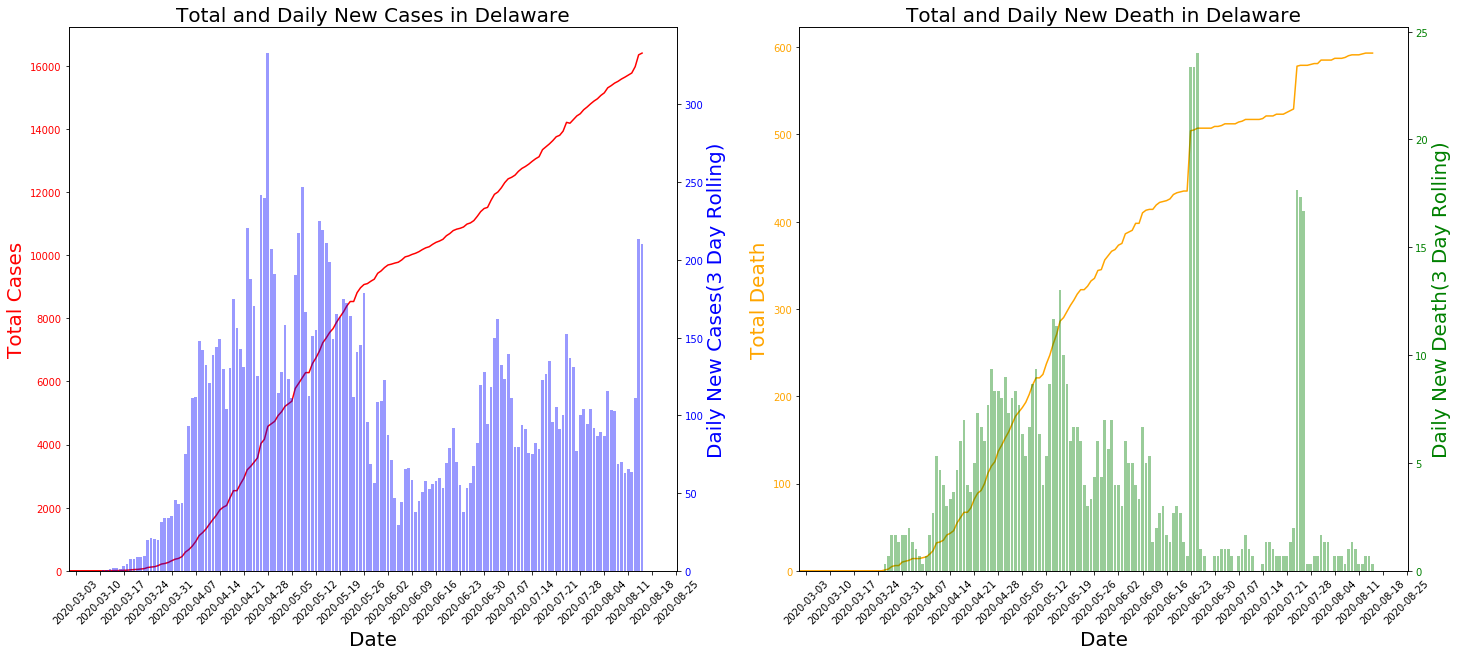

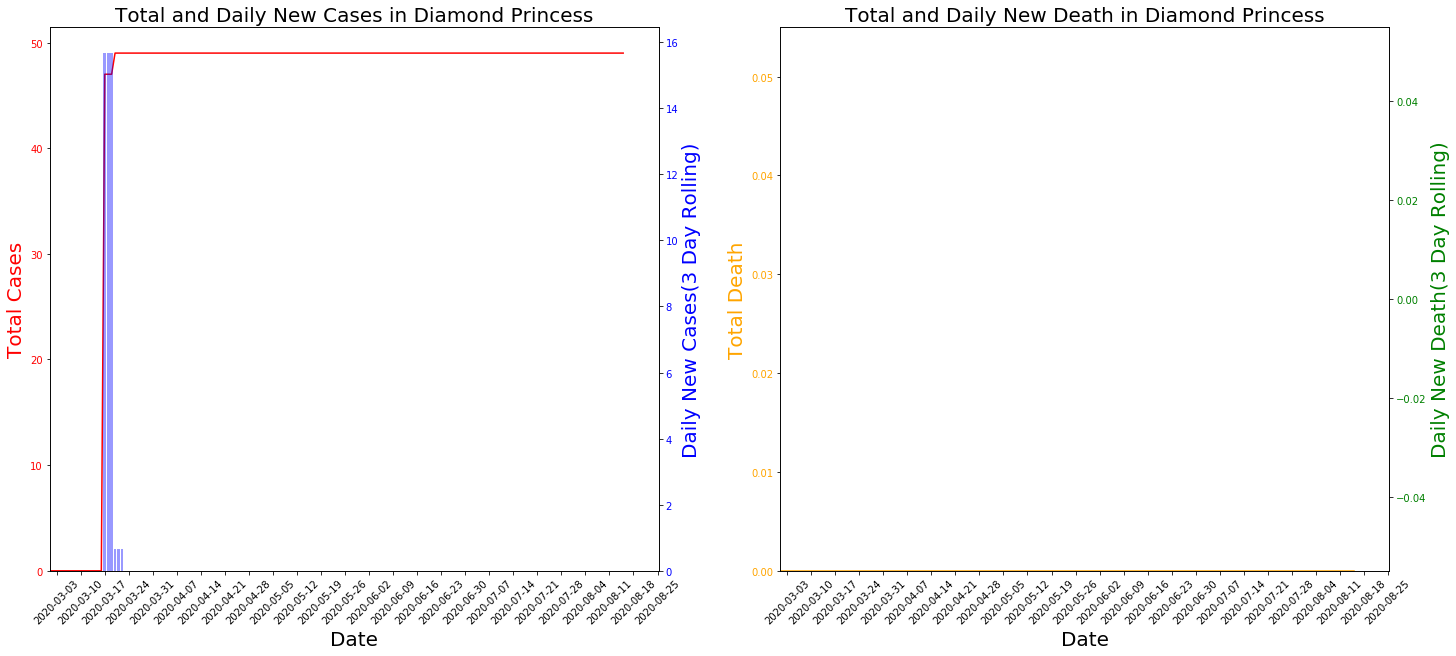

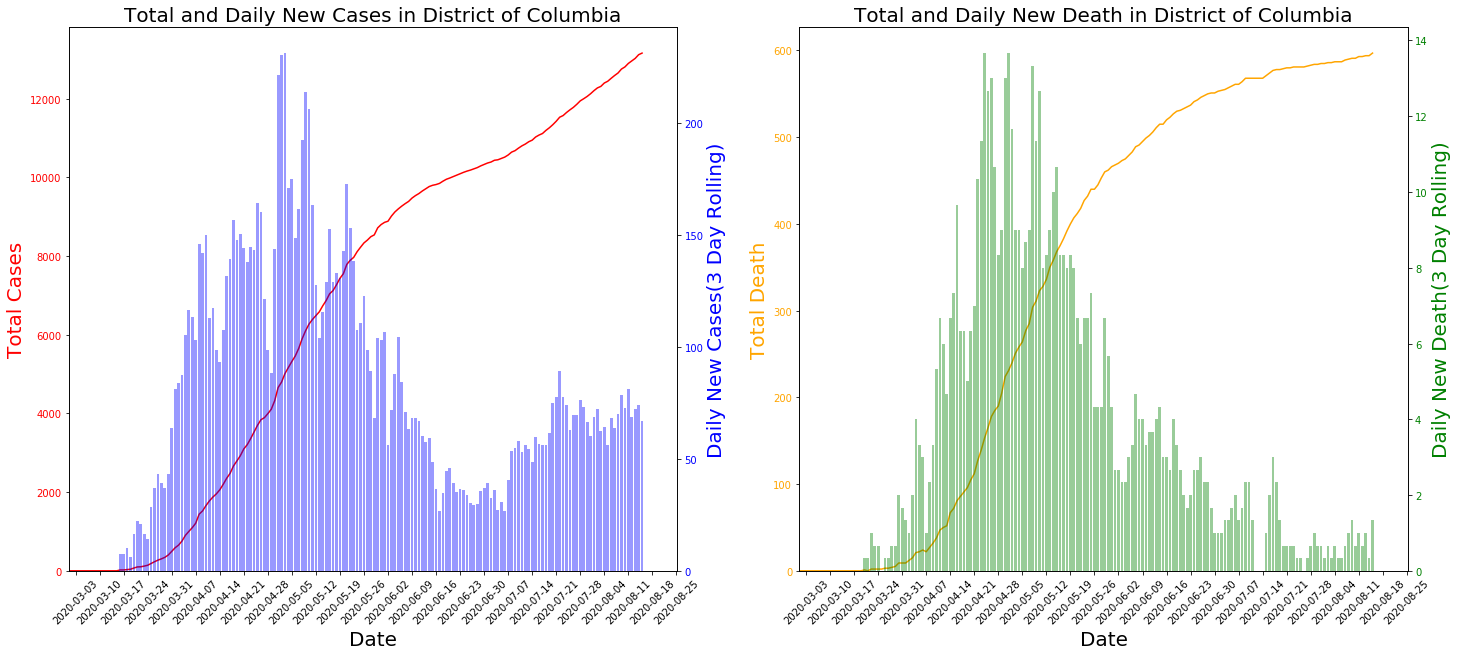

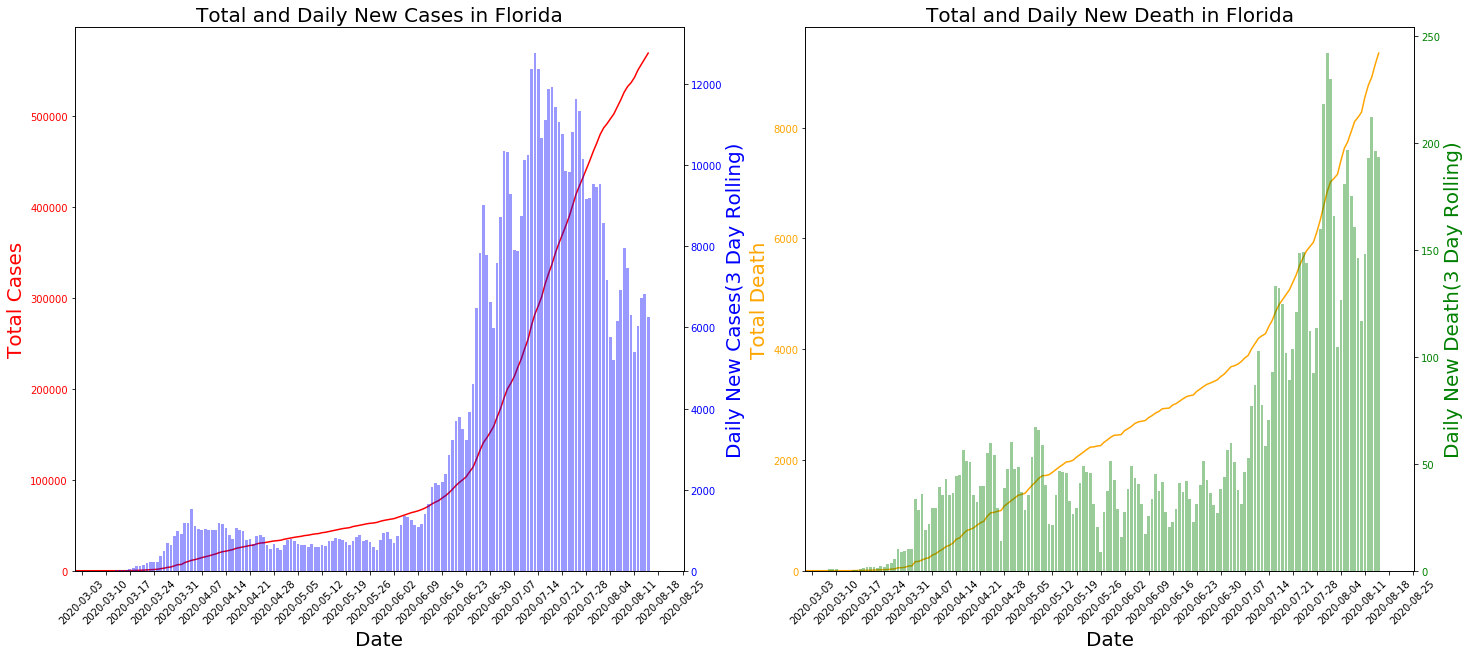

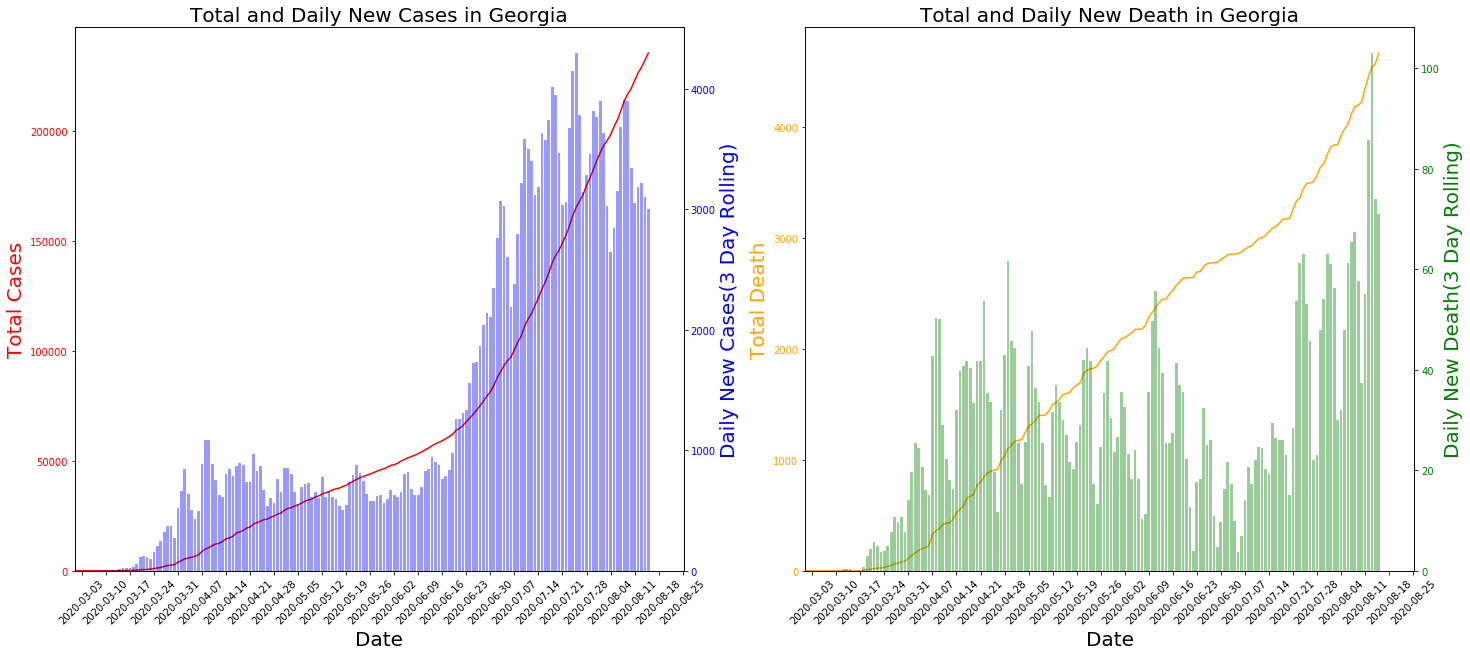

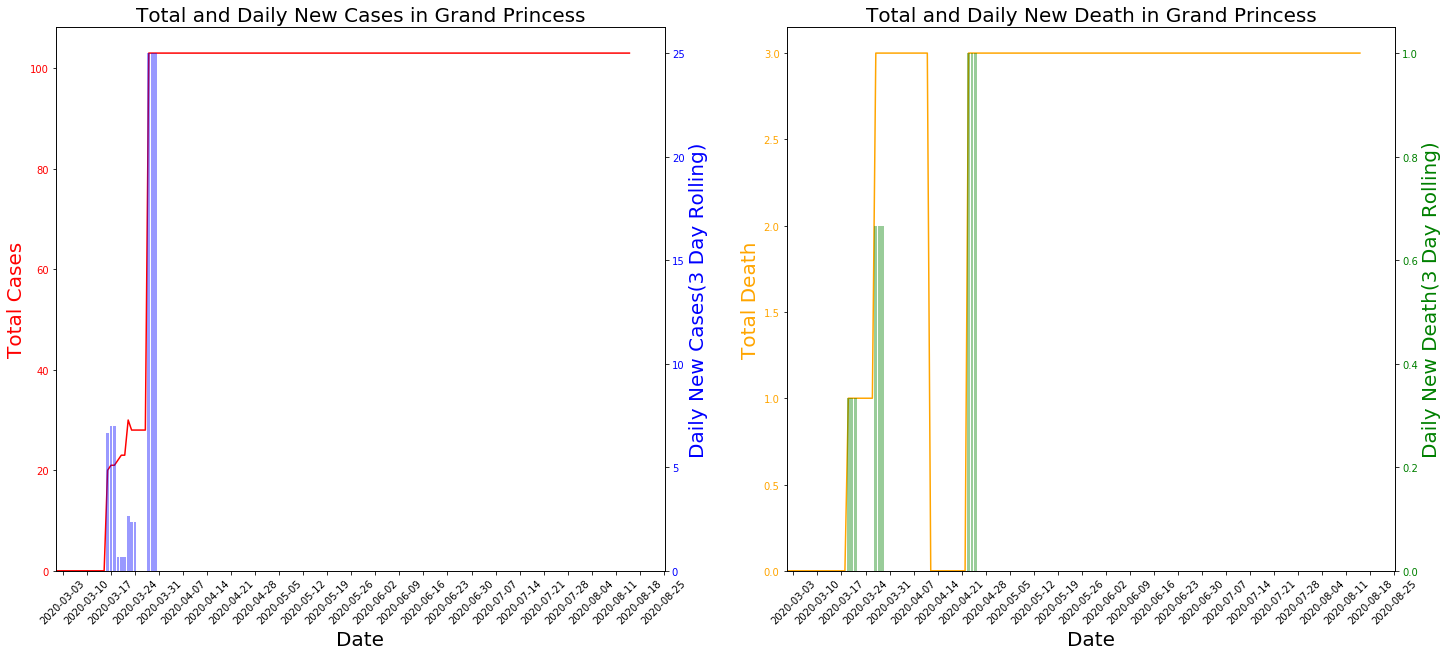

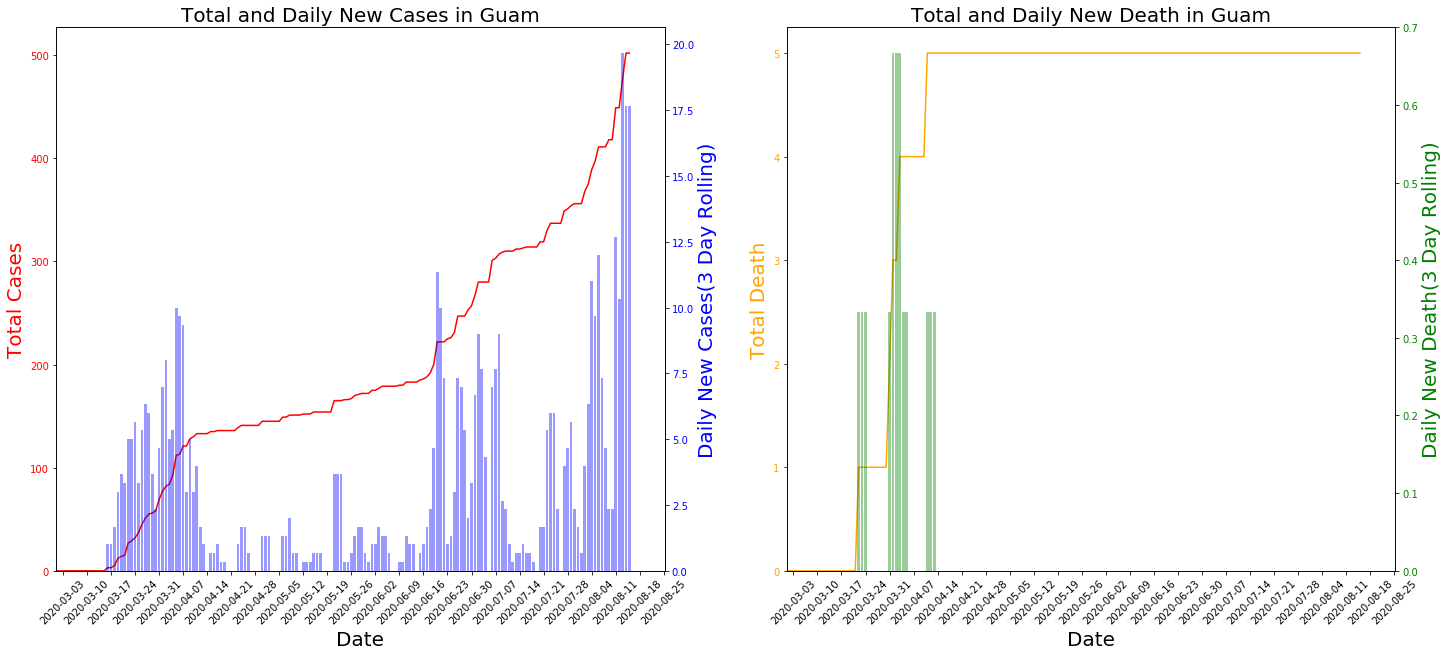

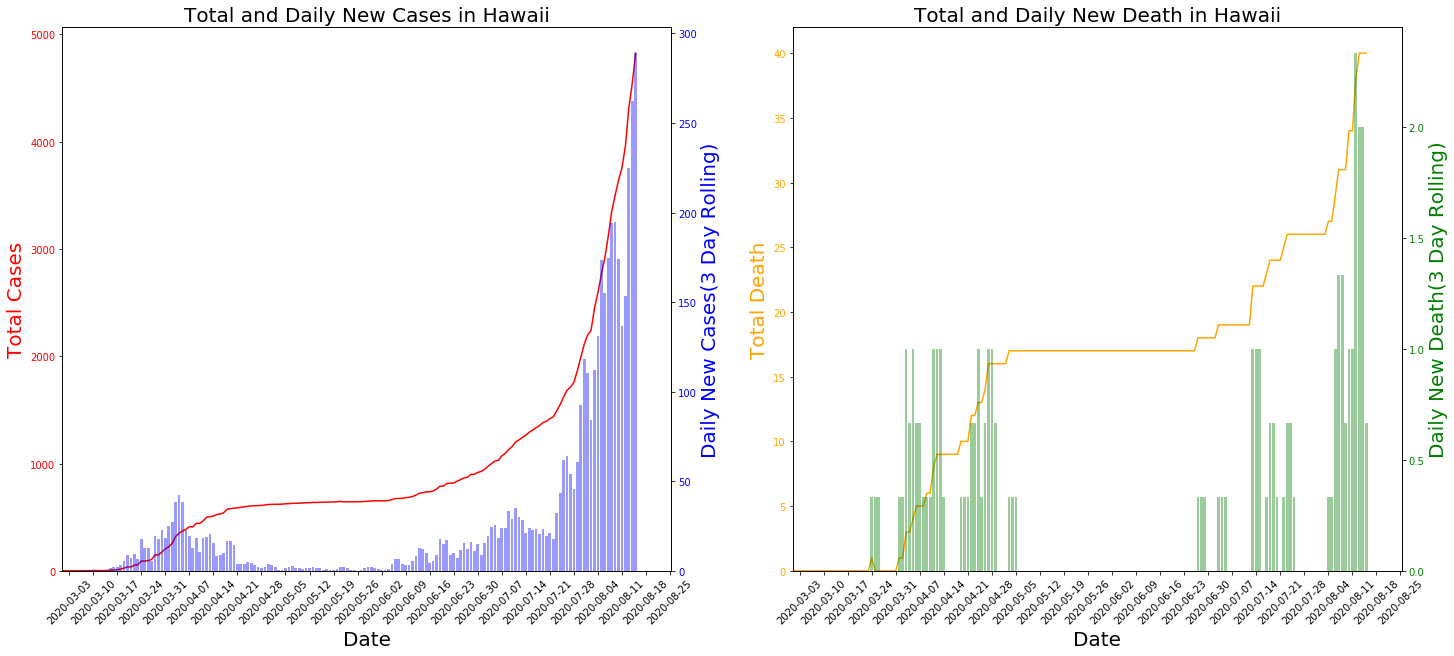

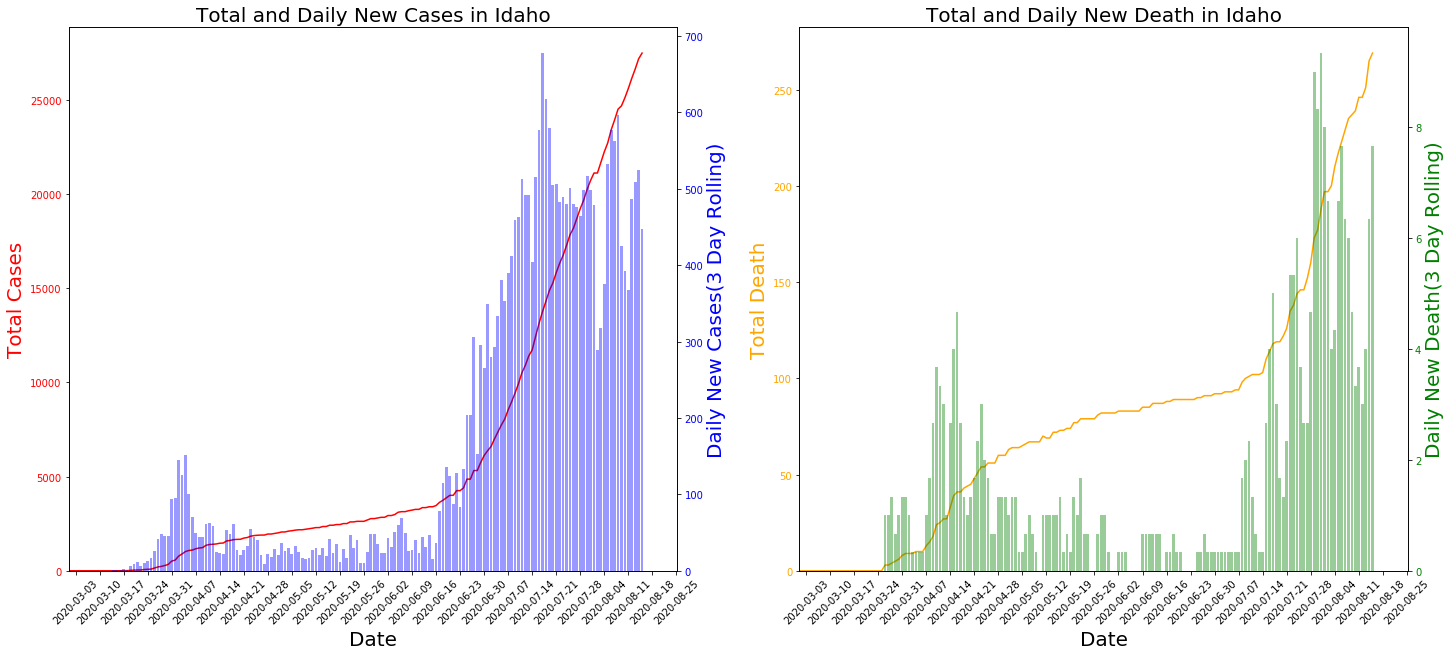

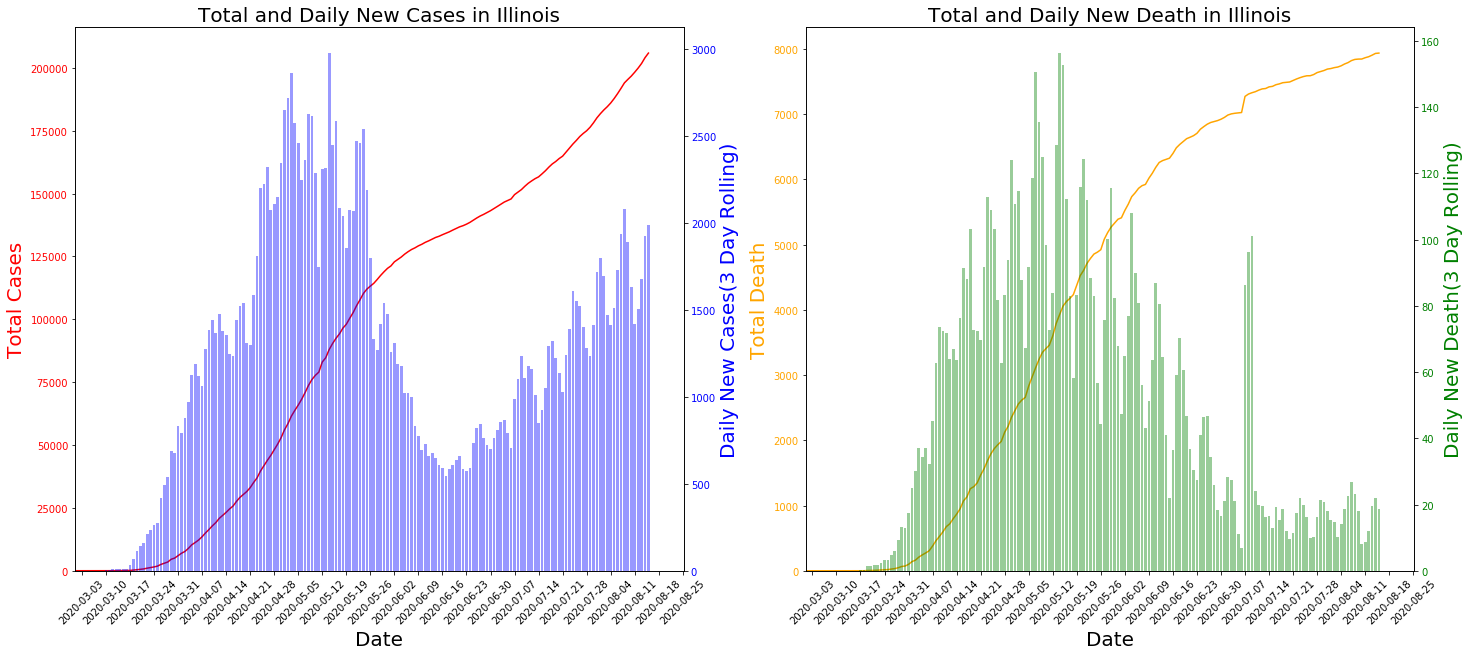

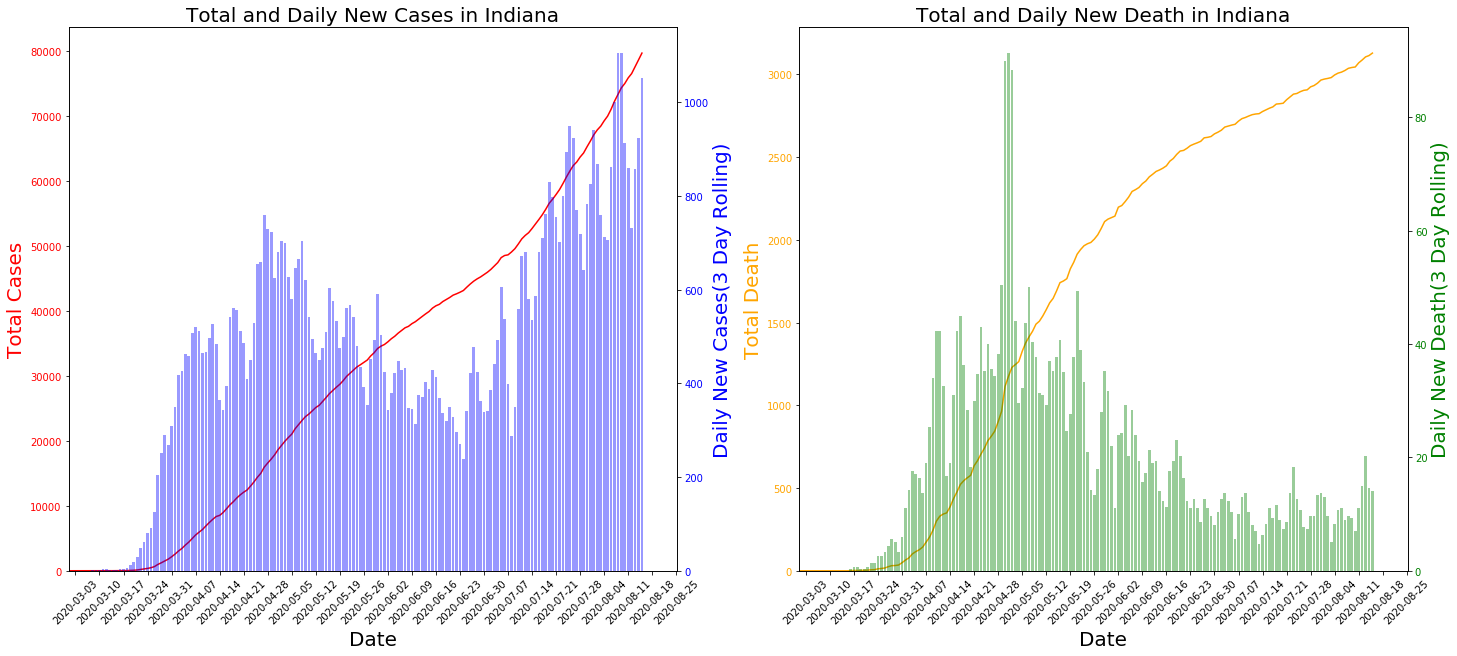

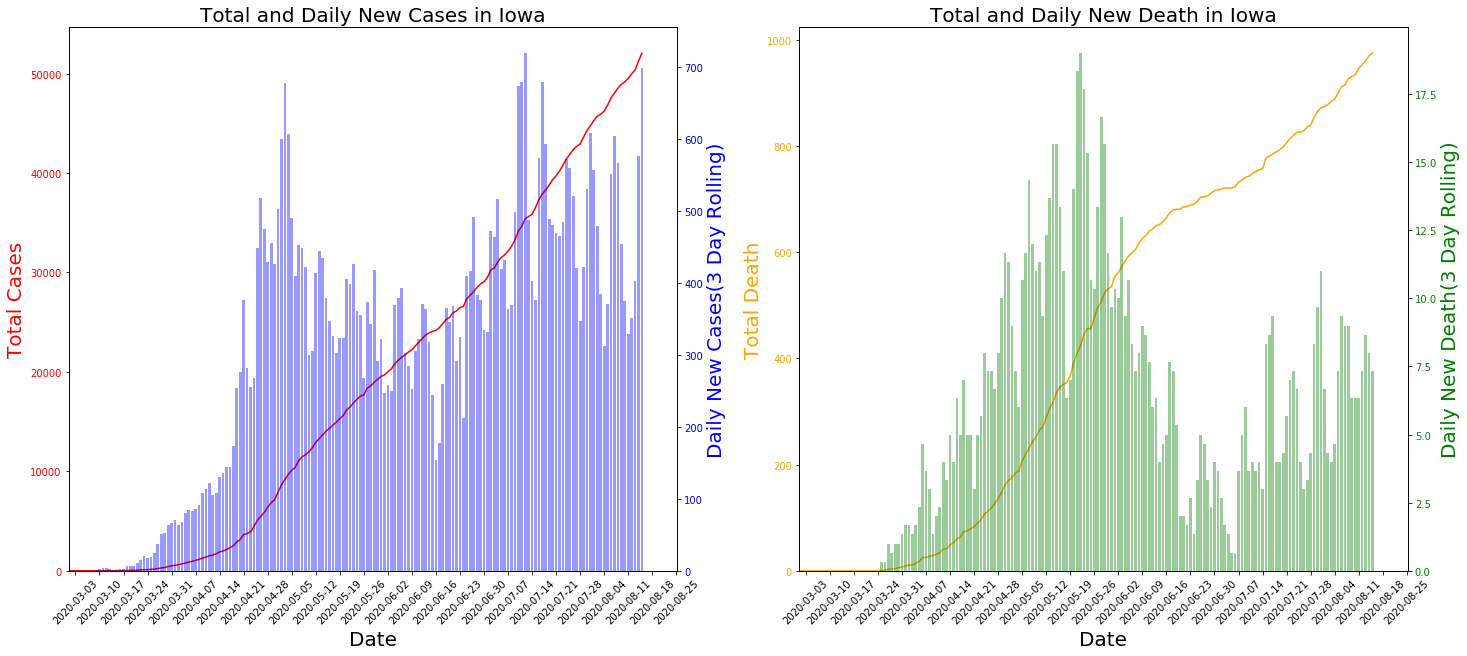

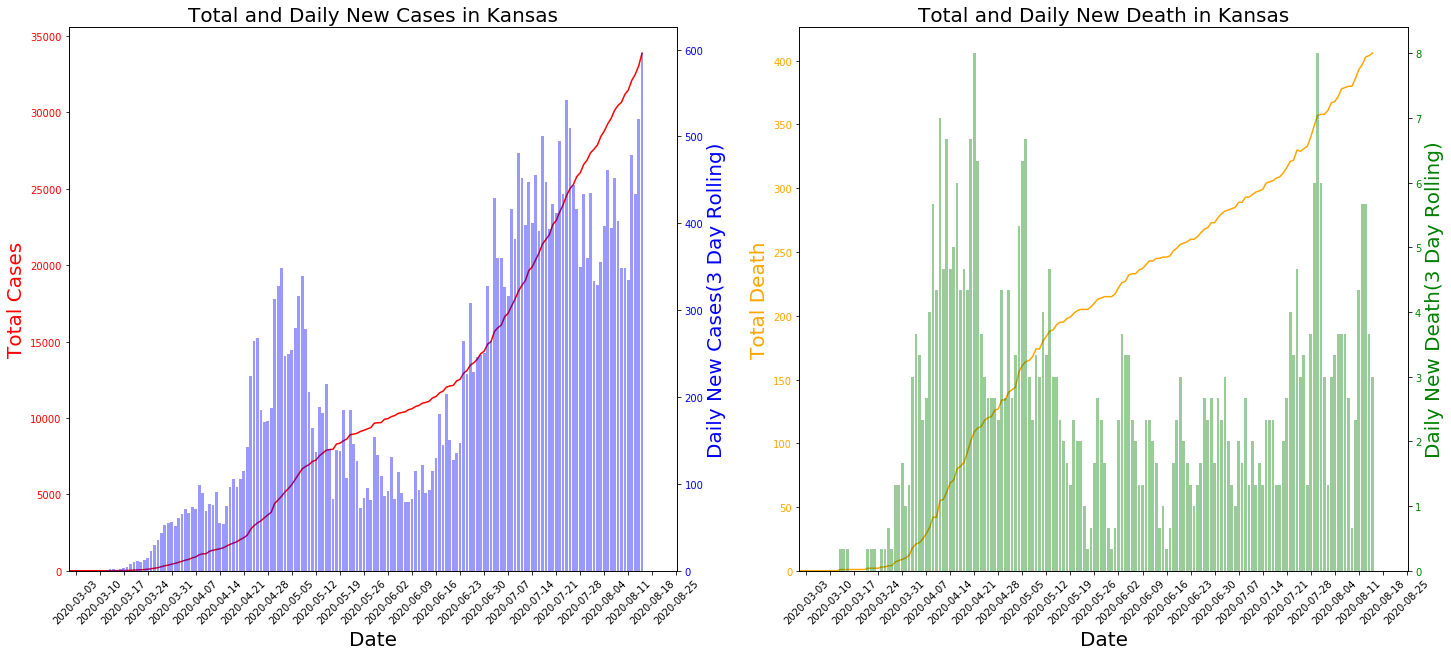

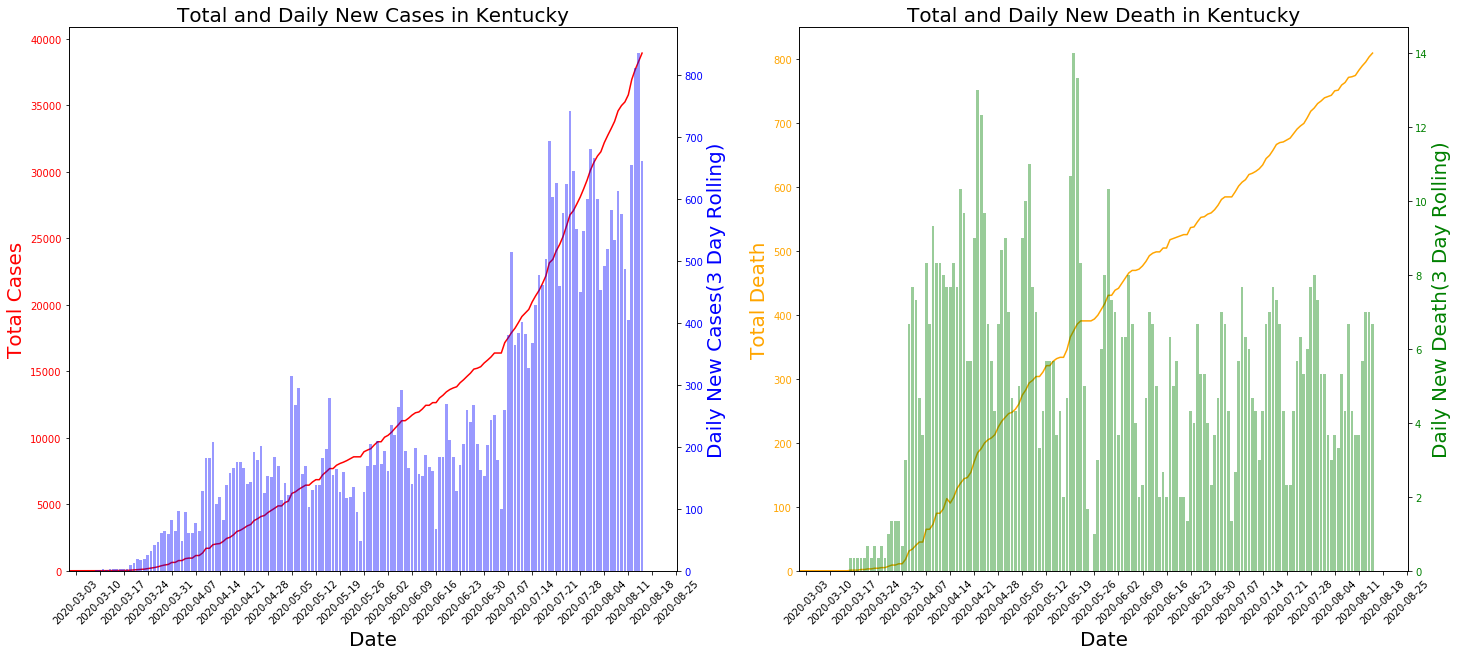

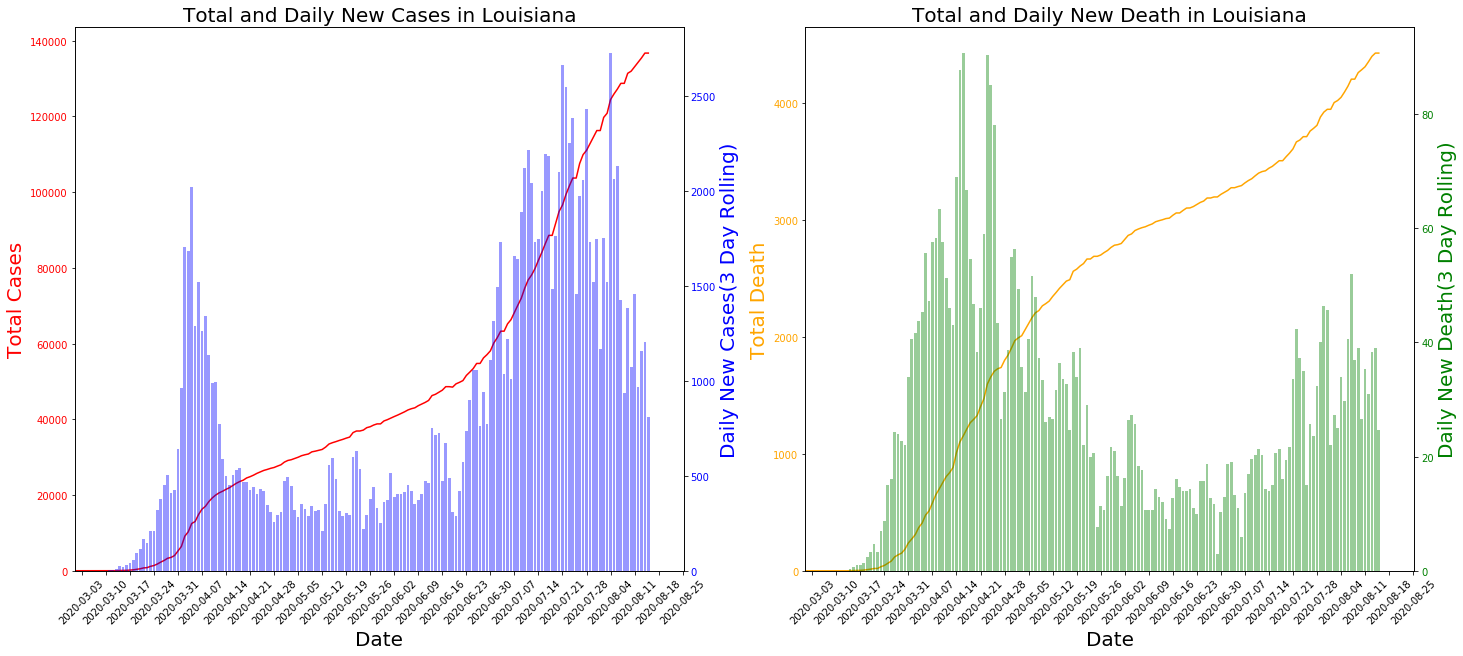

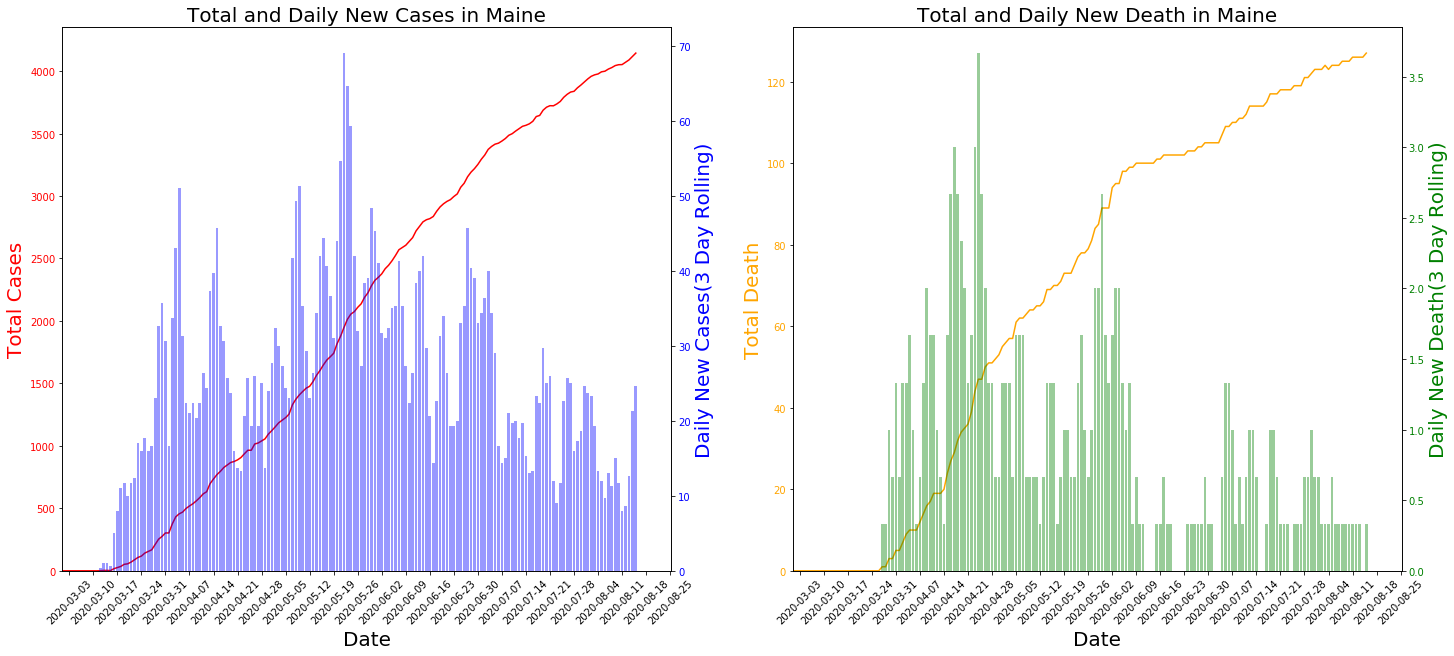

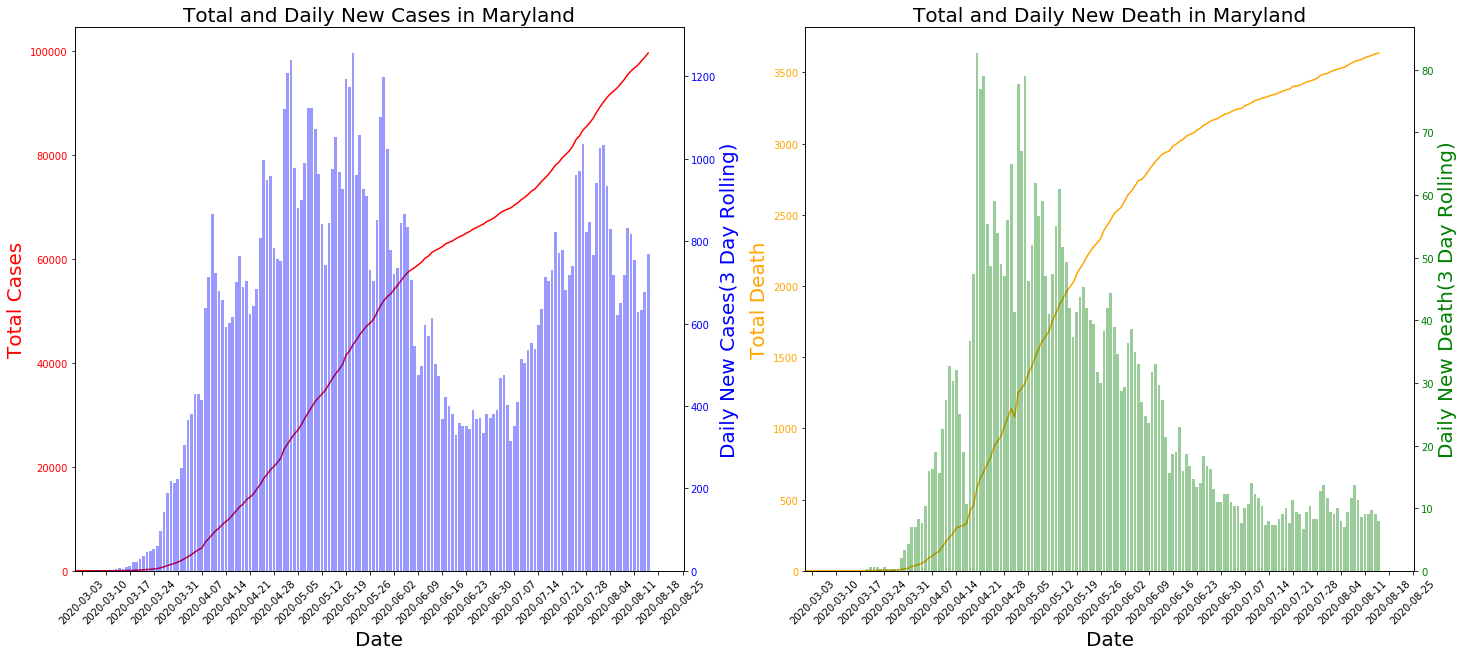

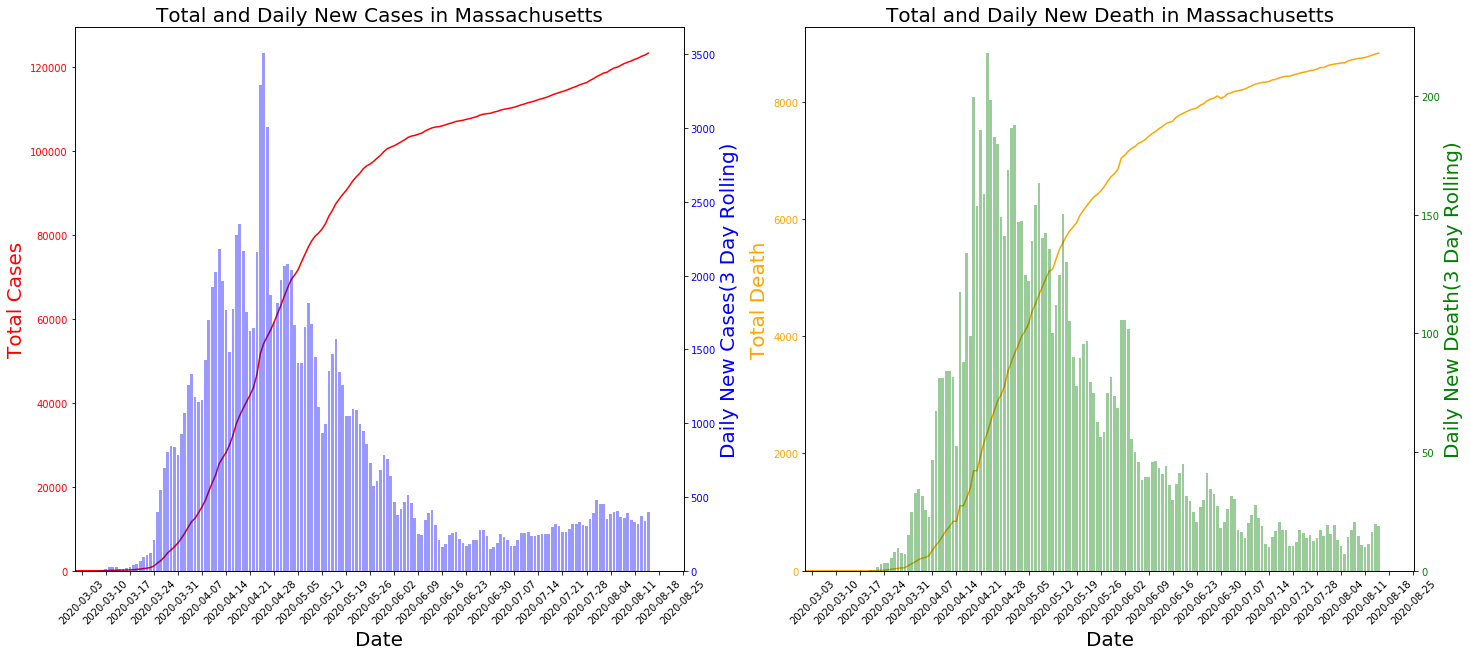

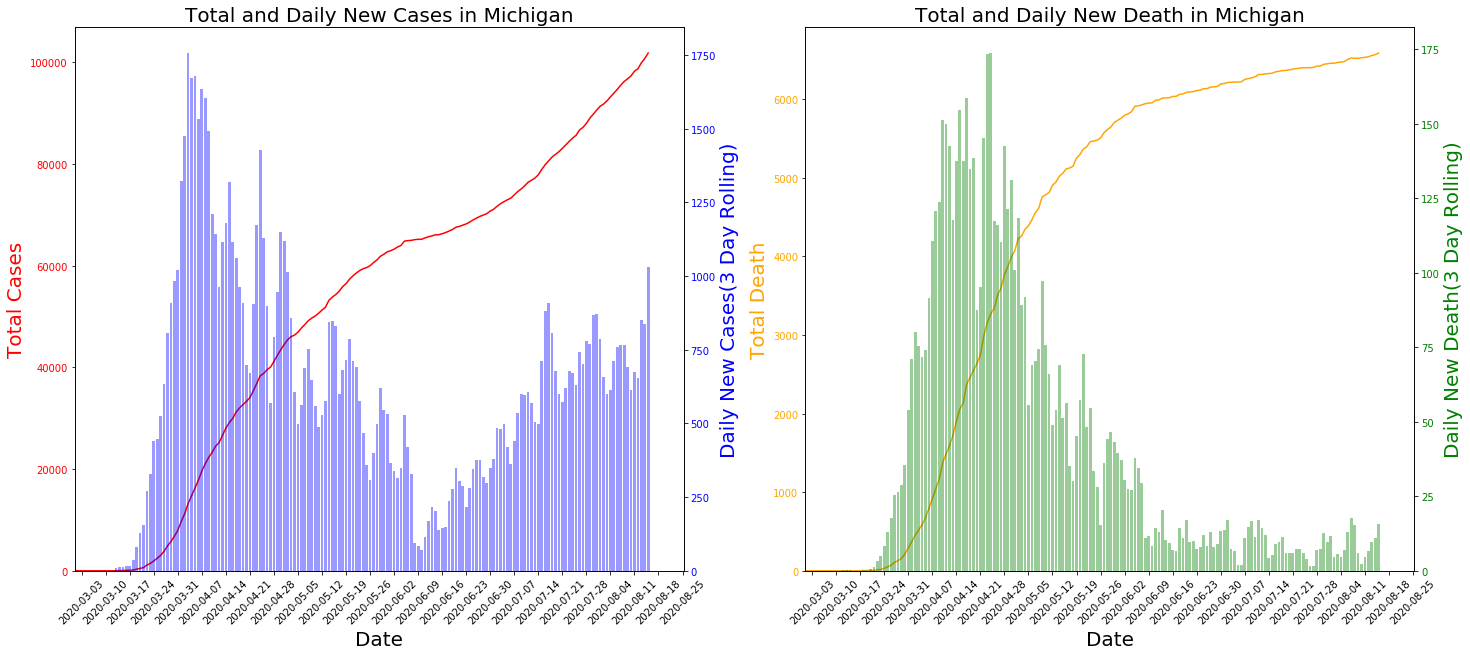

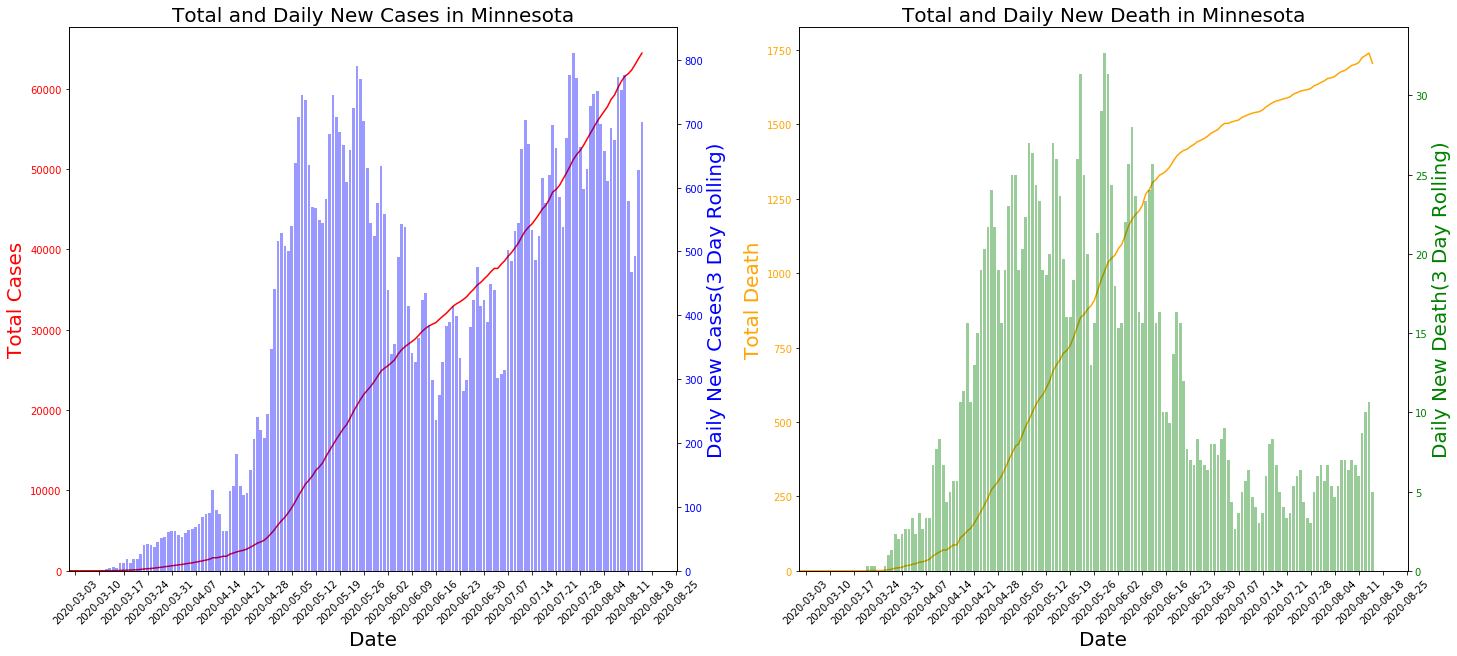

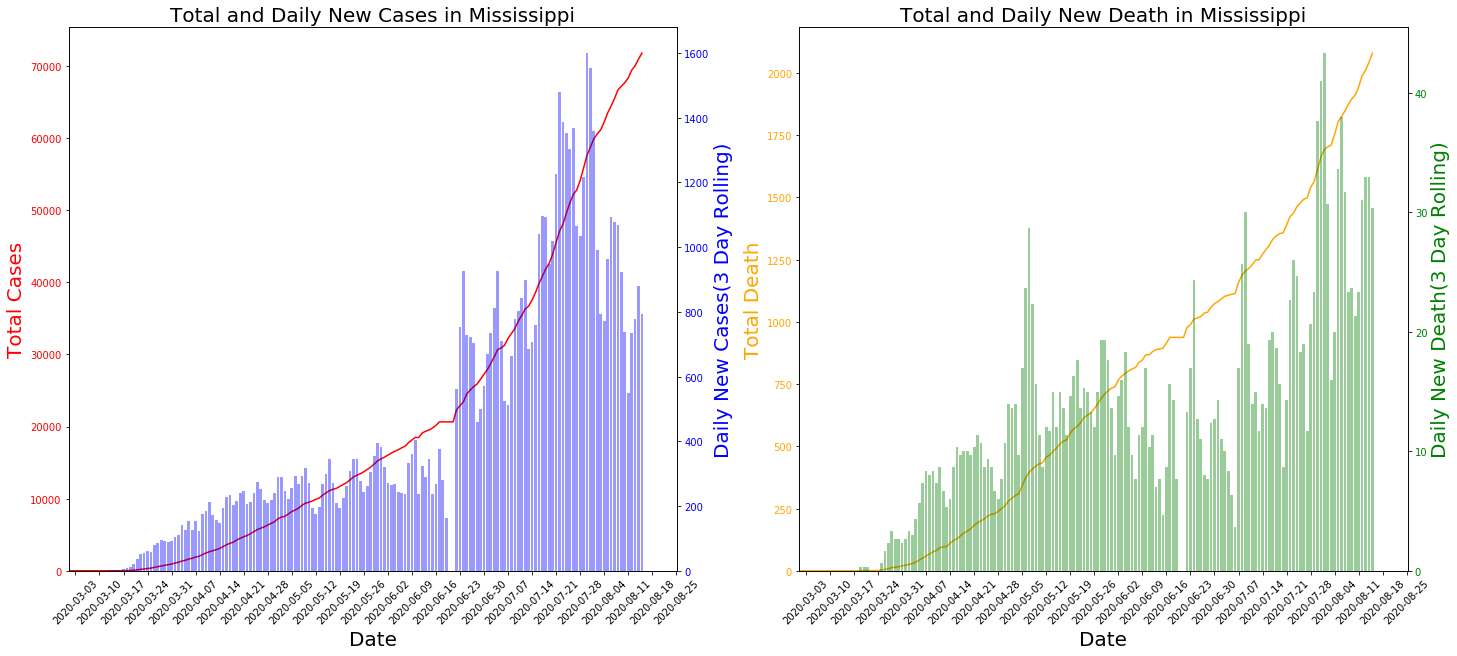

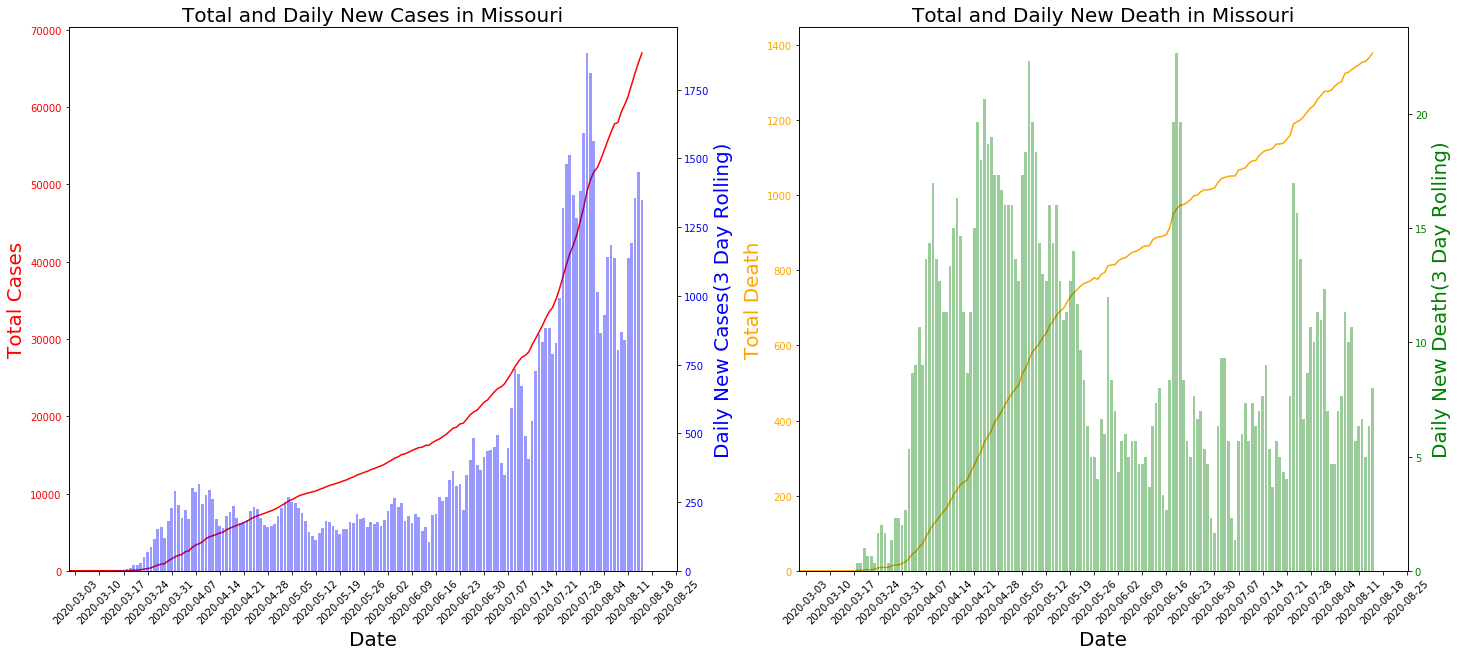

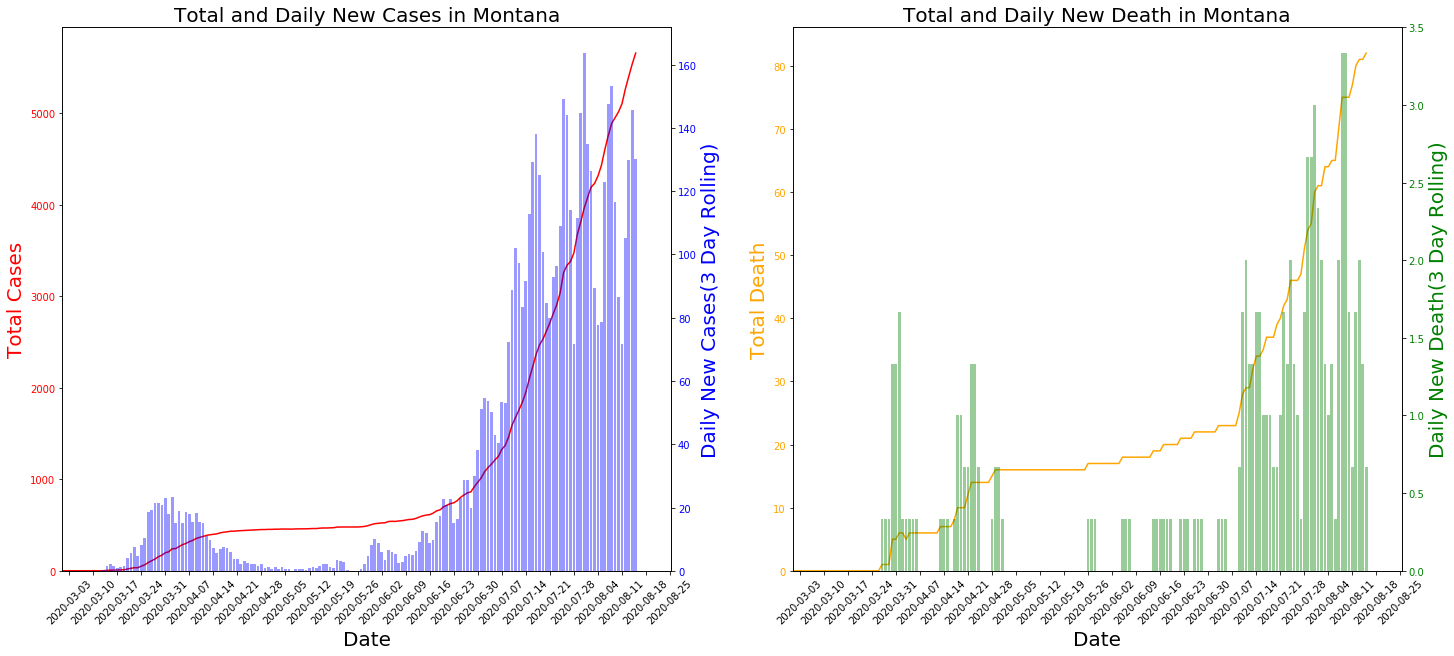

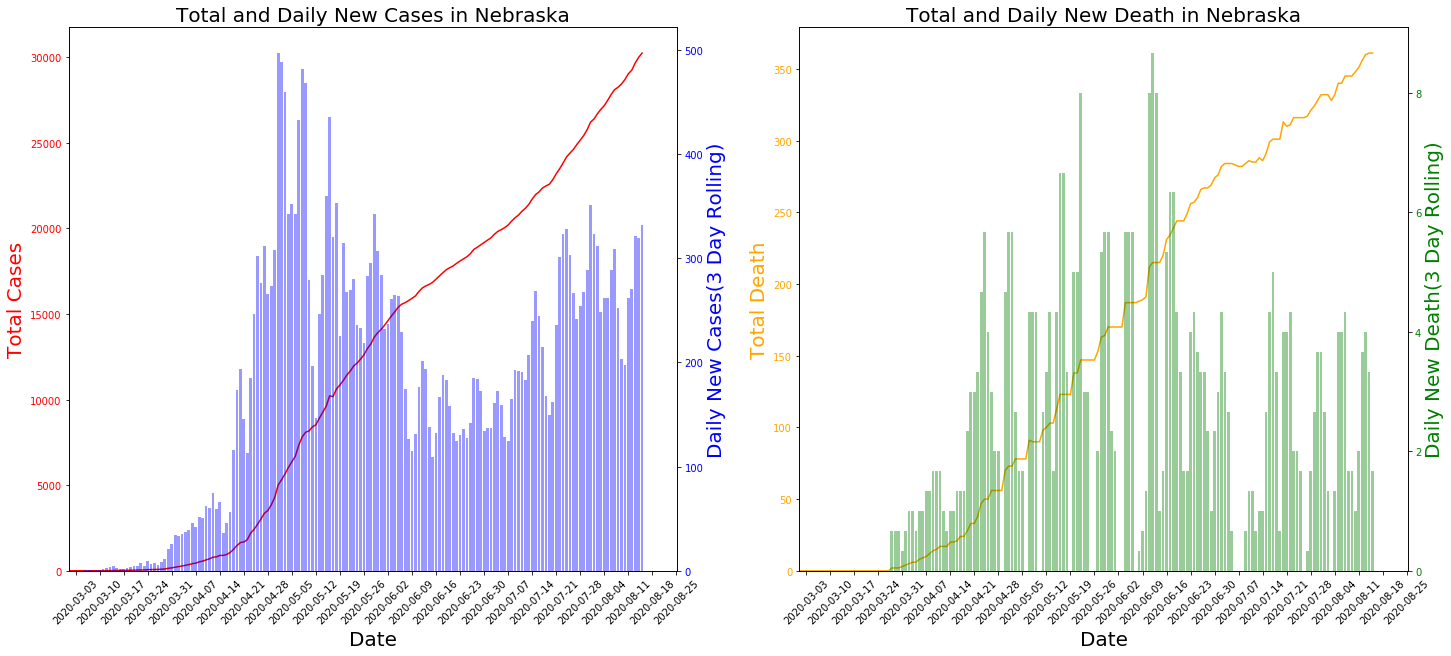

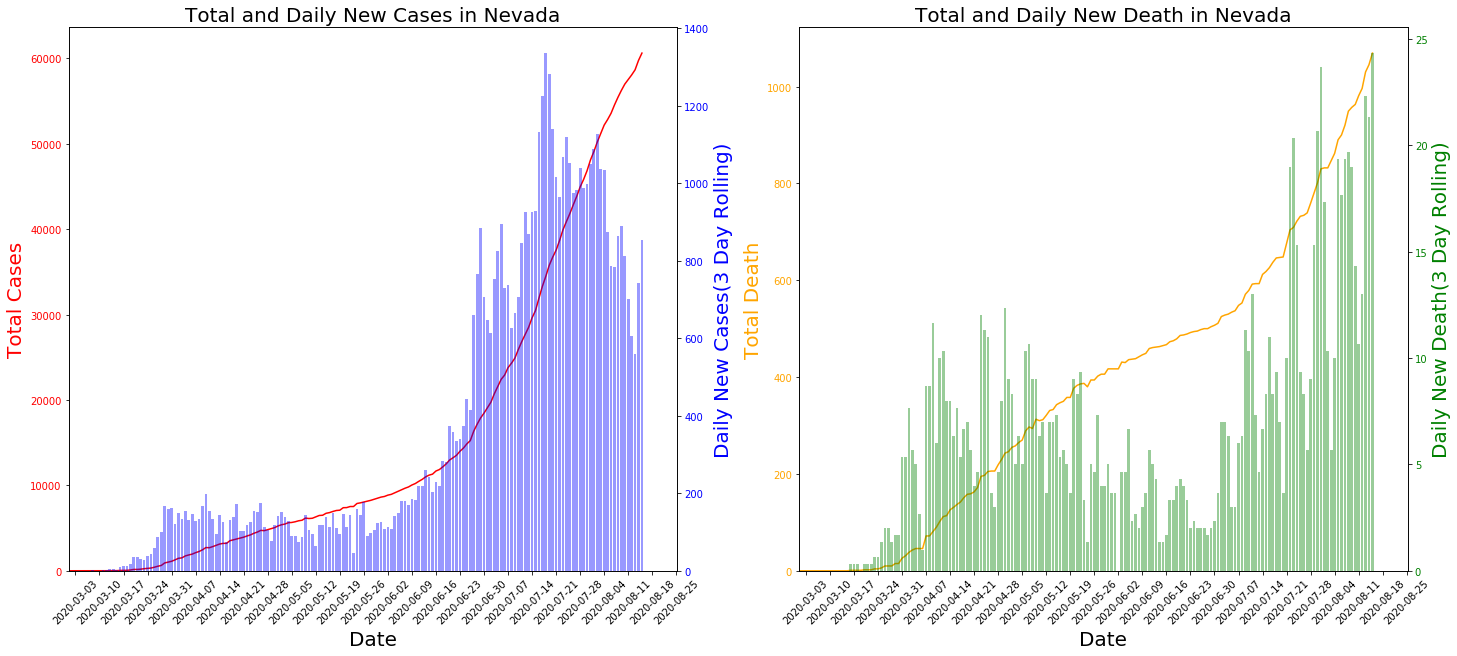

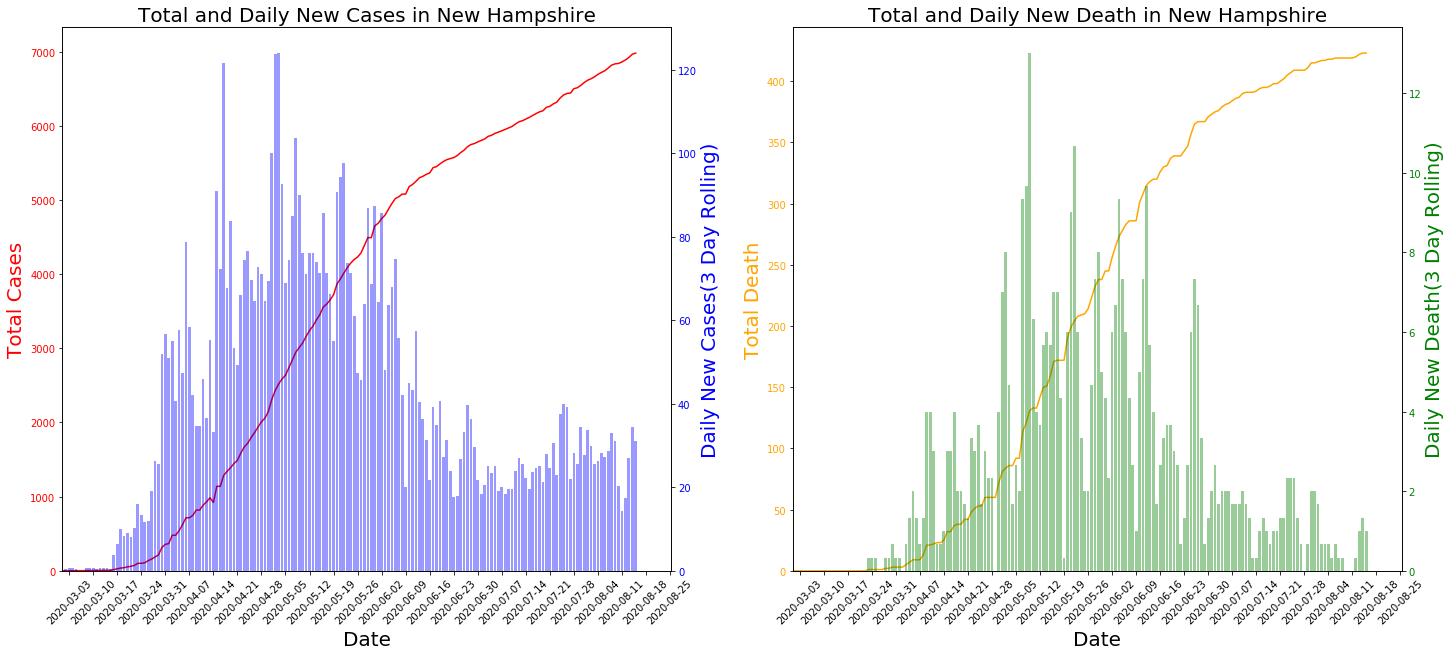

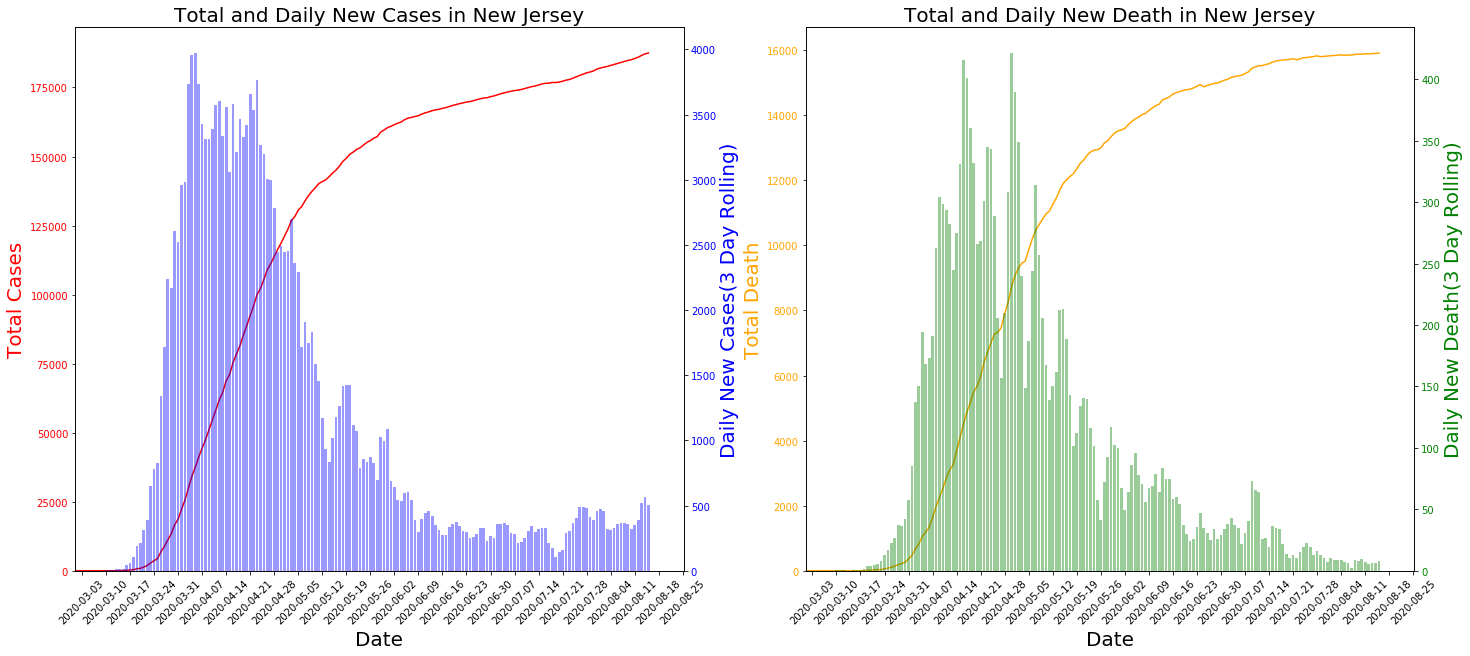

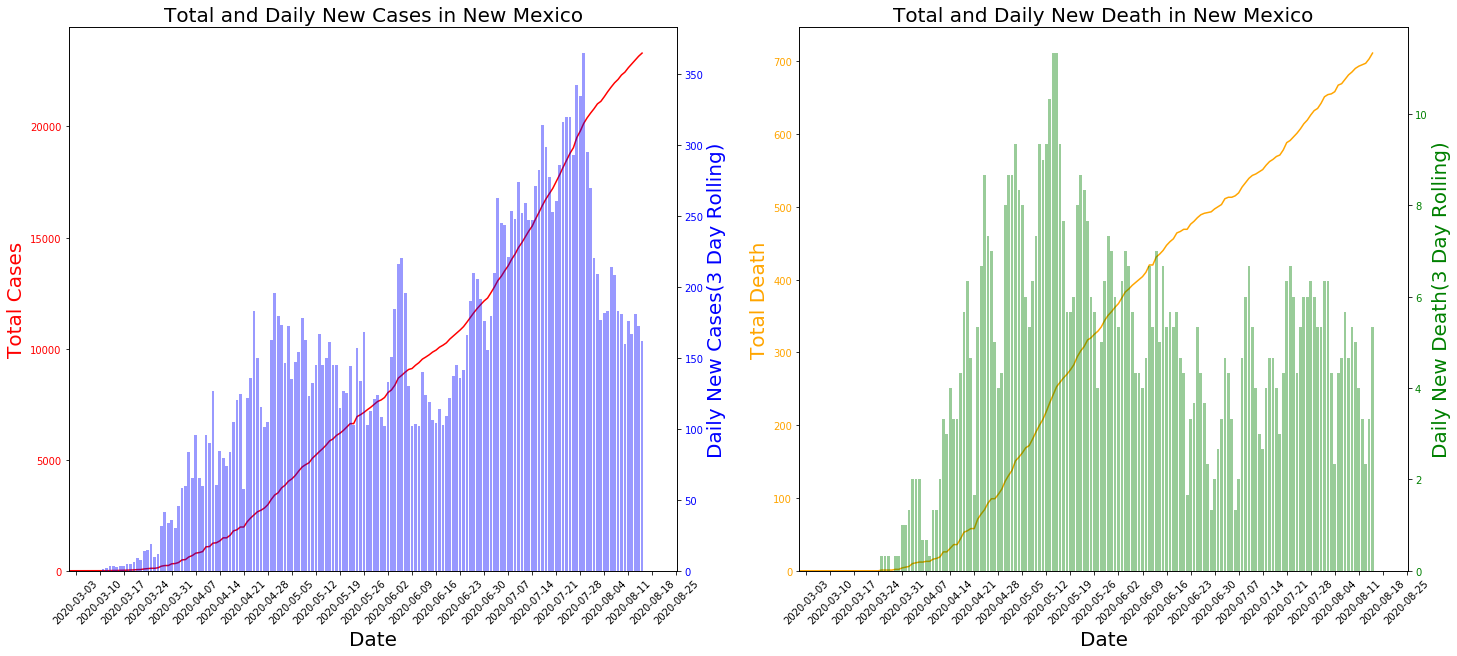

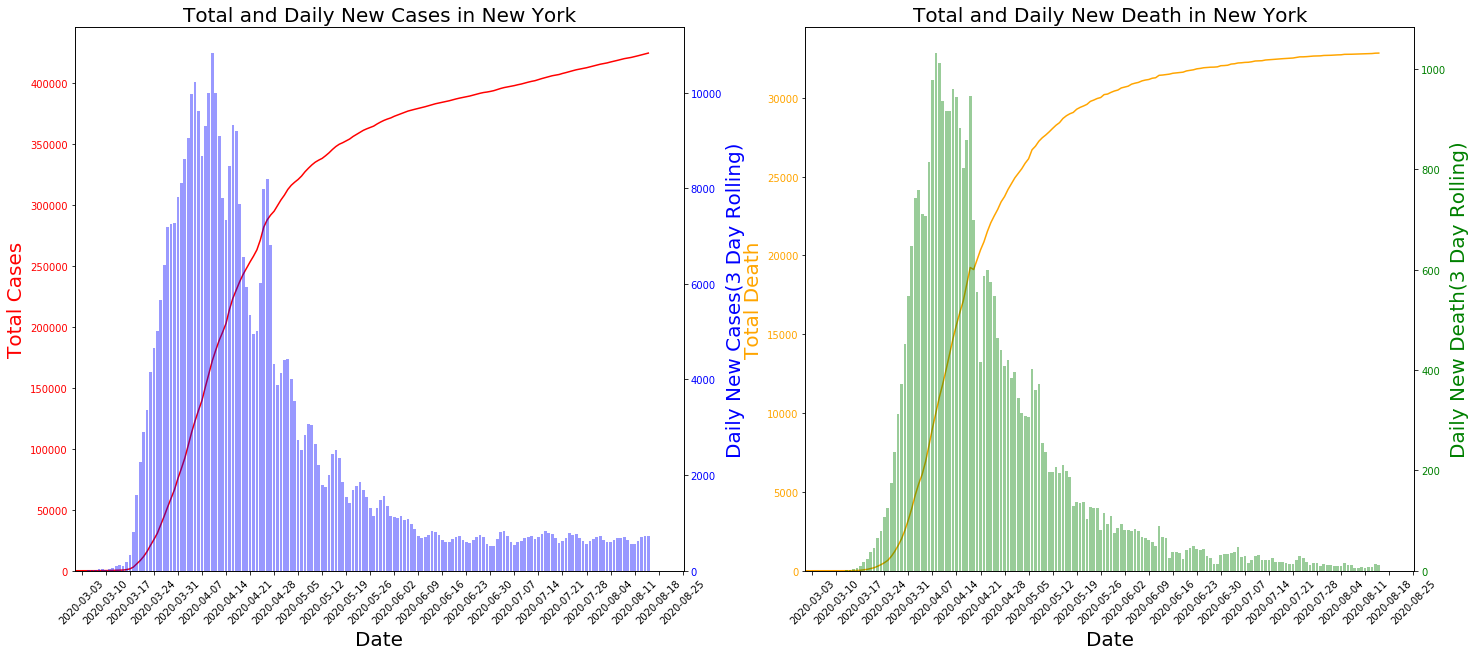

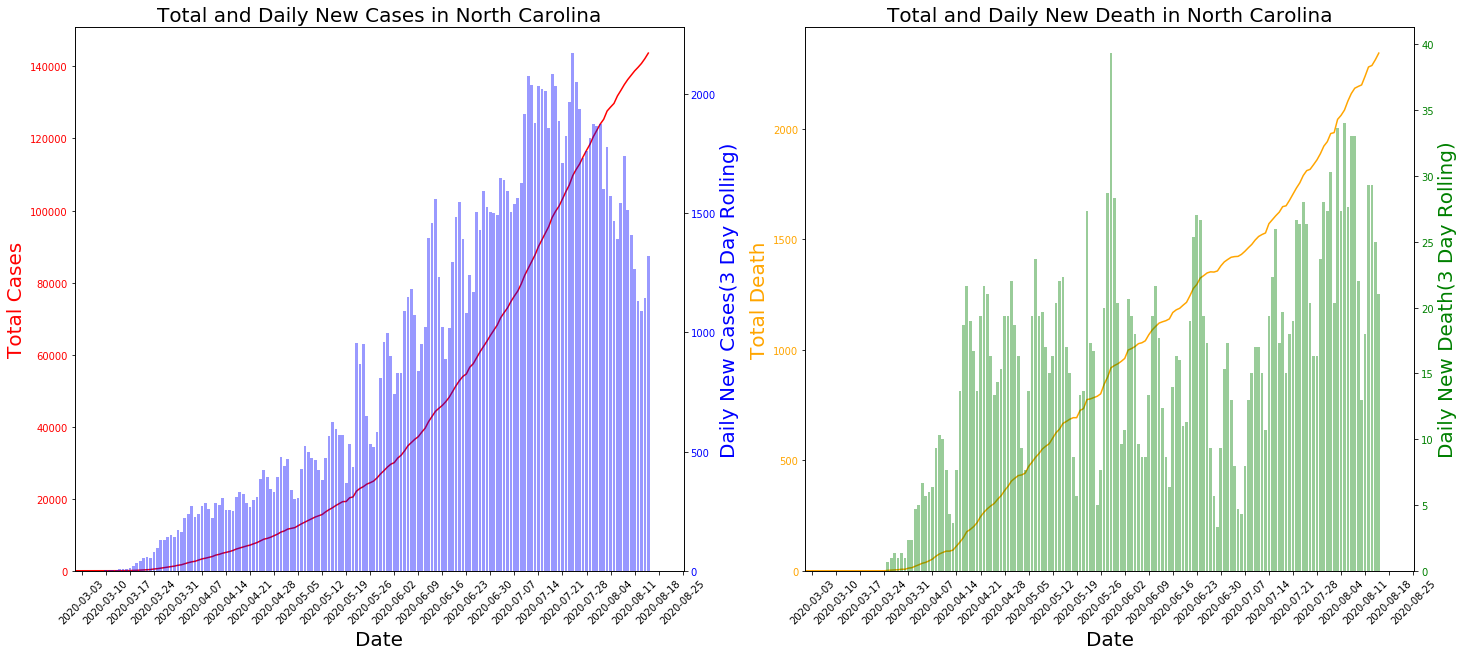

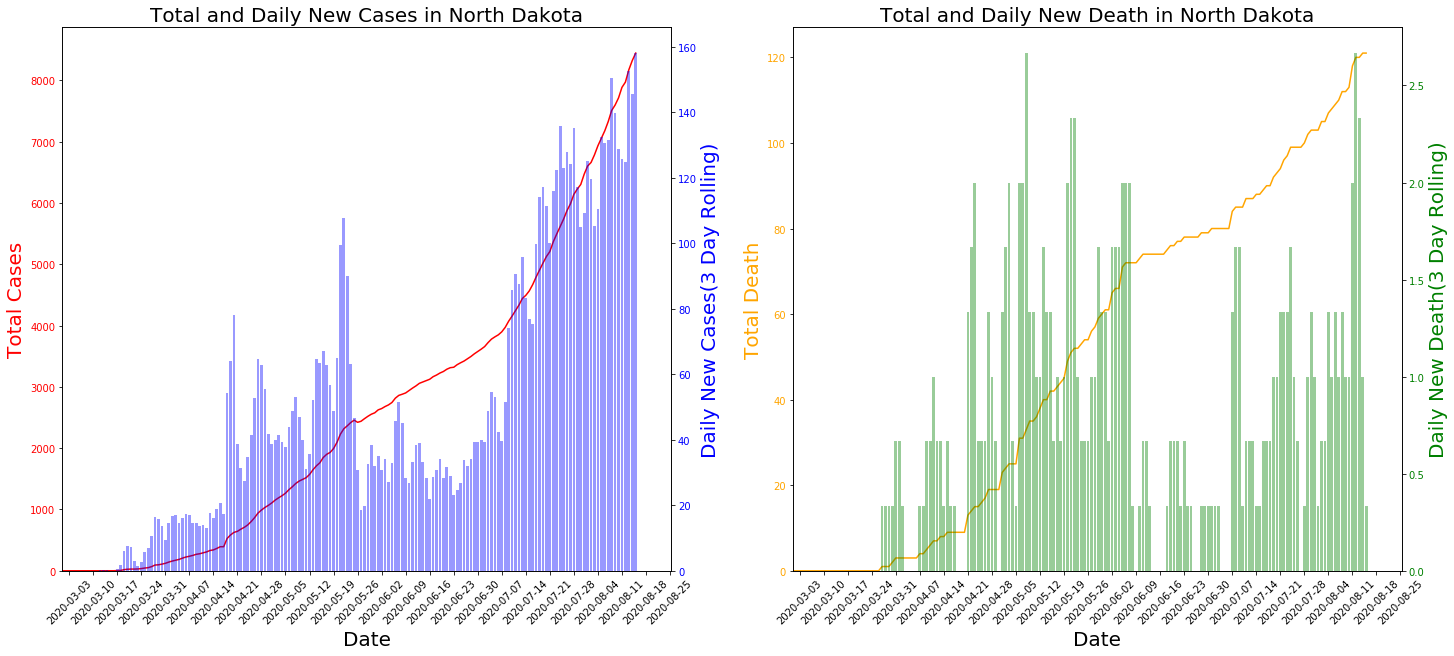

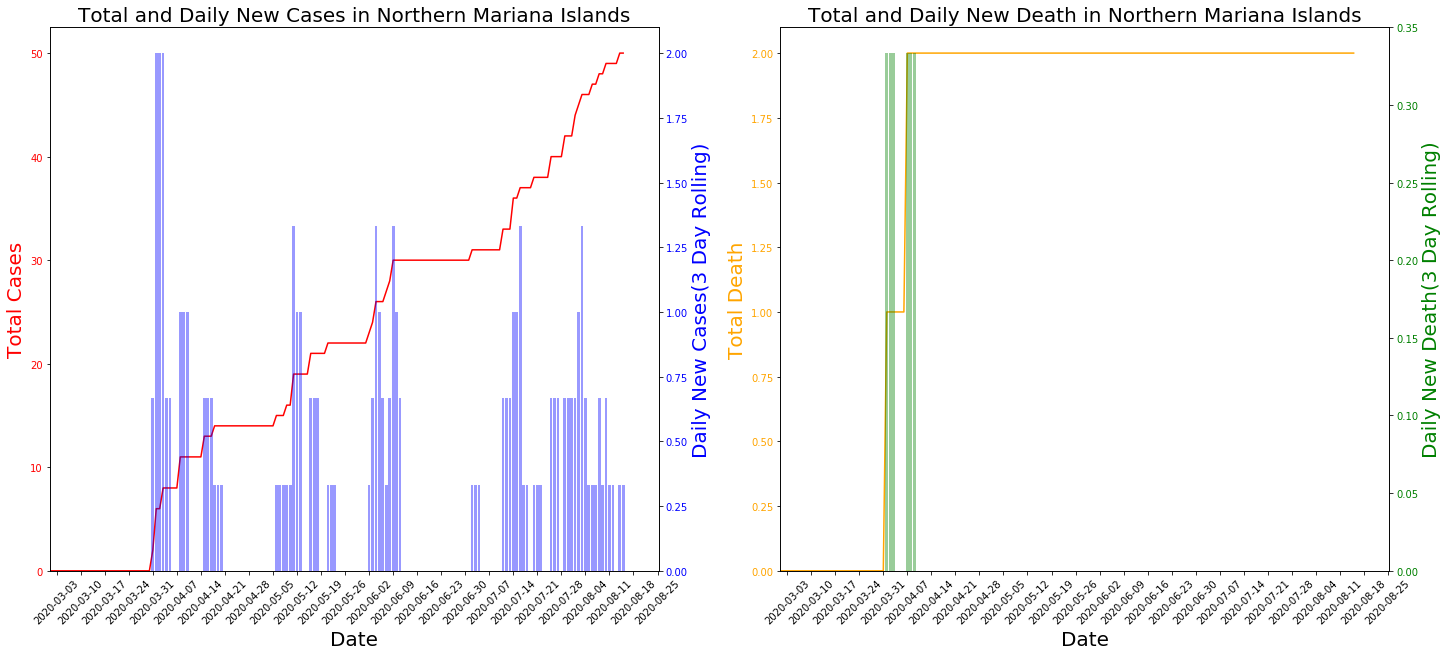

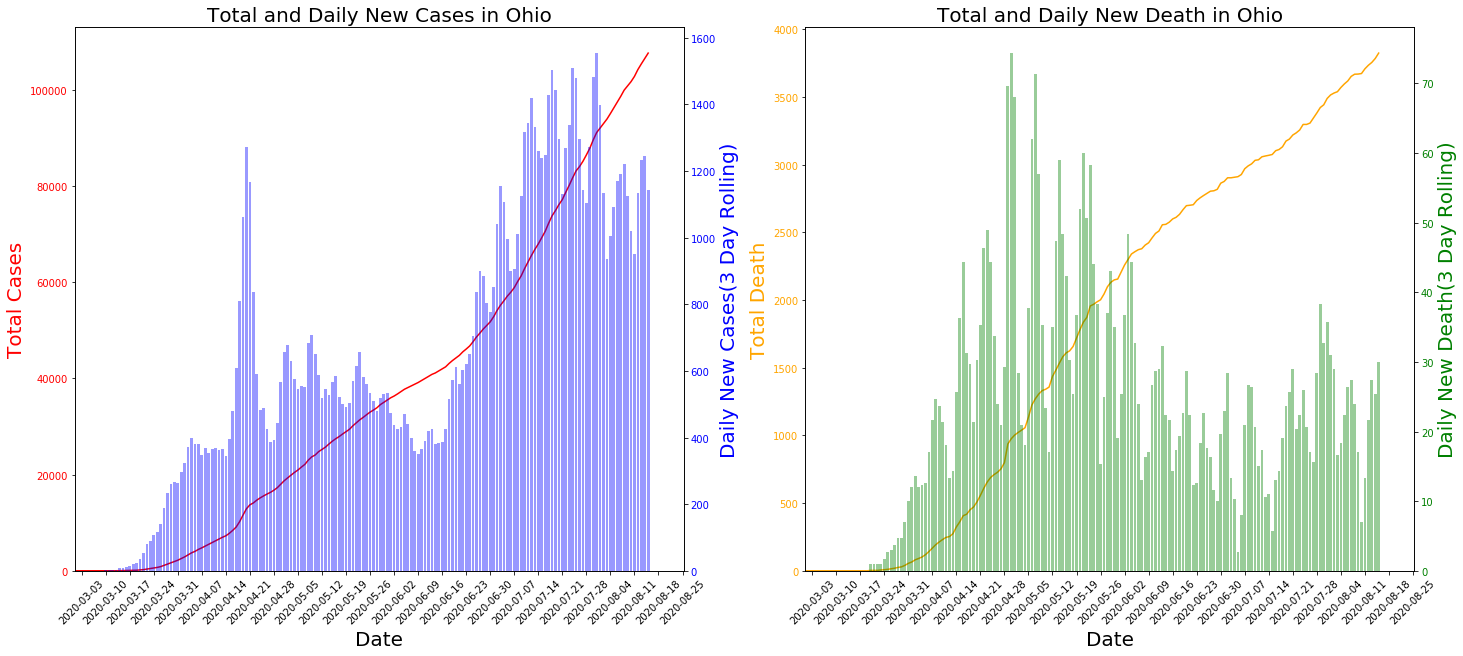

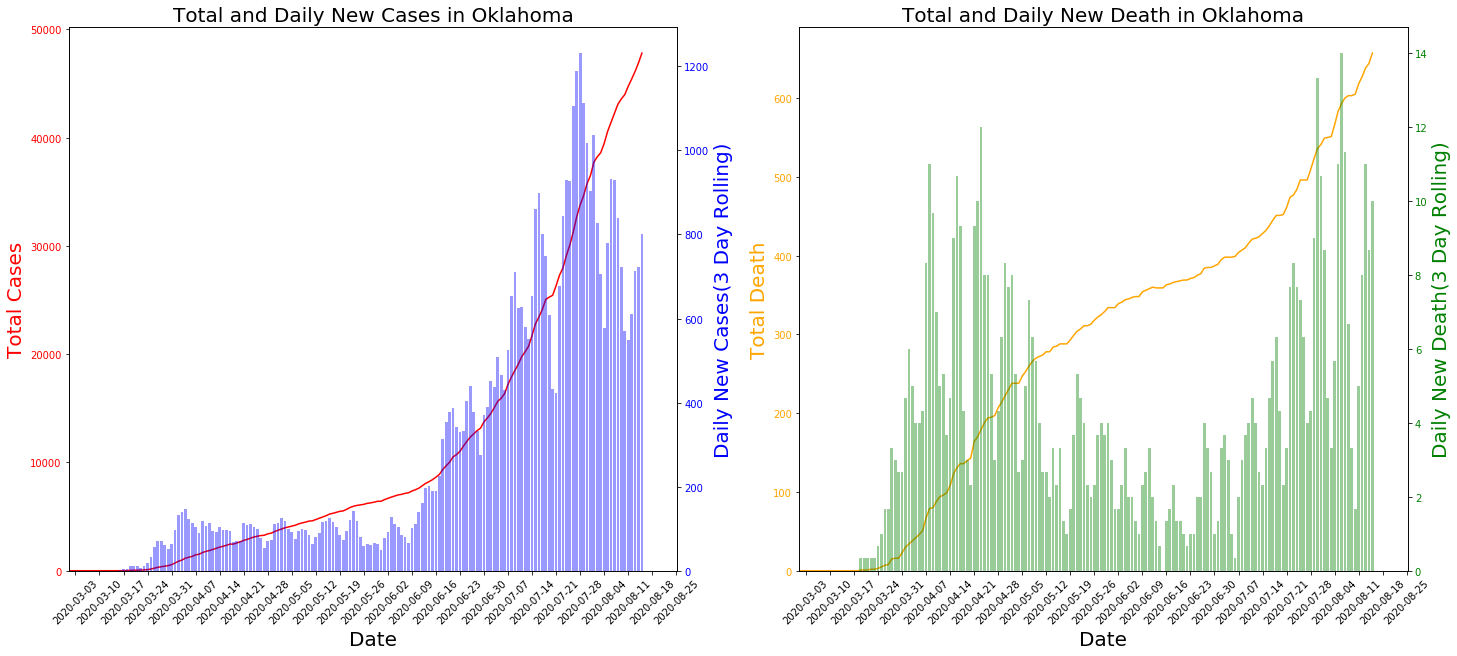

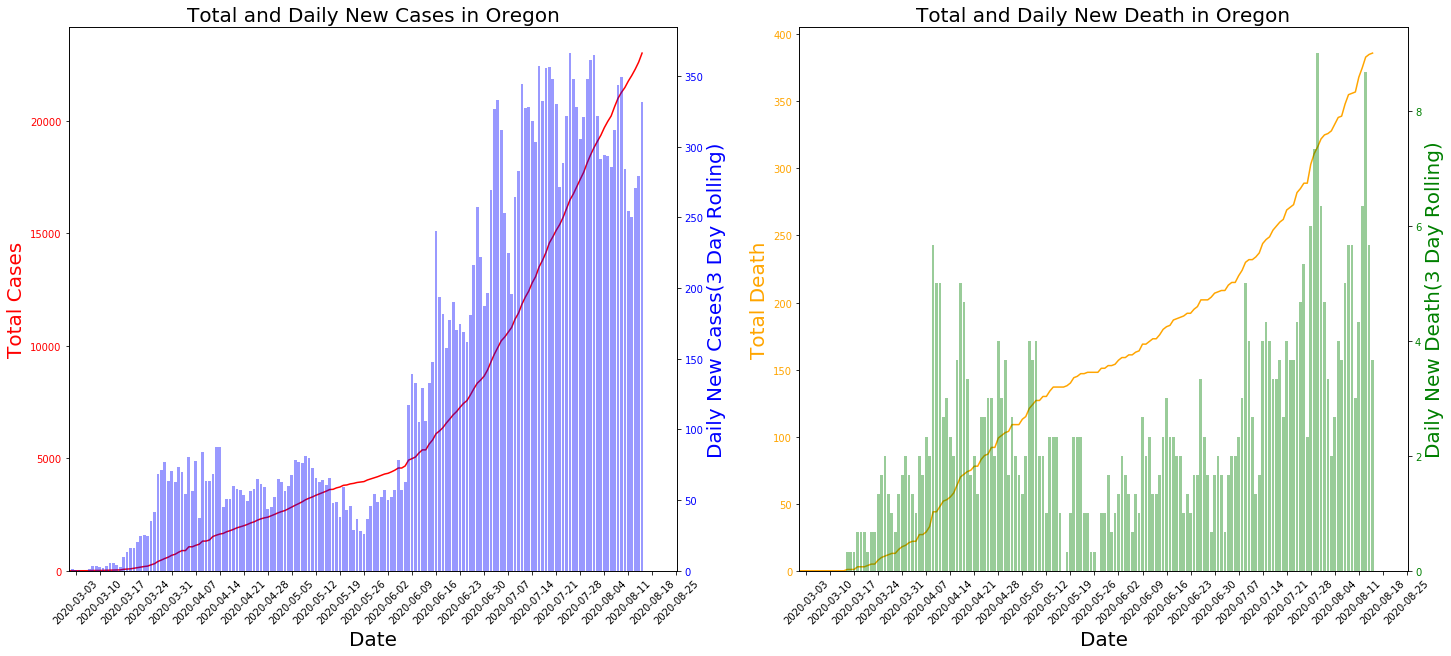

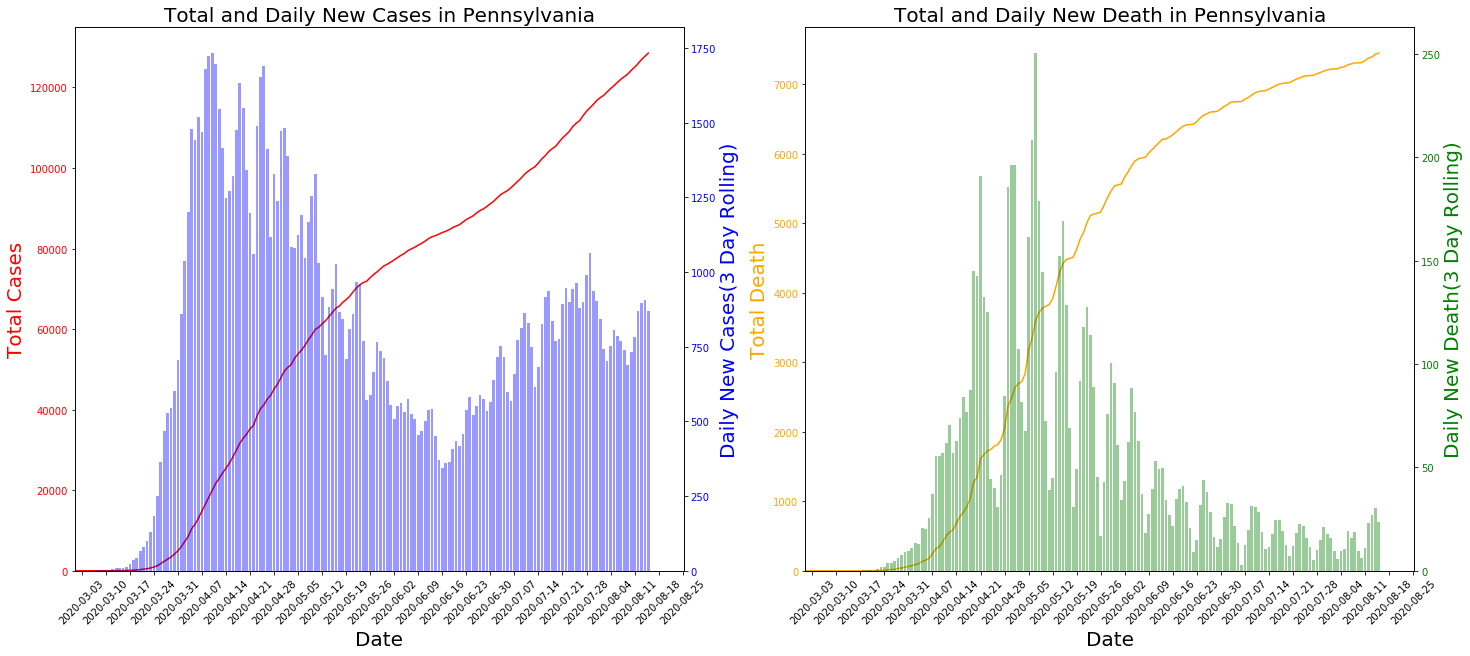

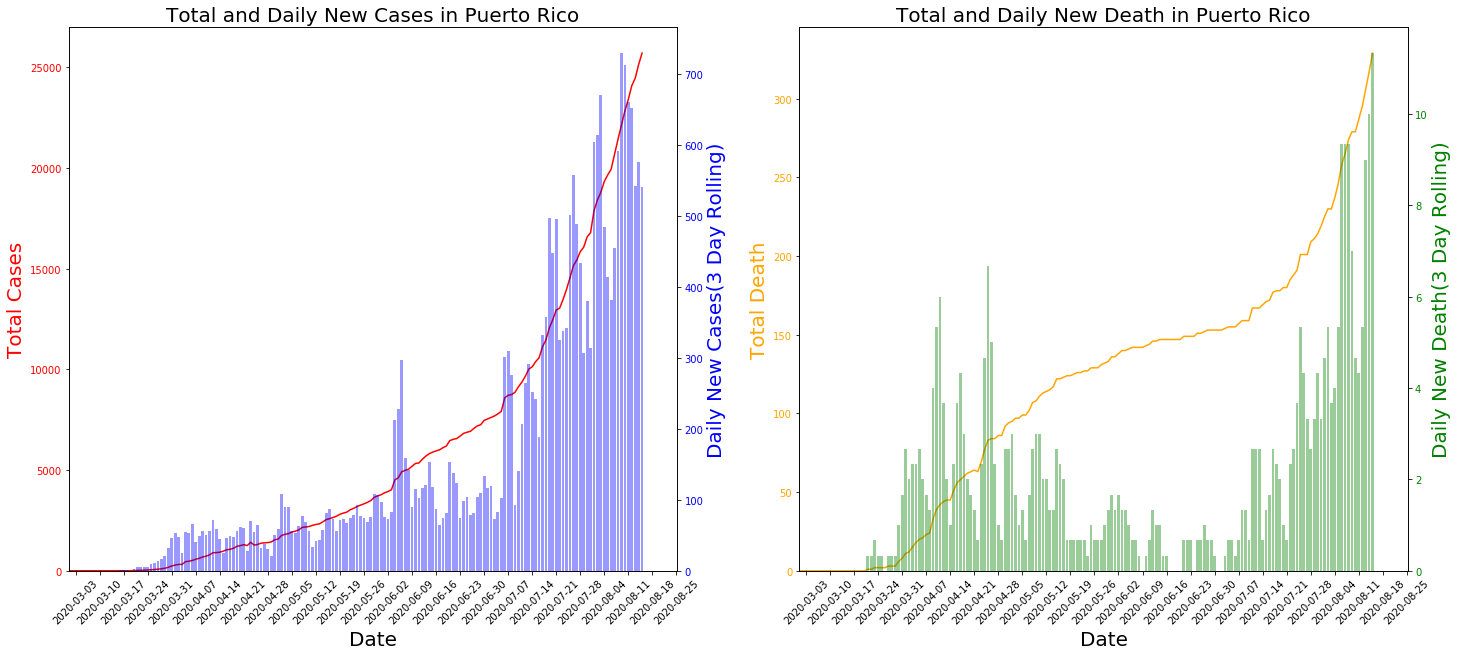

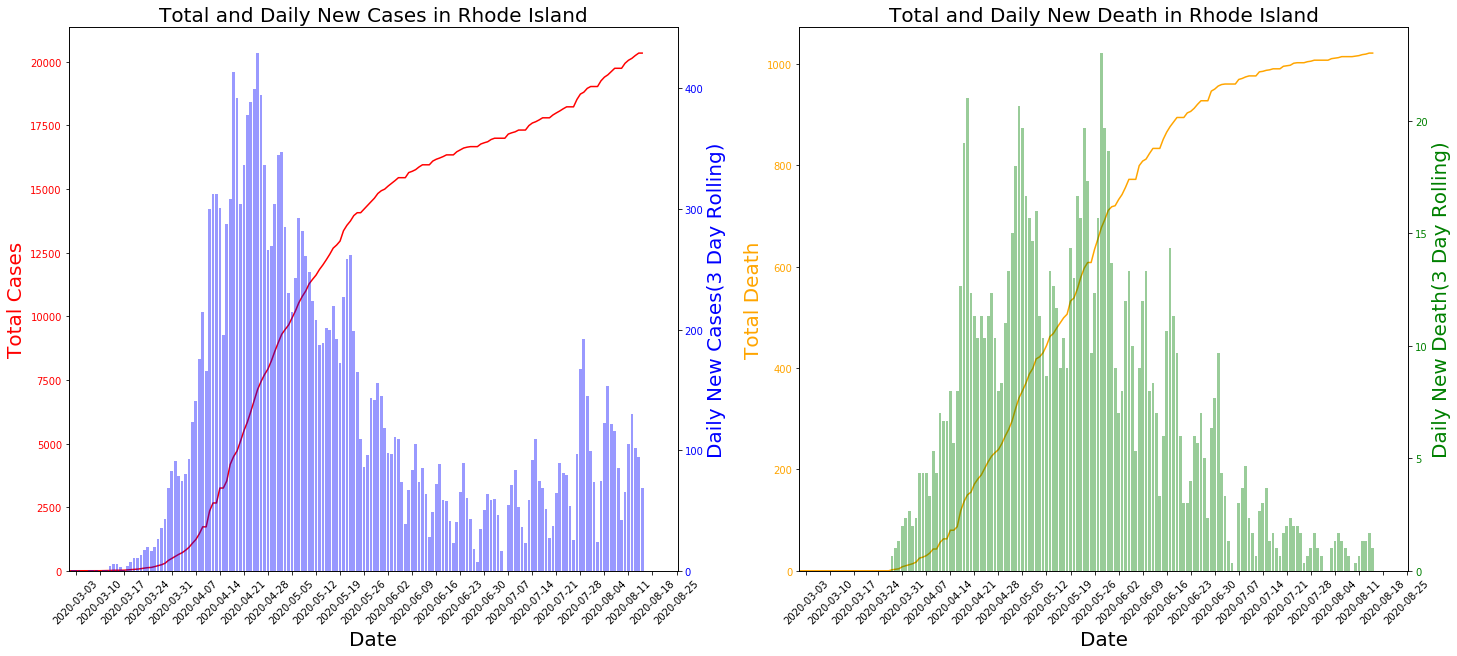

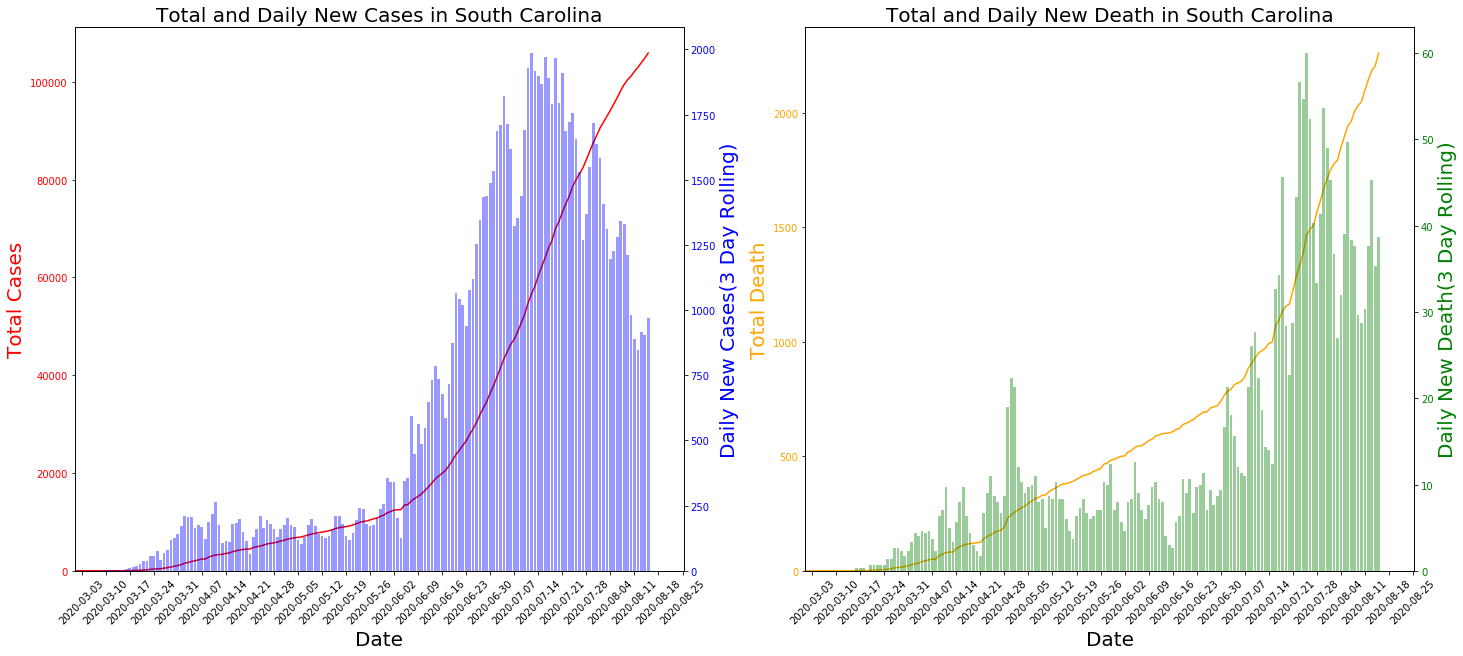

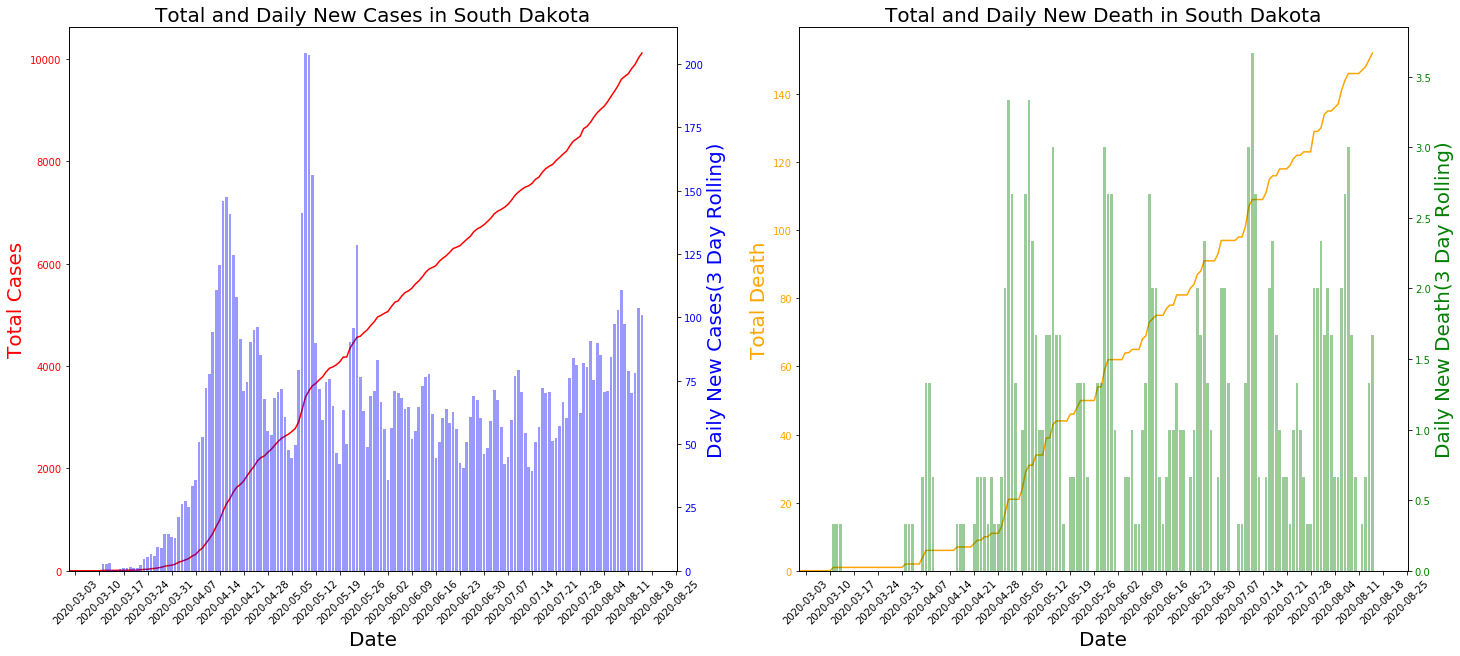

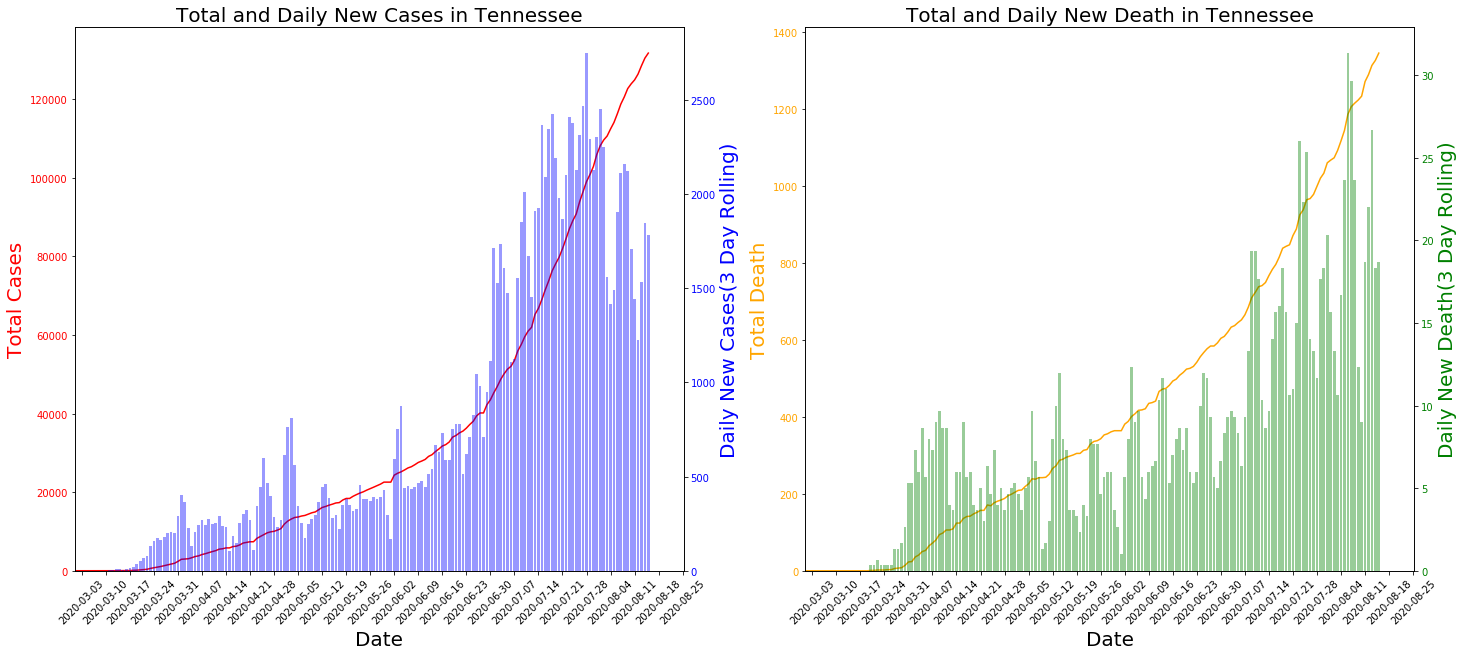

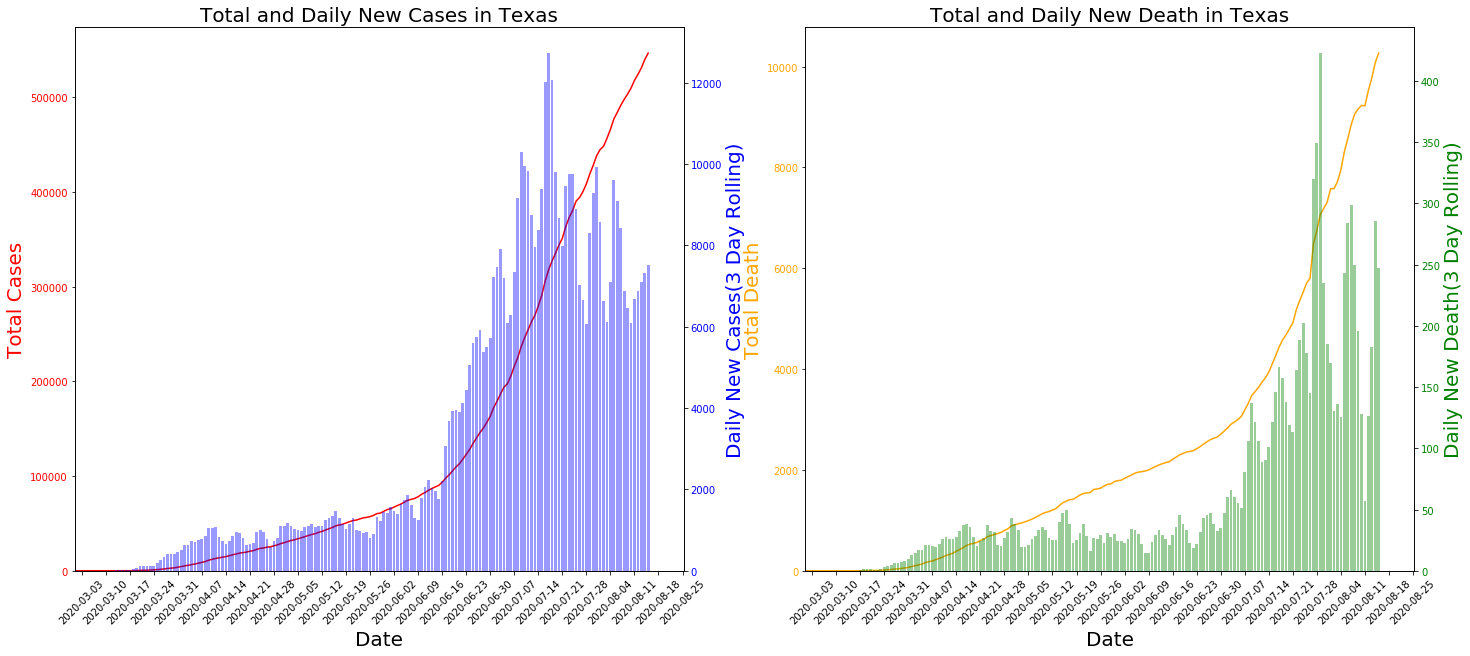

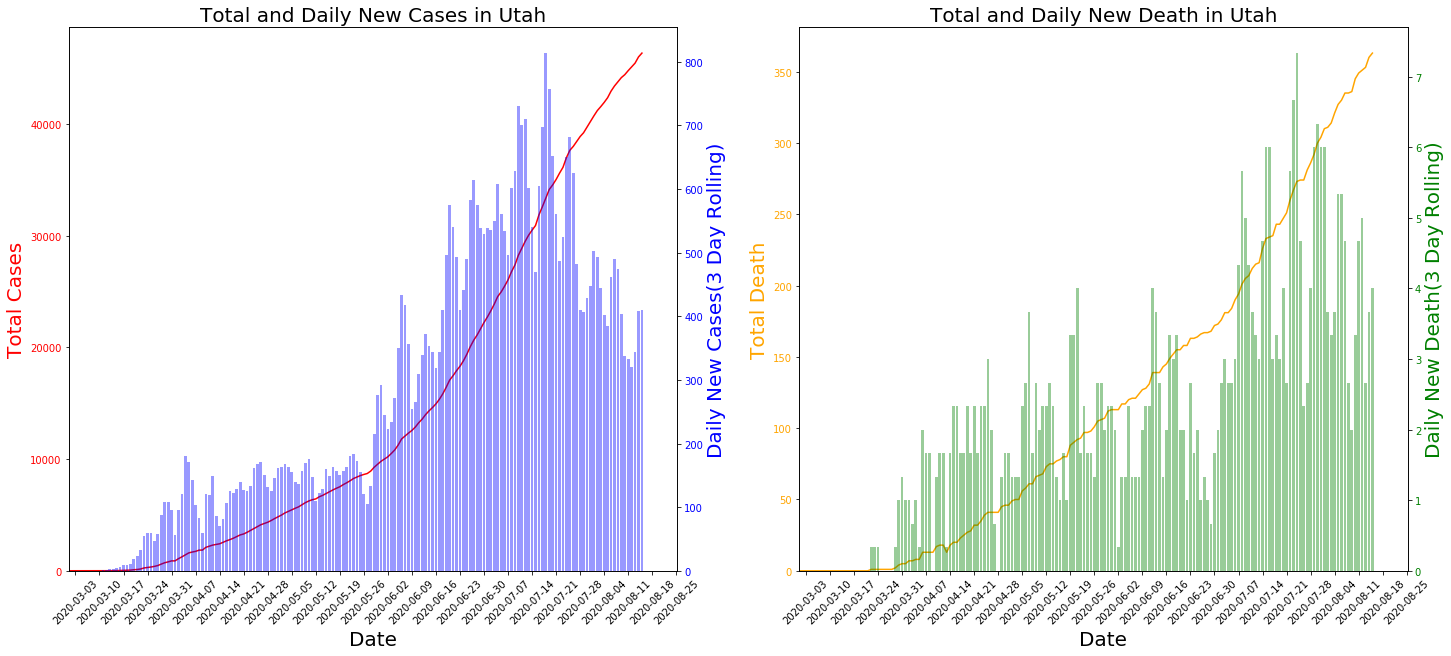

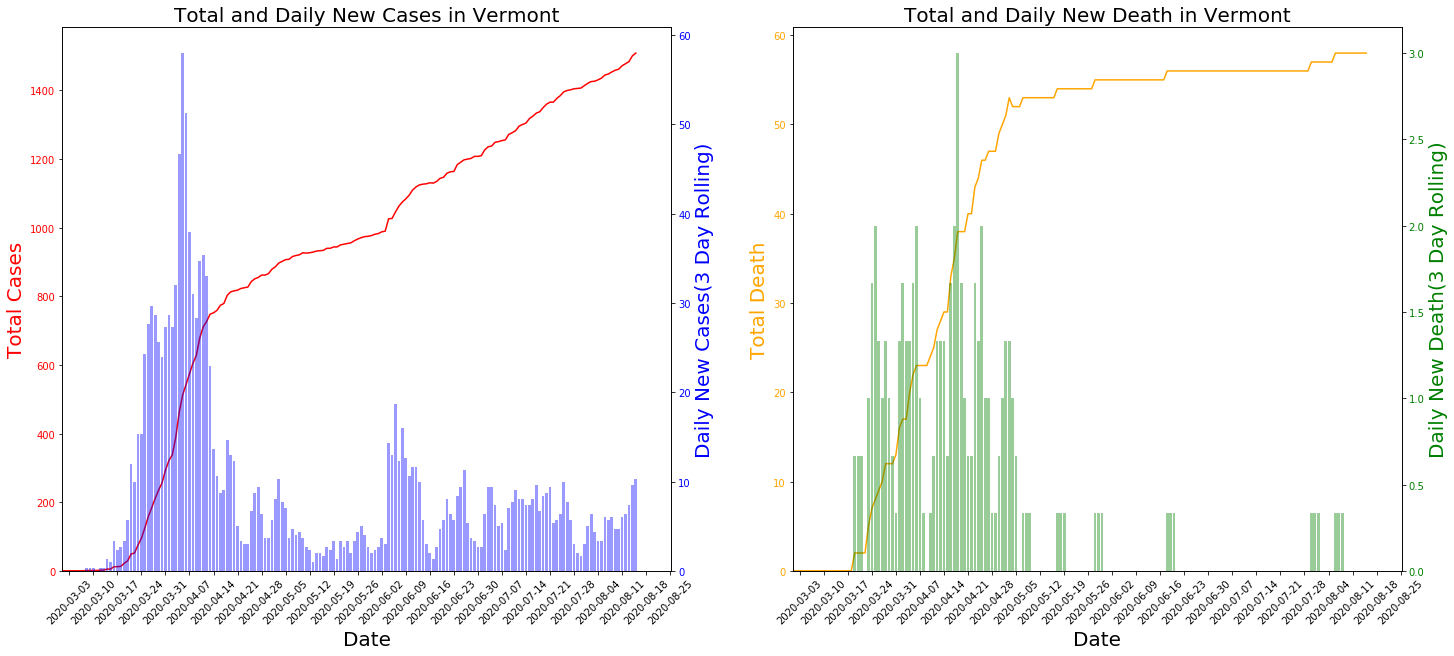

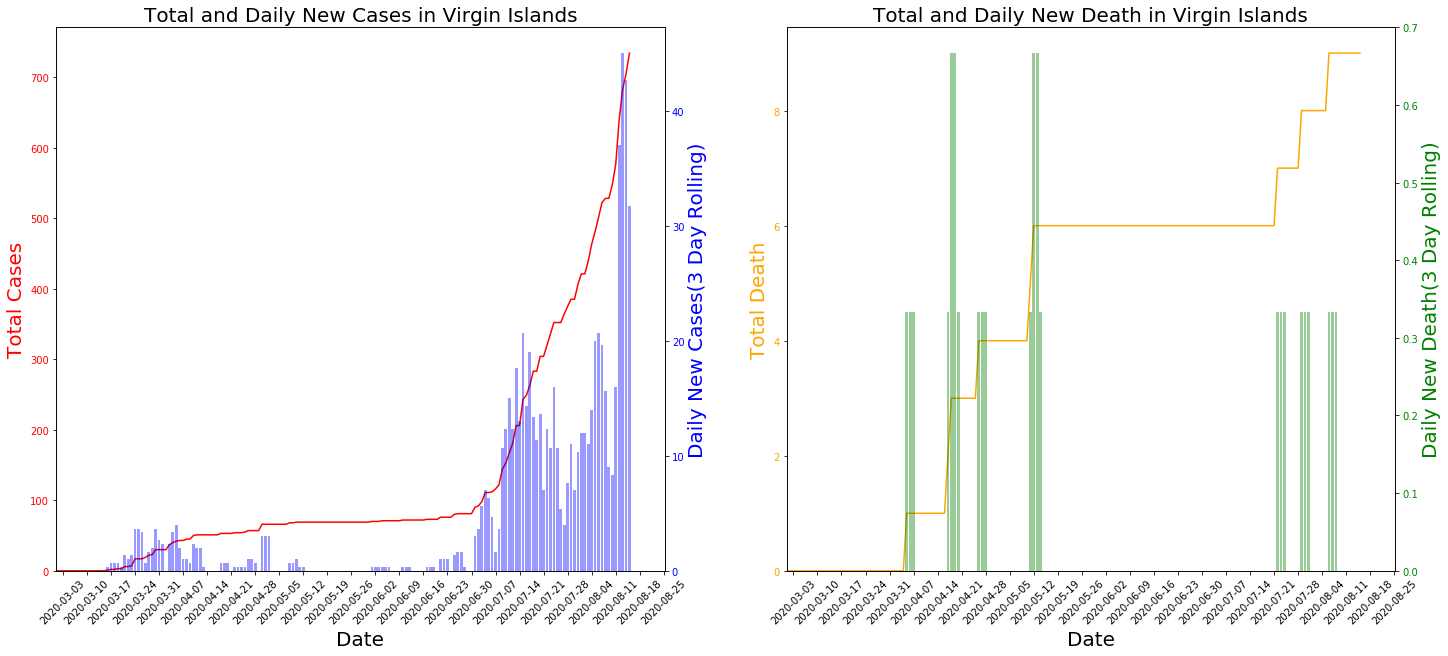

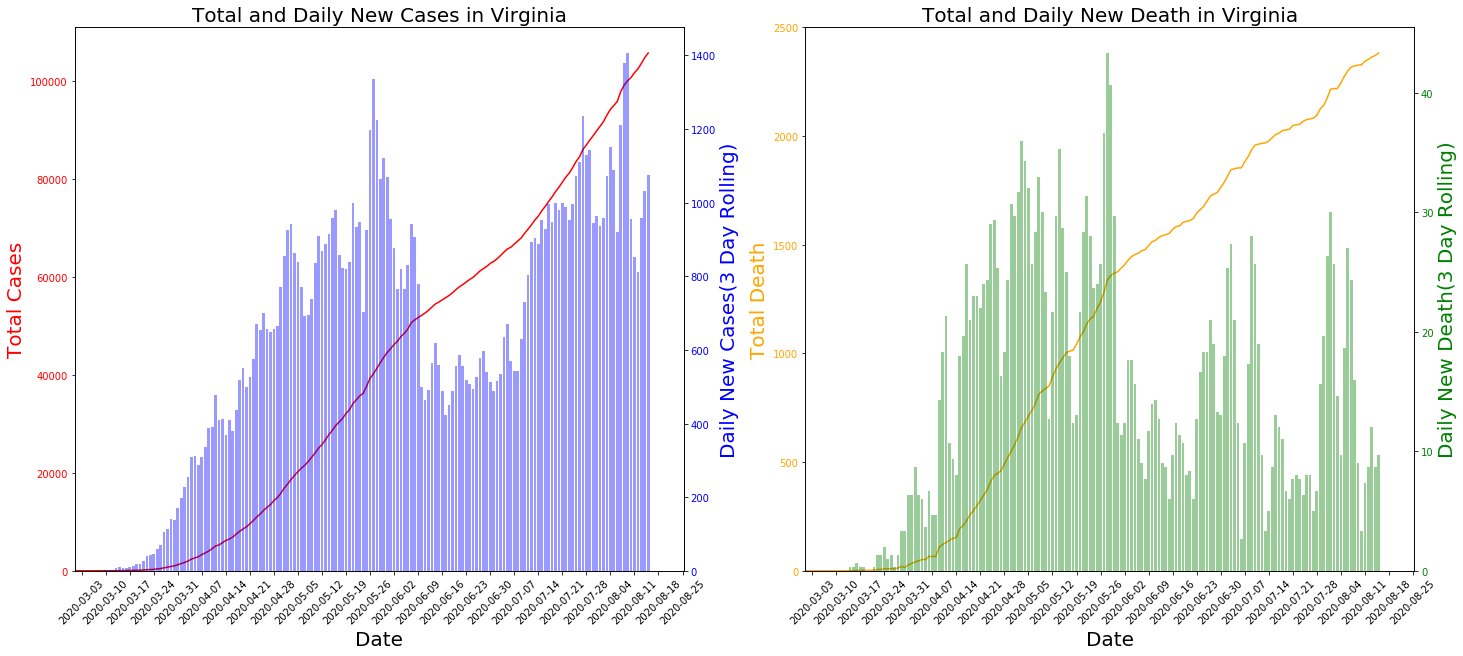

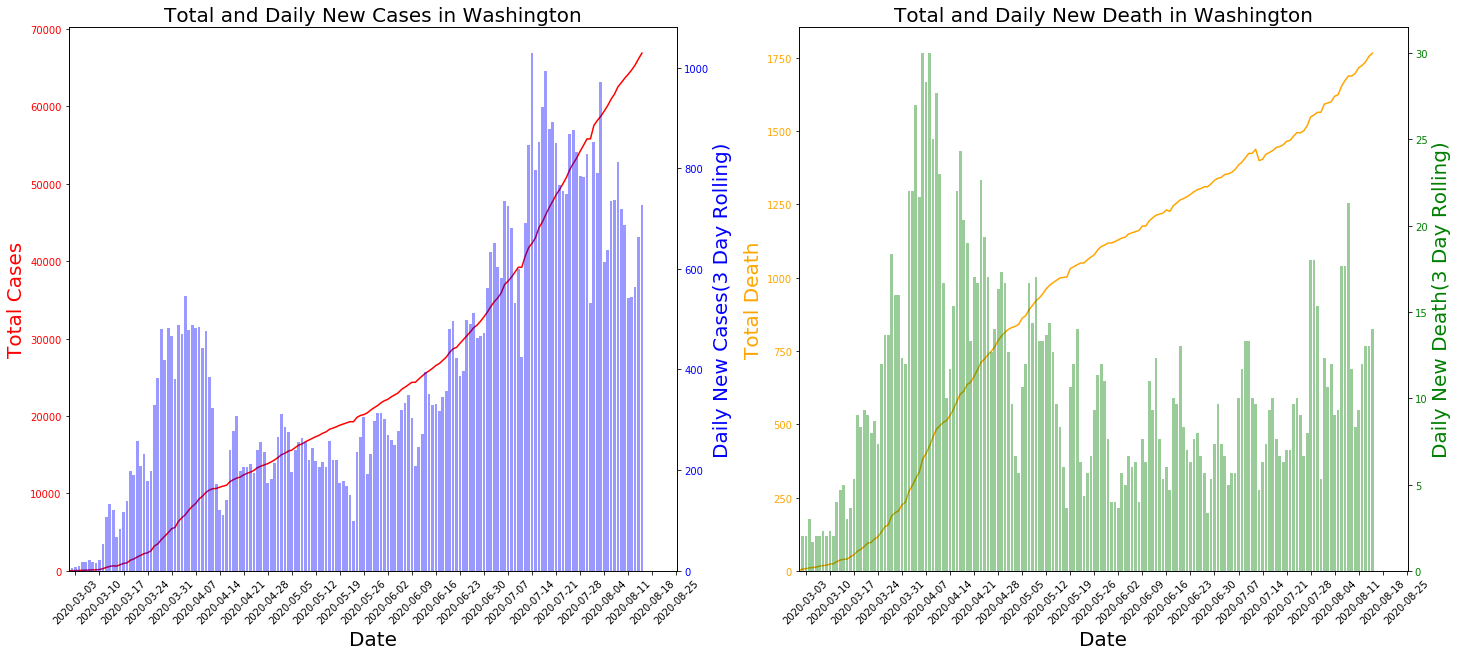

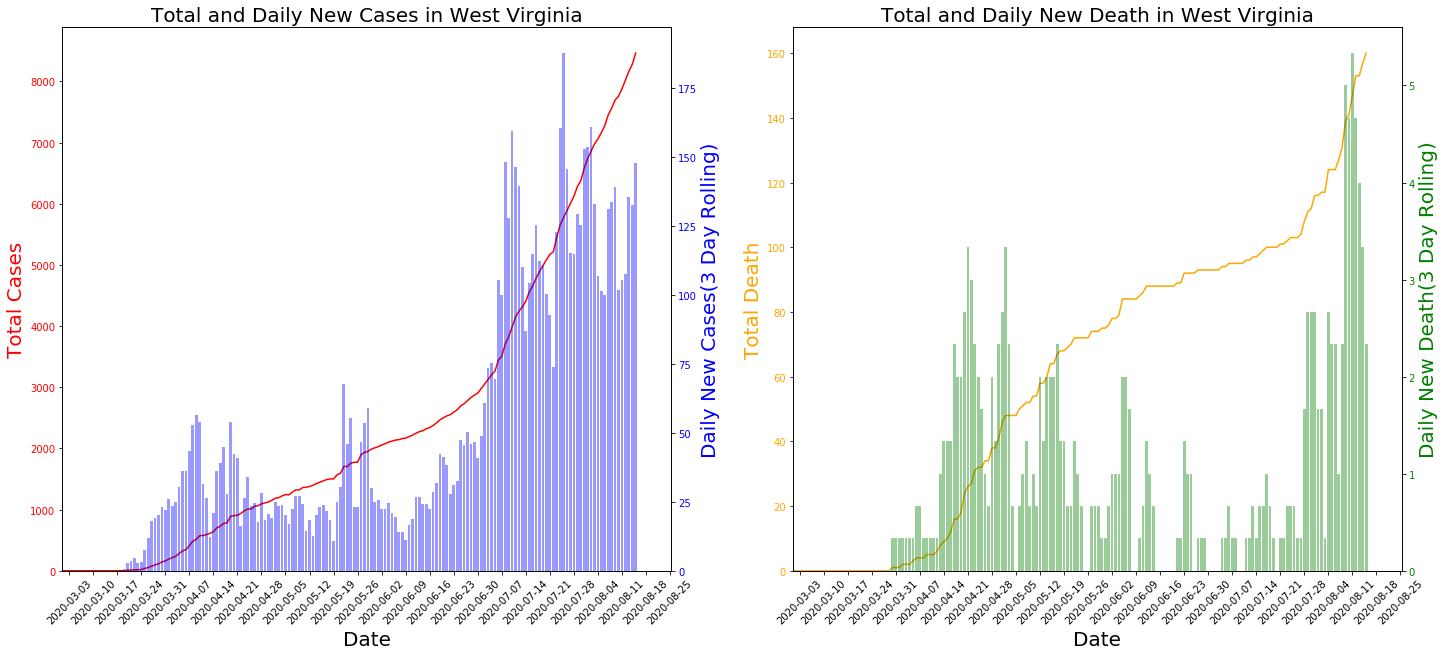

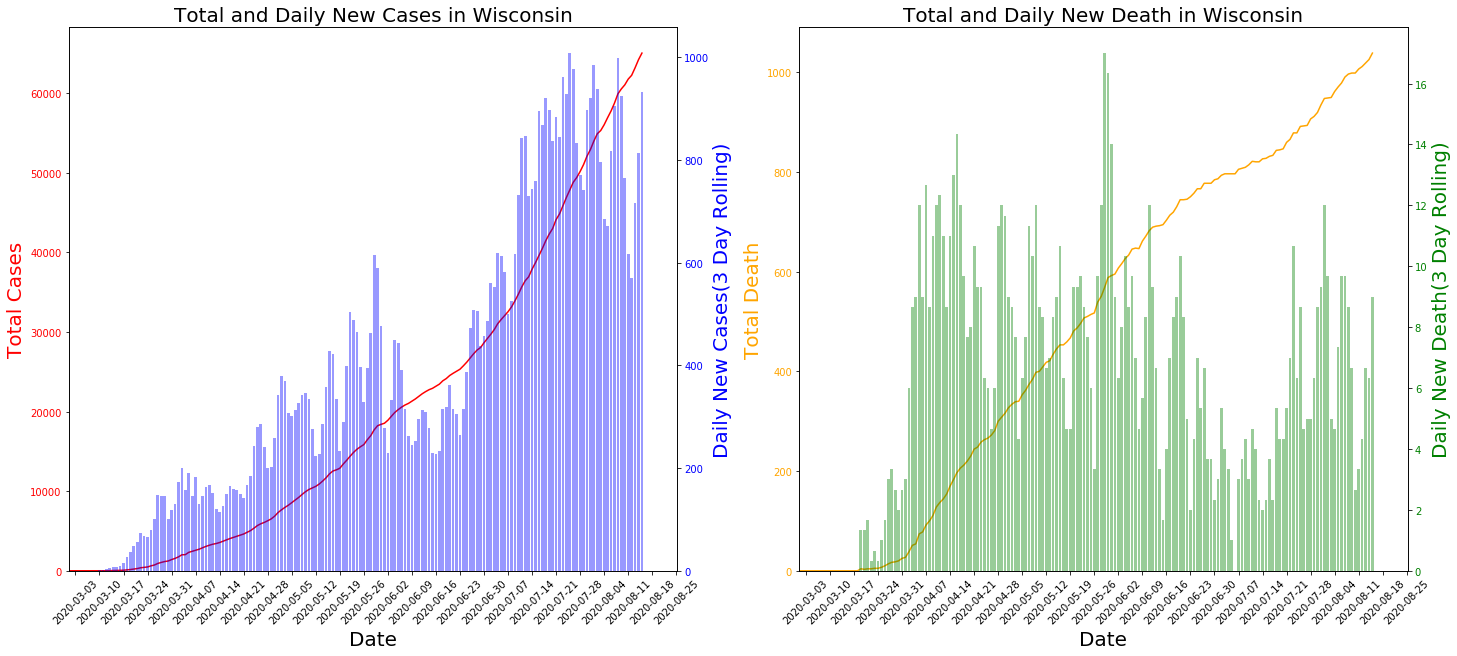

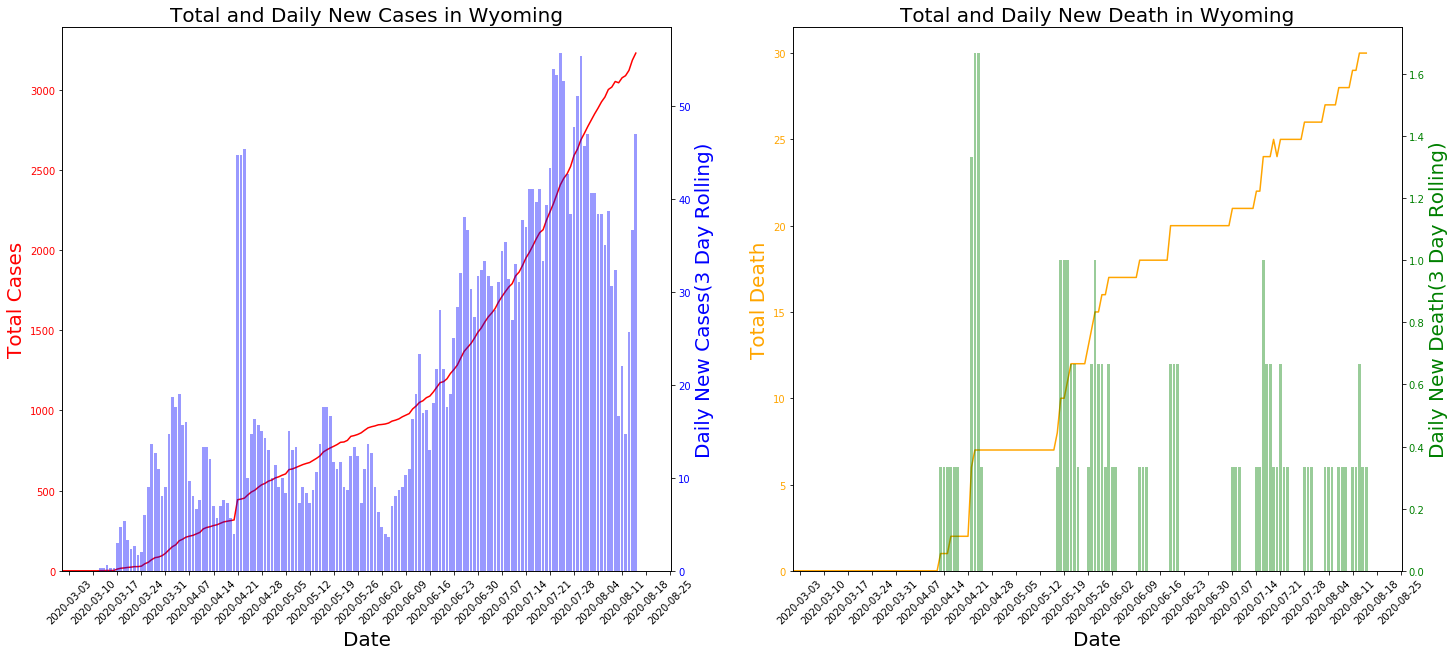

In [14]:
for state in states:
    
    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(24,10))
    ax2 = axs[0].twinx()
    ax3 = axs[1].twinx()
    axs[0].plot(data['%s' % state]['Date'], data['%s' % state]['Total Cases'], 'r-')
    axs[0].tick_params(axis = 'y', labelcolor='r')
    axs[0].tick_params(axis = 'x', labelrotation = 45)
    axs[0].set_xlim(datetime.date(2020, 3, 1))
    axs[0].set_ylim(0)
    axs[0].set_xlabel('Date',fontsize = 20)
    axs[0].set_ylabel('Total Cases', color='r',fontsize = 20)
    new_3d_rolling = data['%s' % state]['New Cases'].rolling(3).mean().fillna(0)
    ax2.bar(data['%s' % state]['Date'],new_3d_rolling, color = 'b', alpha= 0.4)
    ax2.tick_params(axis = 'y',labelcolor='b')
    ax2.set_ylabel('Daily New Cases(3 Day Rolling)', color='b',fontsize = 20)
    
    axs[0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    axs[0].set_title('Total and Daily New Cases in %s' %state,fontsize = 20)

    
    axs[1].plot(data['%s' % state]['Date'], data['%s' % state]['Total Death'], '-',color = 'orange')
    axs[1].tick_params(axis = 'y', labelcolor='orange')
    axs[1].tick_params(axis = 'x', labelrotation = 45)
    axs[1].set_xlim(datetime.date(2020, 3, 1))
    axs[1].set_ylim(0)
    axs[1].set_xlabel('Date',fontsize = 20)
    axs[1].set_ylabel('Total Death', color='orange',fontsize = 20)
    death_3d_rolling = data['%s' % state]['New Death'].rolling(3).mean().fillna(0)
    ax3.bar(data['%s' % state]['Date'], death_3d_rolling, color = 'green', alpha= 0.4)
    ax3.tick_params(axis = 'y',labelcolor='green')
    ax3.set_ylabel('Daily New Death(3 Day Rolling)', color='green',fontsize = 20)
    
    axs[1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    axs[1].set_title('Total and Daily New Death in %s' %state,fontsize = 20)
    plt.show();

### Trends of Fatality Rate
- Total death as a percent of total cases

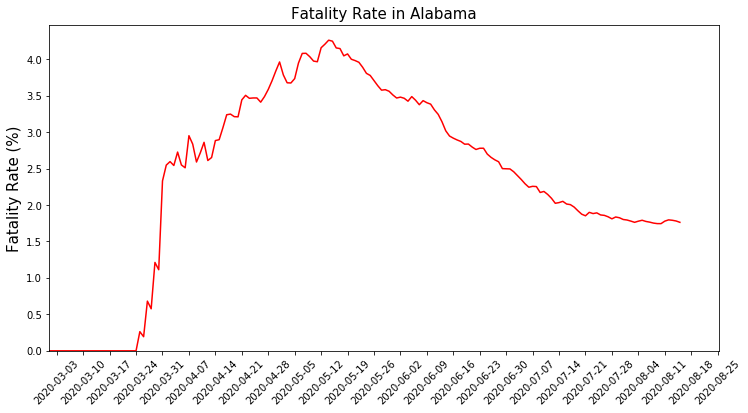

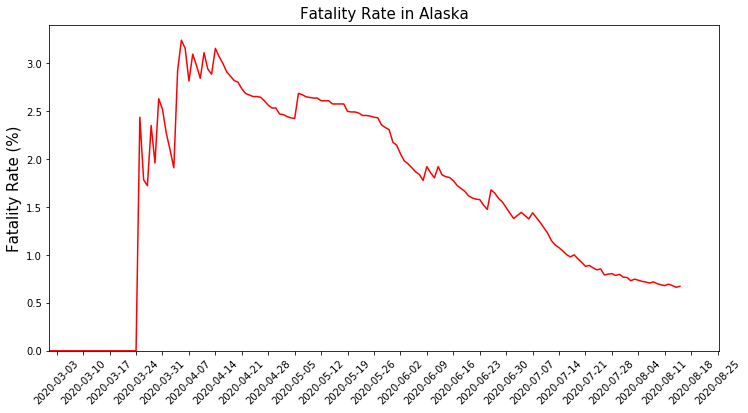

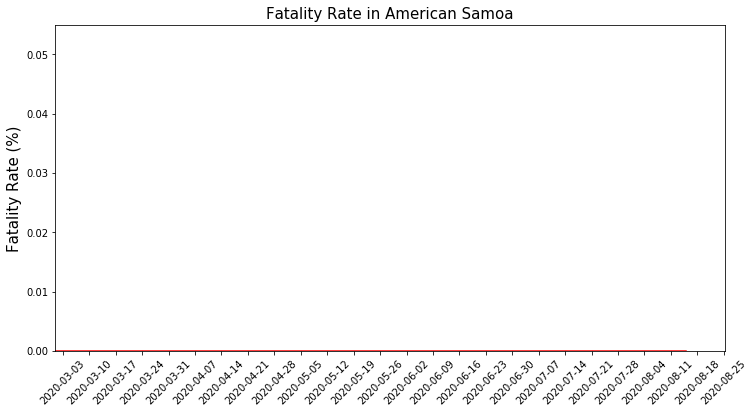

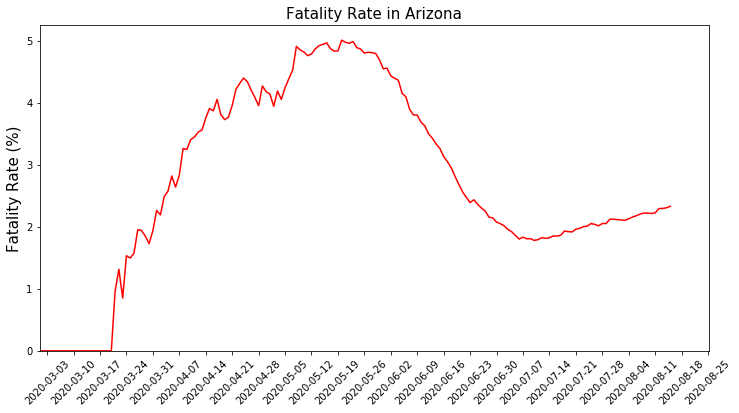

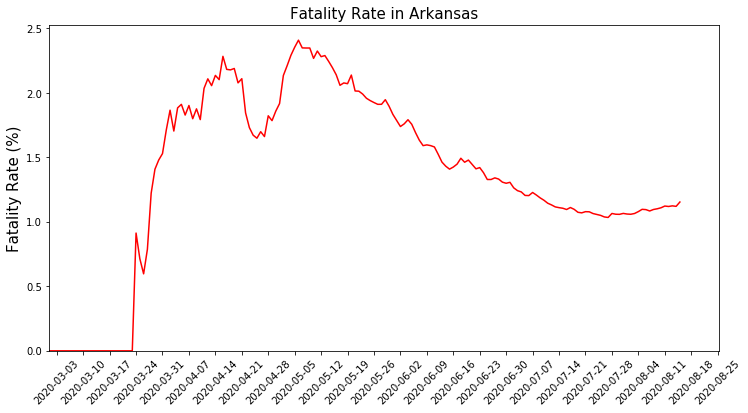

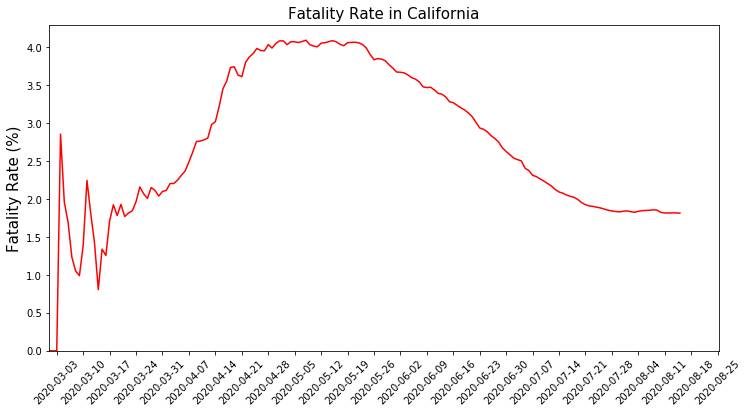

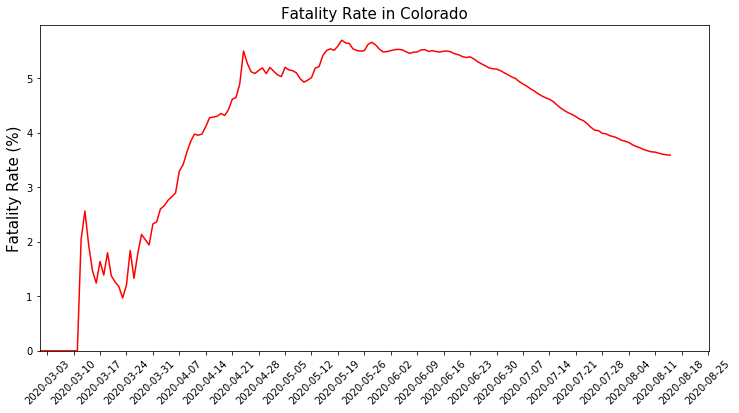

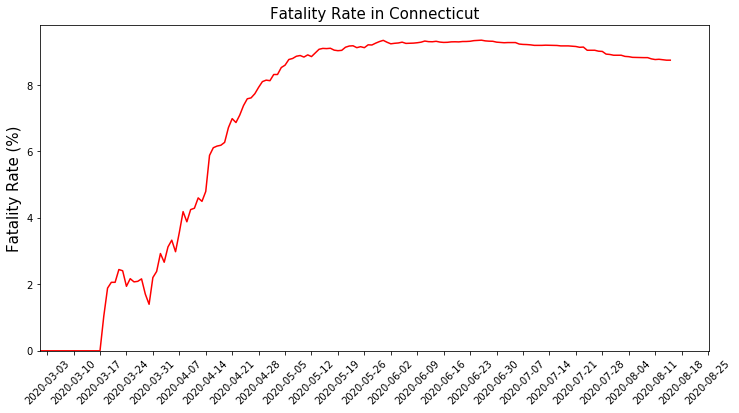

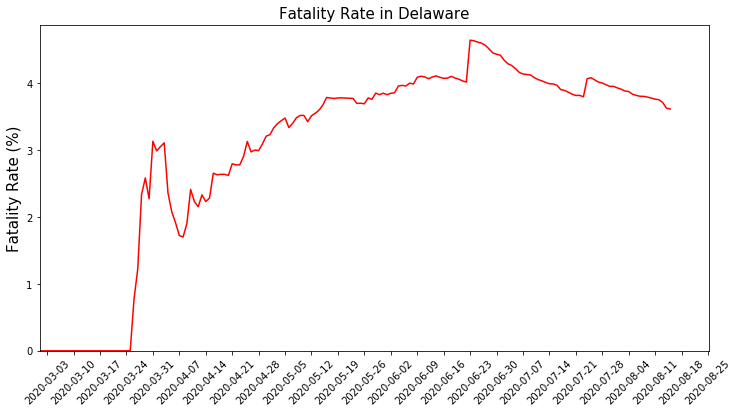

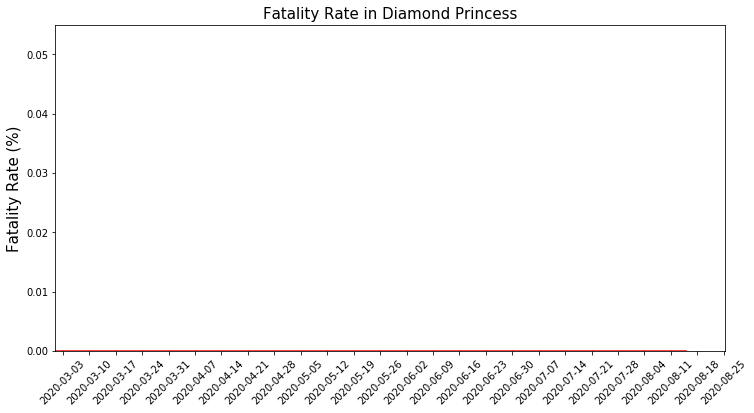

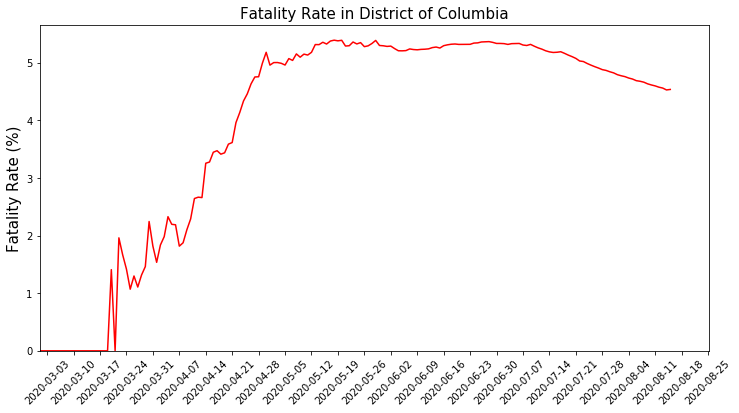

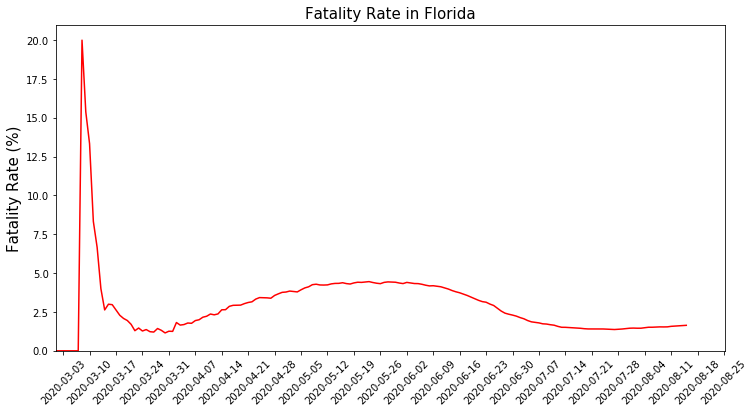

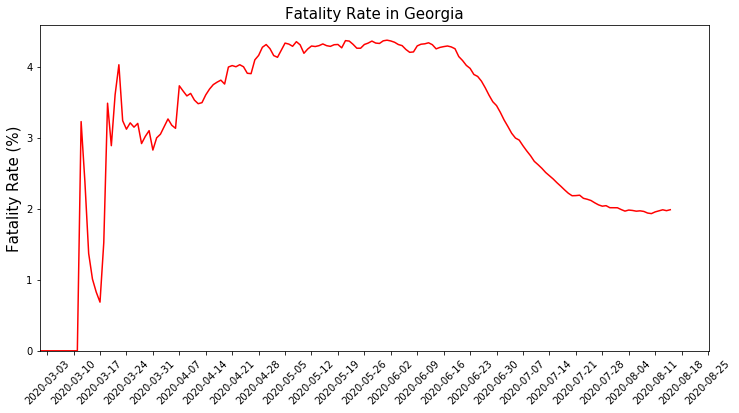

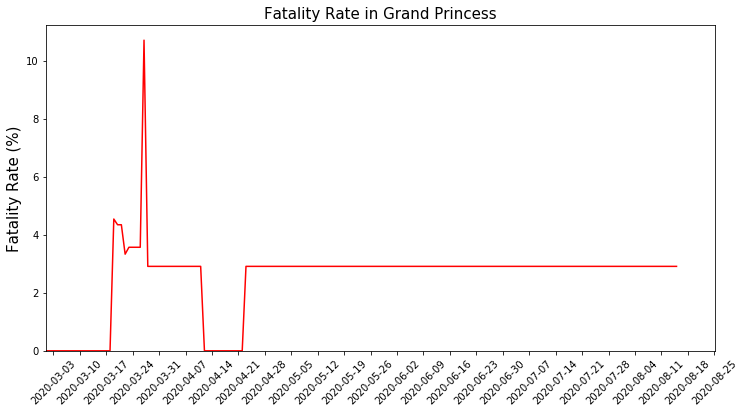

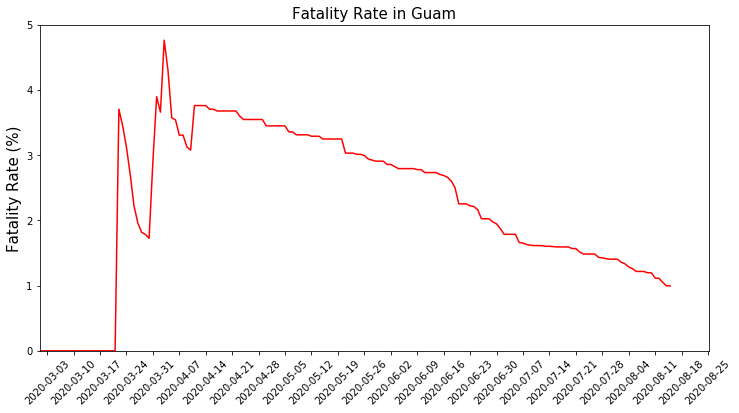

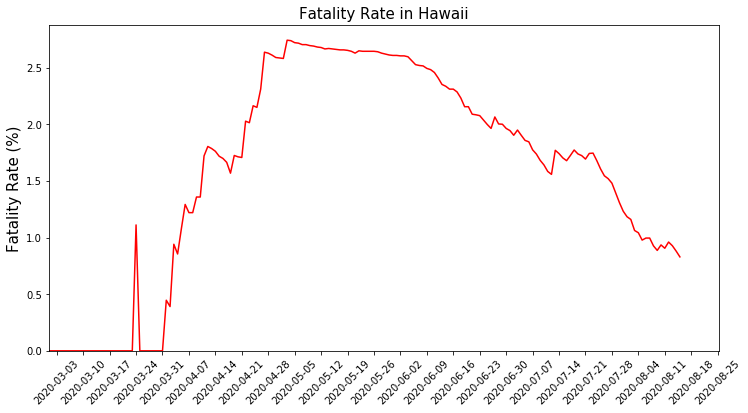

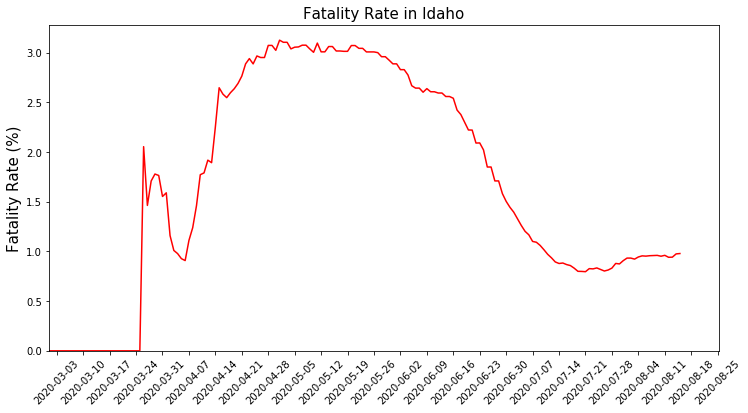

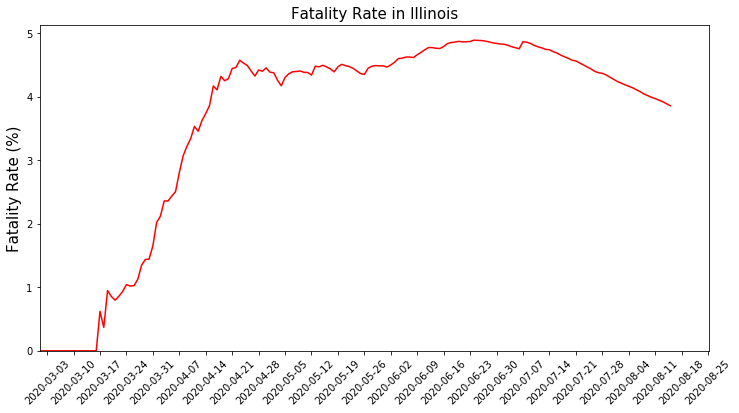

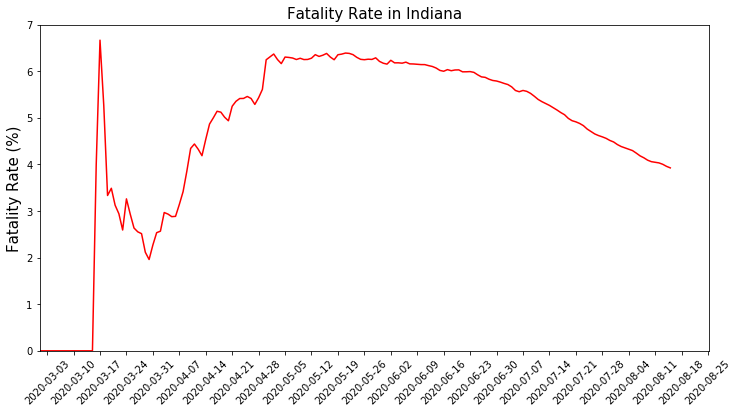

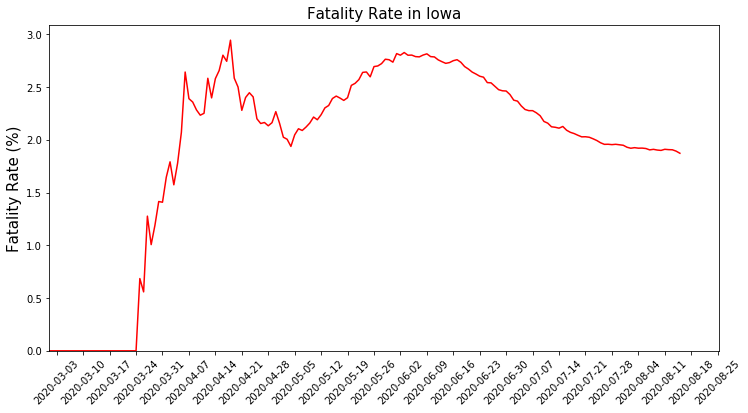

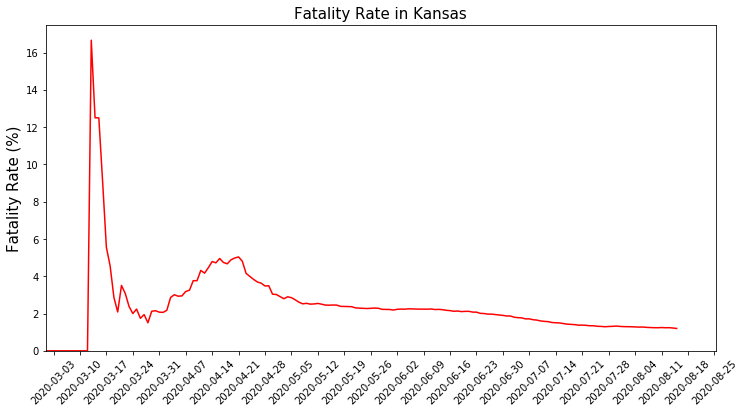

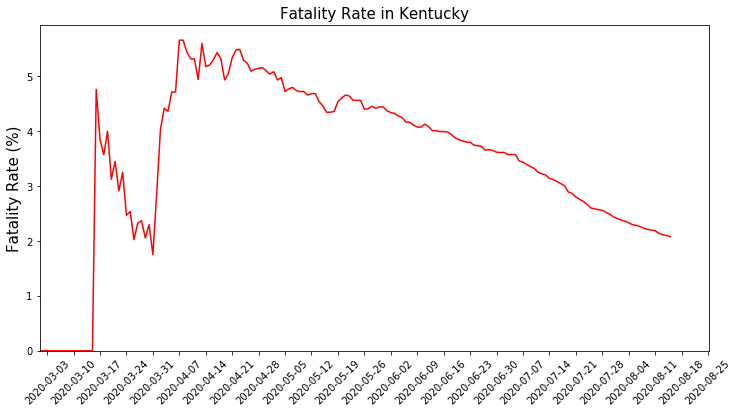

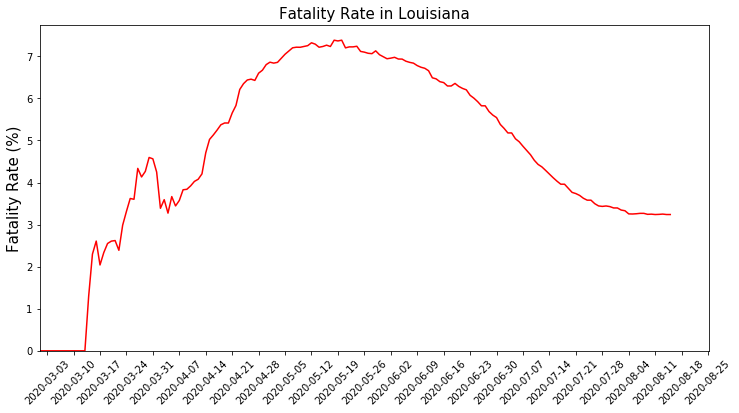

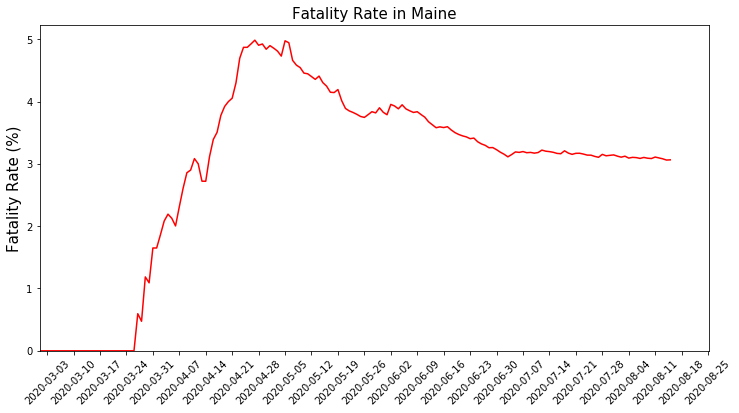

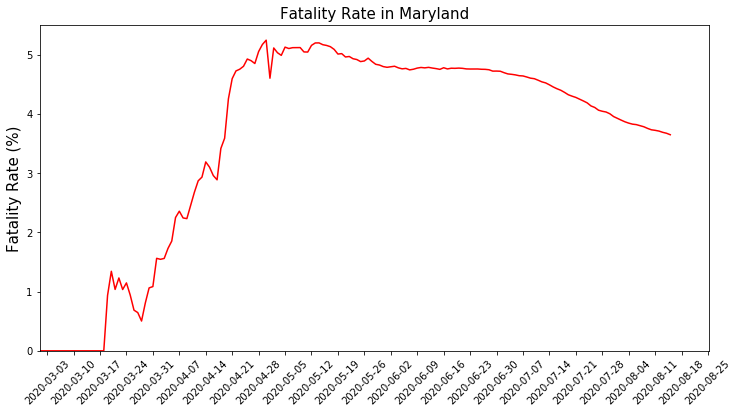

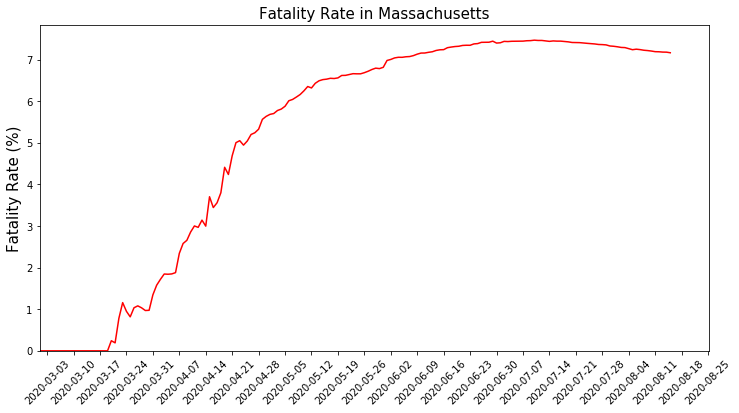

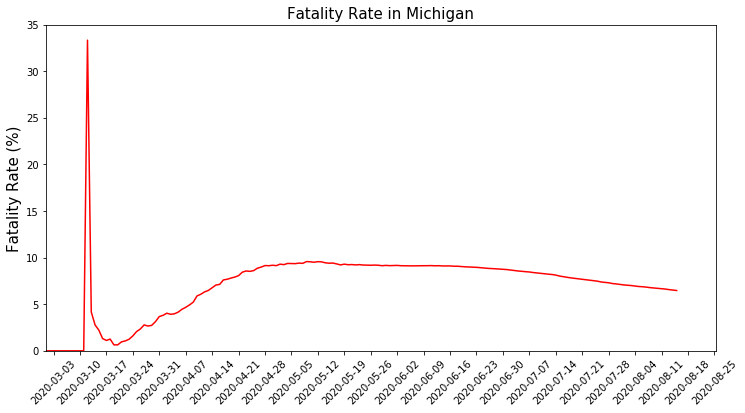

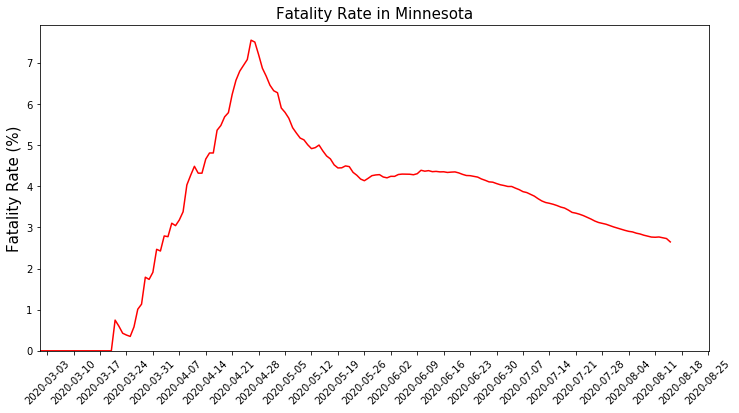

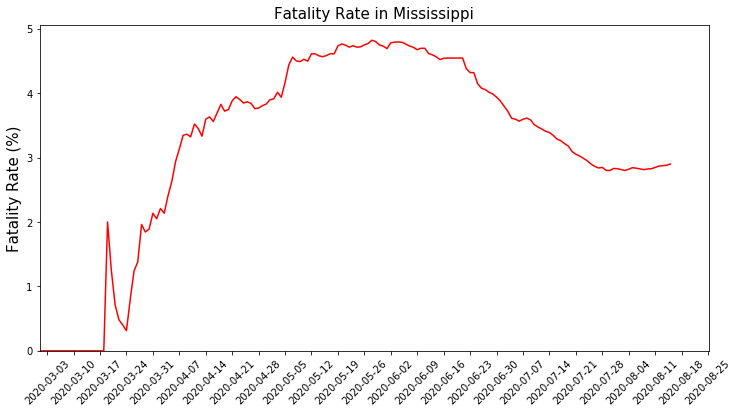

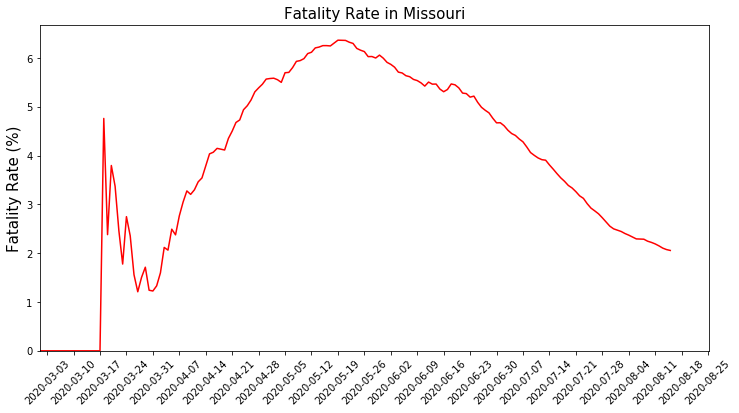

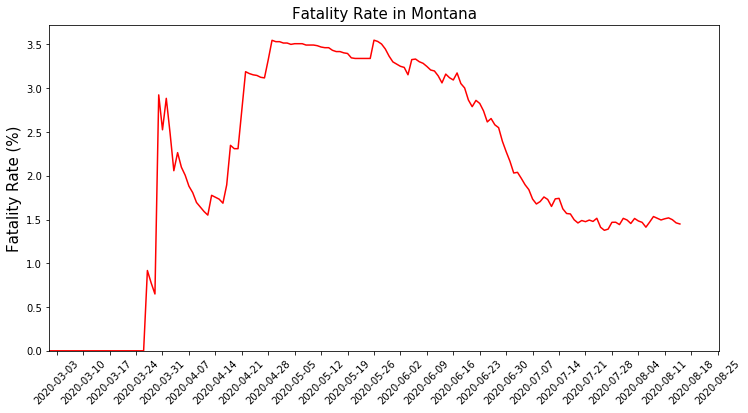

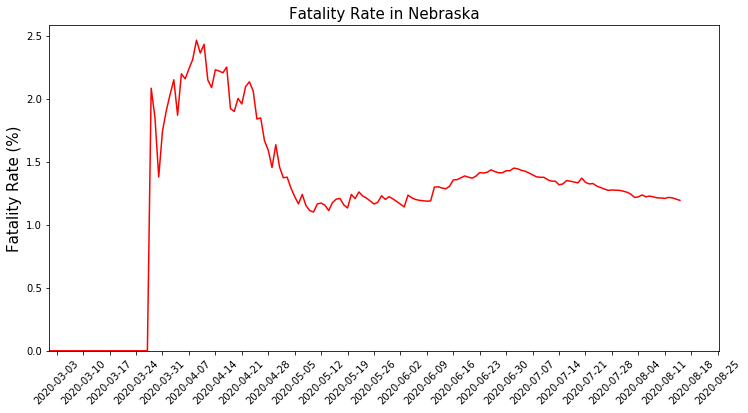

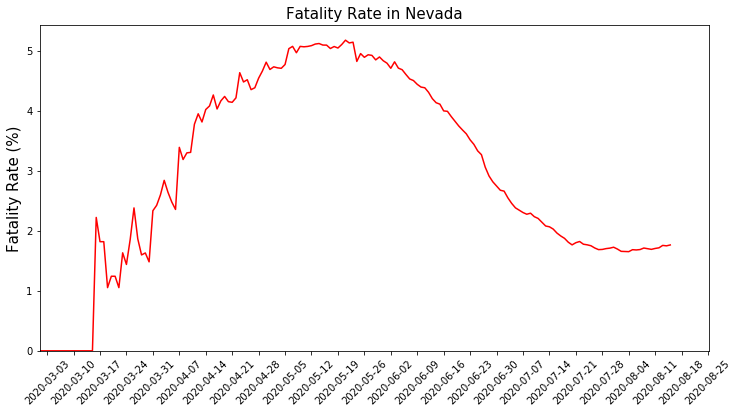

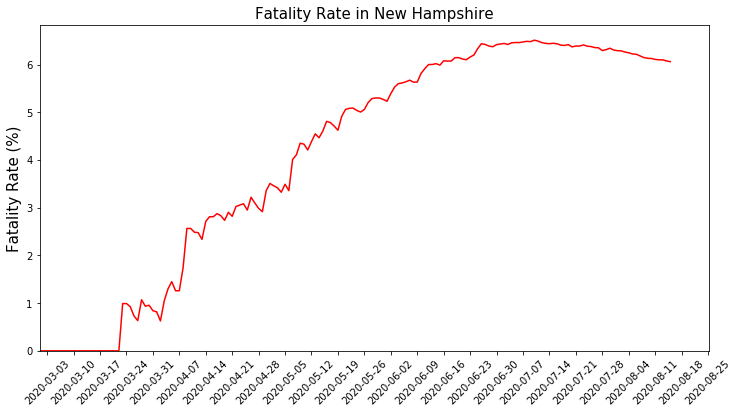

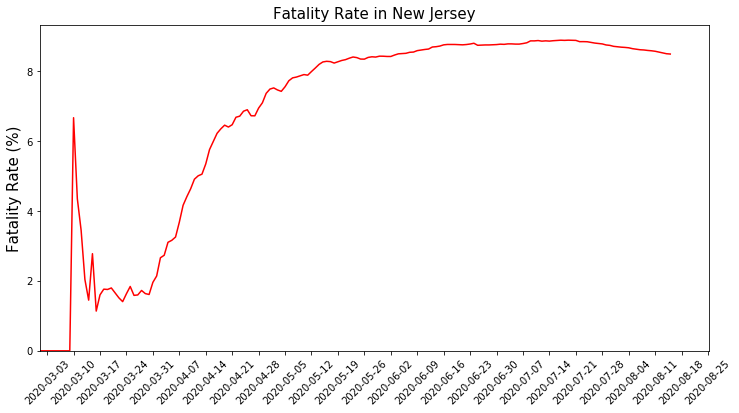

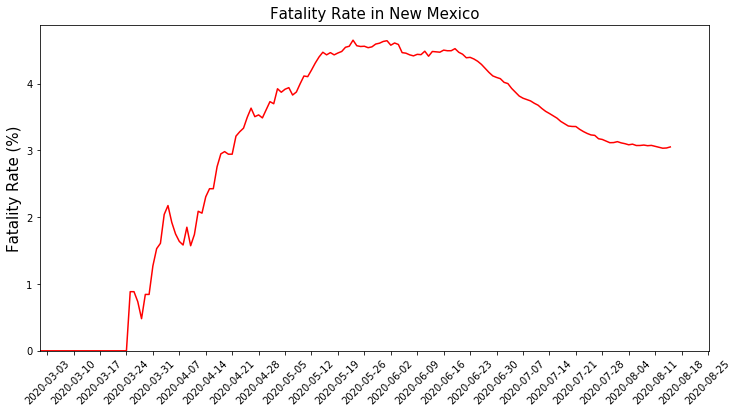

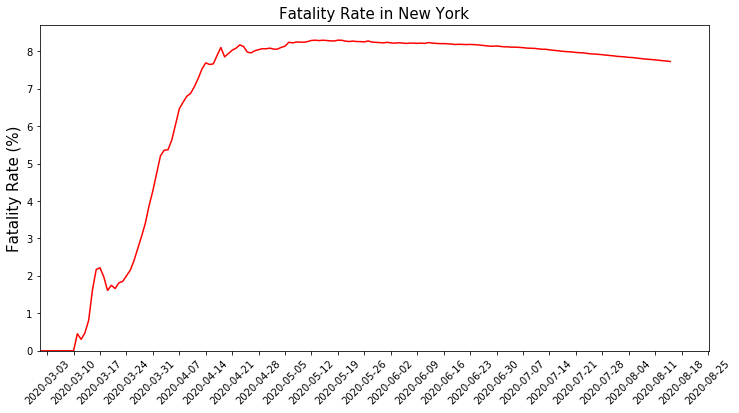

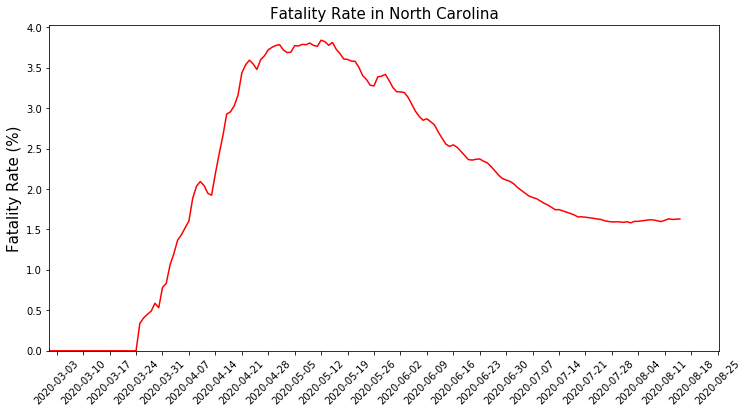

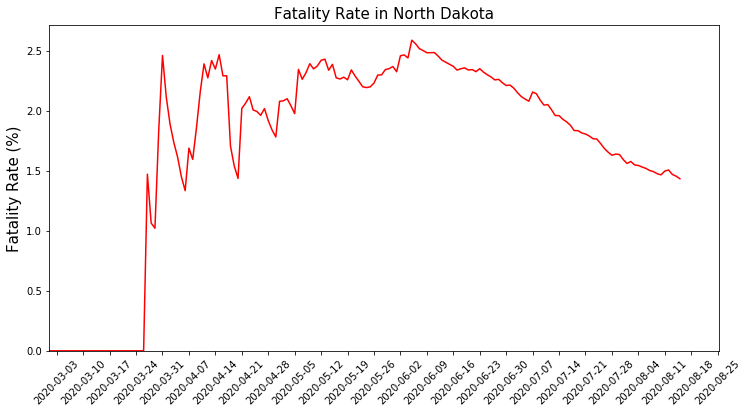

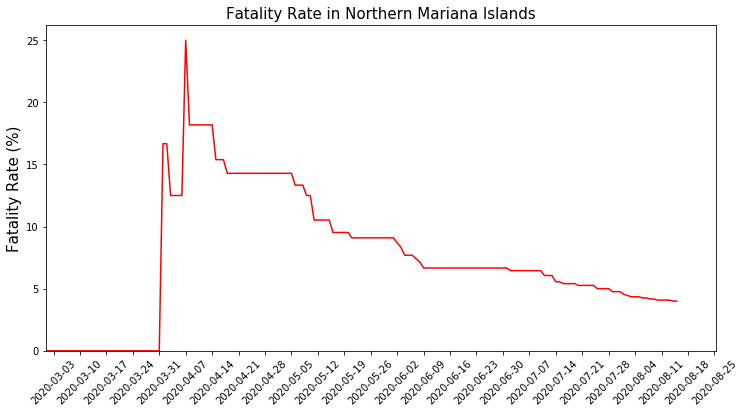

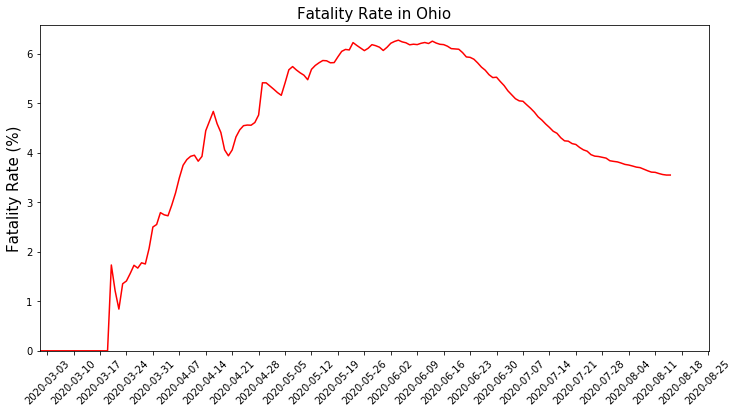

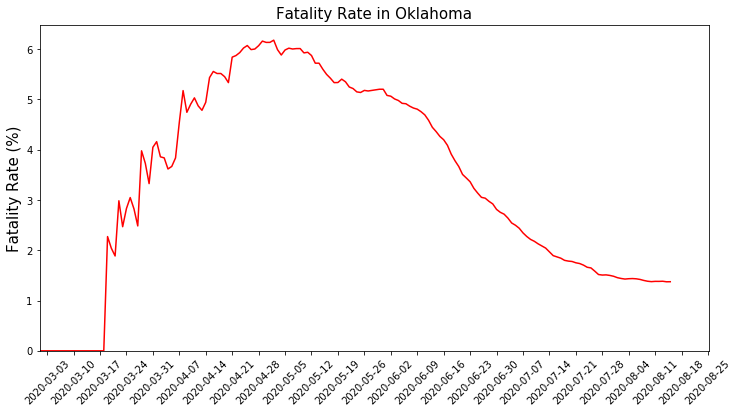

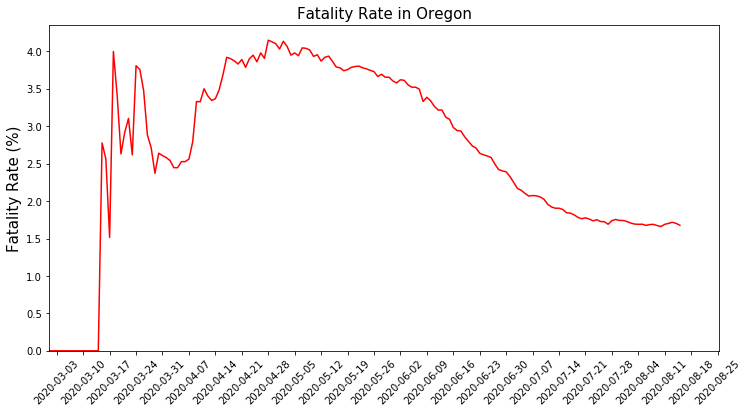

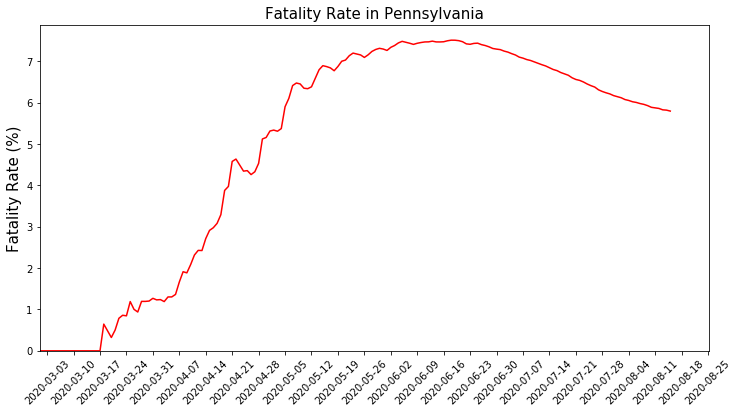

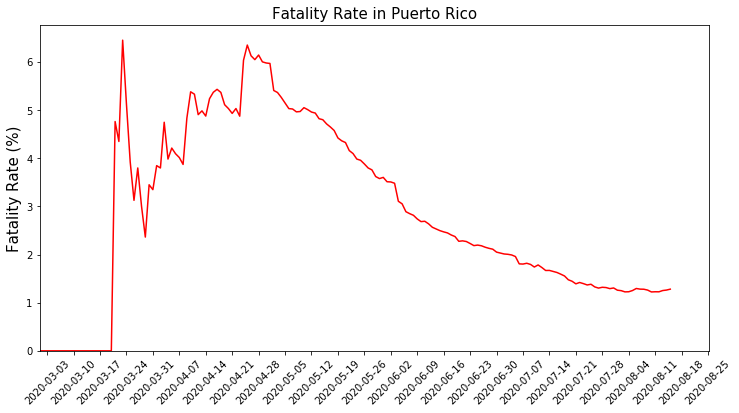

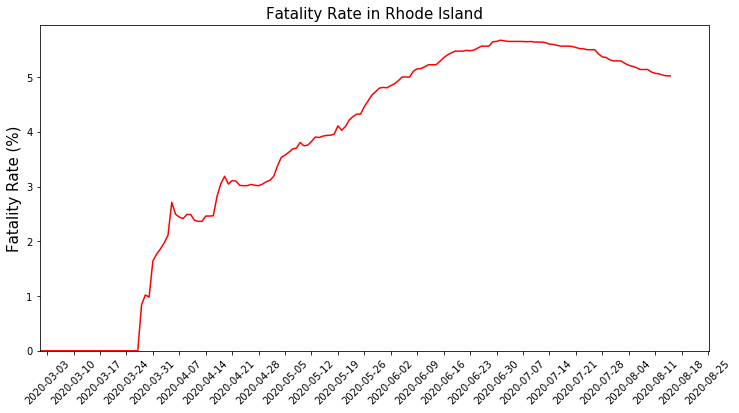

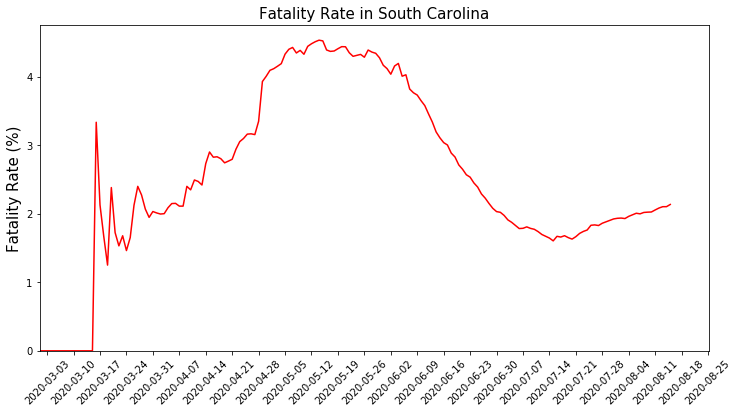

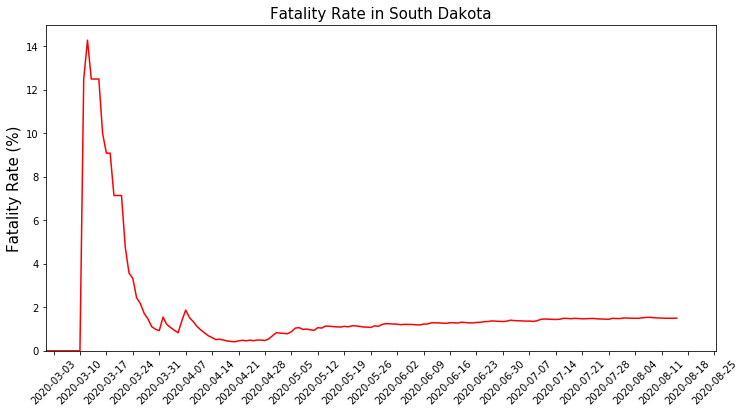

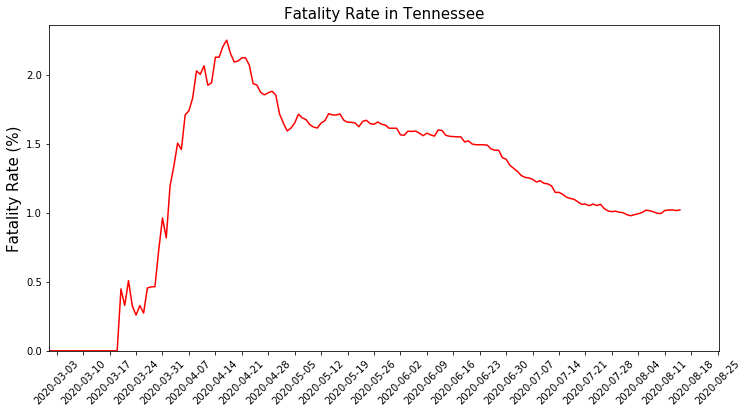

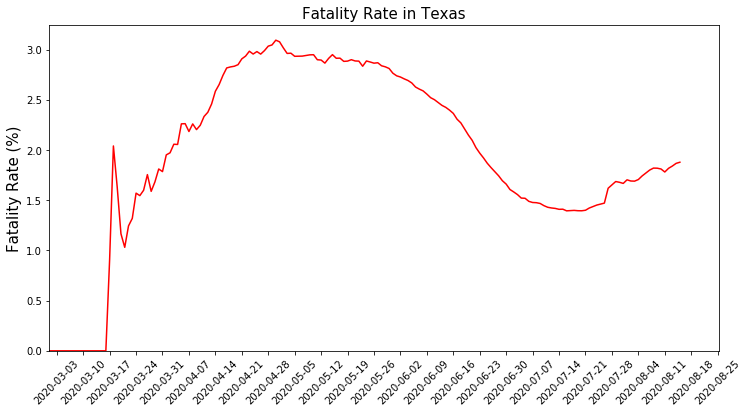

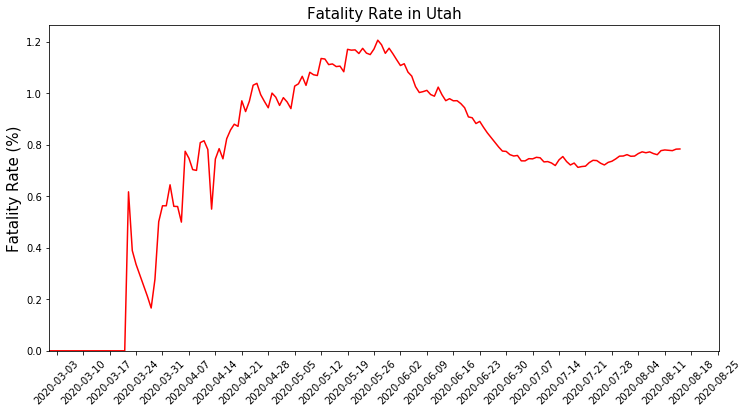

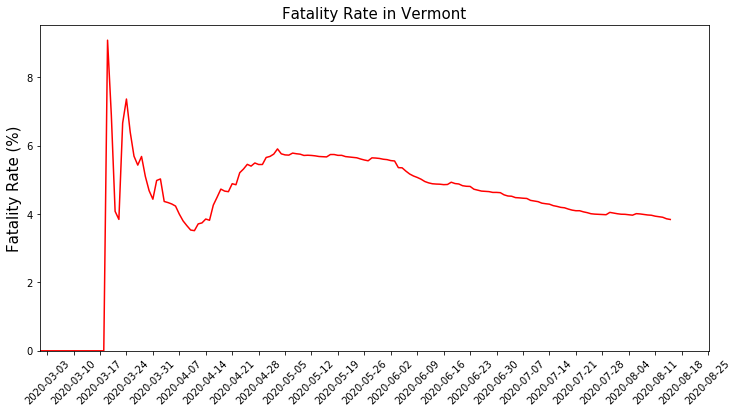

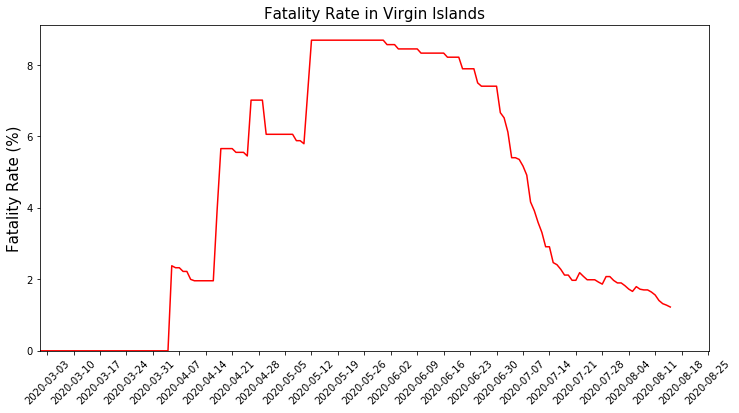

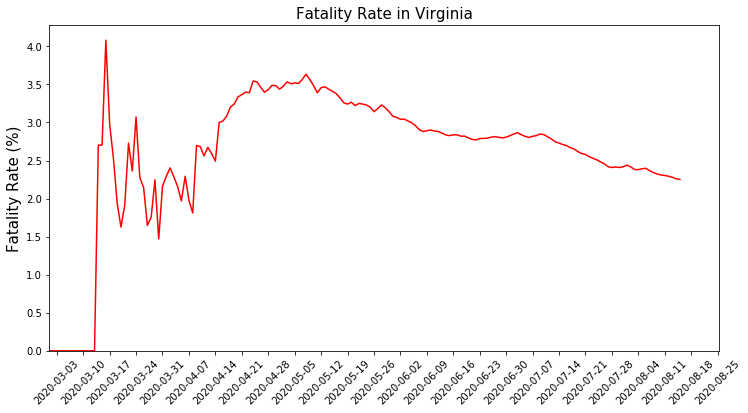

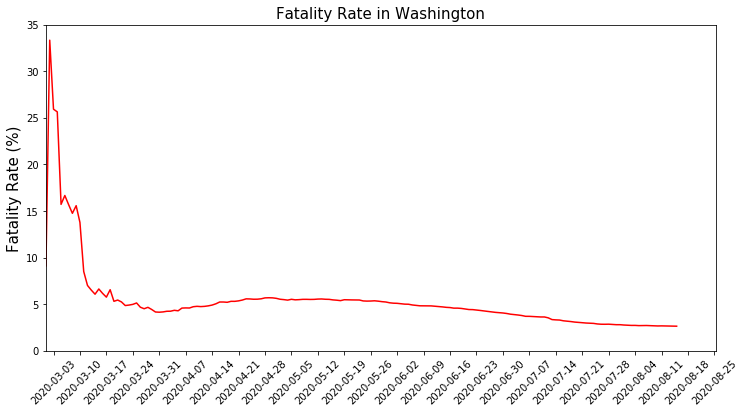

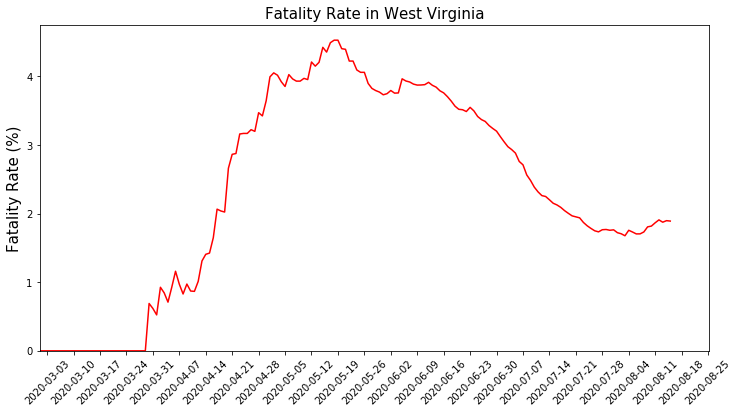

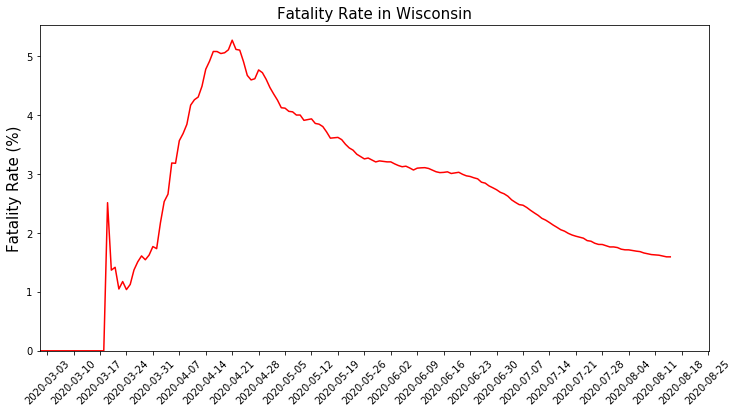

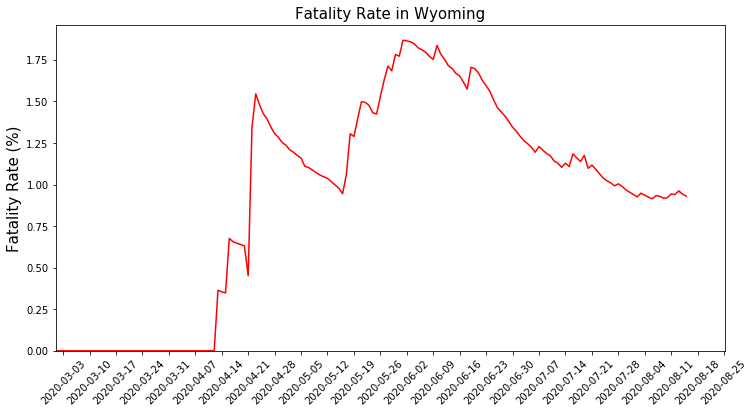

In [15]:
for state in states:
    fig,ax = plt.subplots(figsize = (12,6))
    ax.plot(data['%s' % state]['Date'], data['%s' % state]['Fatality'], 'r-')
    ax.tick_params(axis = 'x',labelrotation = 45)
    ax.set_xlim(datetime.date(2020, 3, 1))
    ax.set_ylim(0)
    ax.set_ylabel('Fatality Rate (%)', fontsize = 15)
    ax.set_title('Fatality Rate in %s' % state, fontsize = 15)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval = 1));